
# Flight Fare Predicition

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

**Import Dataset**

In [2]:
df = pd.read_csv(r"flight_dataset.csv",encoding="utf-8")
df.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [3]:
df1=df.copy()
df1.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [4]:
df1.shape

(330938, 14)

**Metadata of the Dataset**

In [5]:
#we are getting basic information about the dataset and based on that we are going to perform opertaion 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330938 entries, 0 to 330937
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330938 non-null  int64 
 1   departure_time     330938 non-null  object
 2   arrival_time       330938 non-null  object
 3   Airline            330938 non-null  object
 4   Cabin              330938 non-null  object
 5   Dept_city          330938 non-null  object
 6   Dept_date          330938 non-null  int64 
 7   arrival_city       330938 non-null  object
 8   stops              330938 non-null  int64 
 9   duration           330938 non-null  int64 
 10  weekday            330938 non-null  int64 
 11  dept_hours         330938 non-null  int64 
 12  Dept_flights_time  330938 non-null  object
 13  optimal_hours      330938 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 35.3+ MB


In [6]:
#describing the dataset
df1.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,14074.894817,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575
std,15968.136248,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5450.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7559.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11742.000000,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [7]:
# all the unique value for each variable
df1.nunique(axis=0)

Price                16283
departure_time         248
arrival_time           256
Airline                 44
Cabin                    3
Dept_city               30
Dept_date               31
arrival_city            30
stops                    7
duration               288
weekday                  7
dept_hours              24
Dept_flights_time        4
optimal_hours           24
dtype: int64

In [8]:
#columns in the dataset
df1.columns

Index(['Price', 'departure_time', 'arrival_time', 'Airline', 'Cabin',
       'Dept_city', 'Dept_date', 'arrival_city', 'stops', 'duration',
       'weekday', 'dept_hours', 'Dept_flights_time', 'optimal_hours'],
      dtype='object')

In [9]:
#check the numerical column and categorical column 
cat = []
num = []
for i in df1.columns:
    if df1[i].dtypes=='O':
            cat.append(i)
    else:
        num.append(i)
print('The numerical columns are',num)
print('The catagorical columns are',cat)

The numerical columns are ['Price', 'Dept_date', 'stops', 'duration', 'weekday', 'dept_hours', 'optimal_hours']
The catagorical columns are ['departure_time', 'arrival_time', 'Airline', 'Cabin', 'Dept_city', 'arrival_city', 'Dept_flights_time']


**Checking for missing Values**

In [10]:
#Finding how many null values present in the dataset  
percentage=(df1.isnull().sum()/len(df1))*100
percentage


Price                0.0
departure_time       0.0
arrival_time         0.0
Airline              0.0
Cabin                0.0
Dept_city            0.0
Dept_date            0.0
arrival_city         0.0
stops                0.0
duration             0.0
weekday              0.0
dept_hours           0.0
Dept_flights_time    0.0
optimal_hours        0.0
dtype: float64

In [11]:
df1.shape

(330938, 14)

In [12]:
#Drop the missing duplicates
df1 = df1.drop_duplicates()

In [13]:
df1.shape

(330776, 14)

**Outlier Detection**

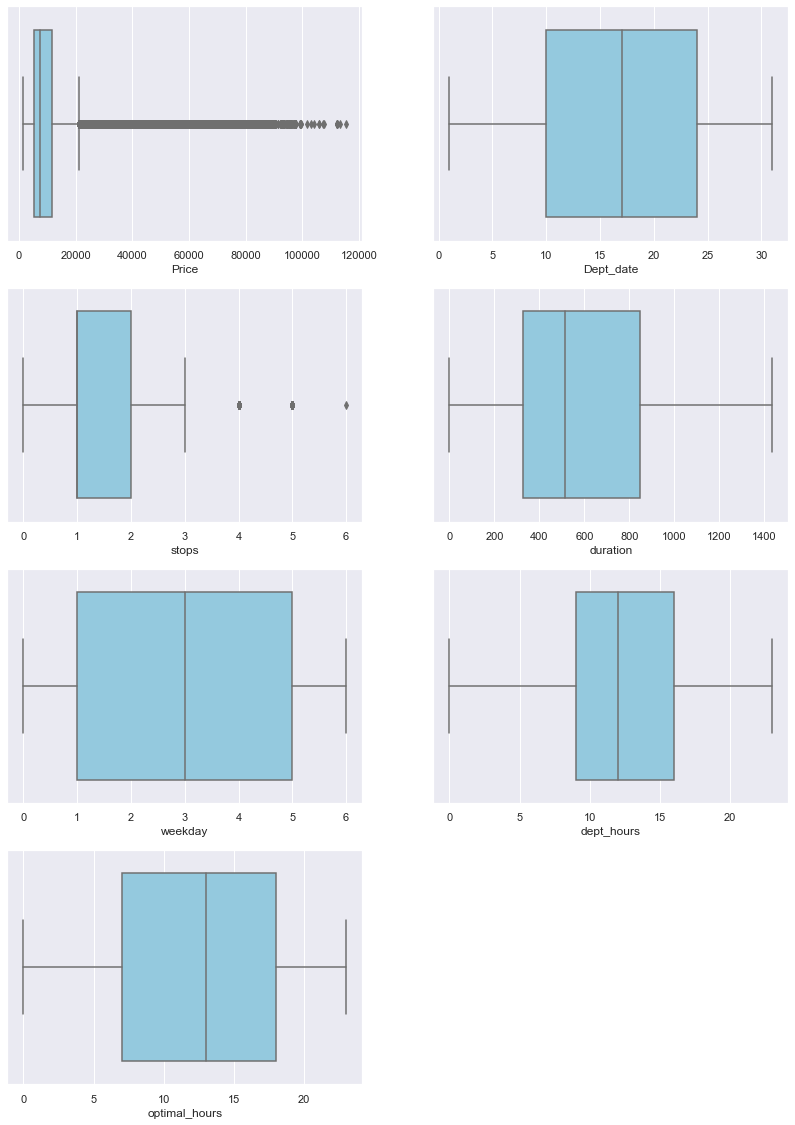

In [14]:
plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(5,2,j)
    sns.boxplot(df1[i],color='skyblue')
plt.show()

we can see in the boxplot most of the outliers are in the dataset are presented in price and stops.

In [15]:
df1[num].skew()

Price            2.122168
Dept_date       -0.015896
stops            0.838308
duration         0.517426
weekday          0.034637
dept_hours       0.249220
optimal_hours   -0.265924
dtype: float64

Price column is so skewed than any other.Usual skewness value should be -1 to 1 

In [16]:
#outlier detection using IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1<(Q1-1.5*IQR)) | (df1>(Q3+1.5*IQR))).any(axis=1)]
df1.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


Here outliers are detected check the skew.

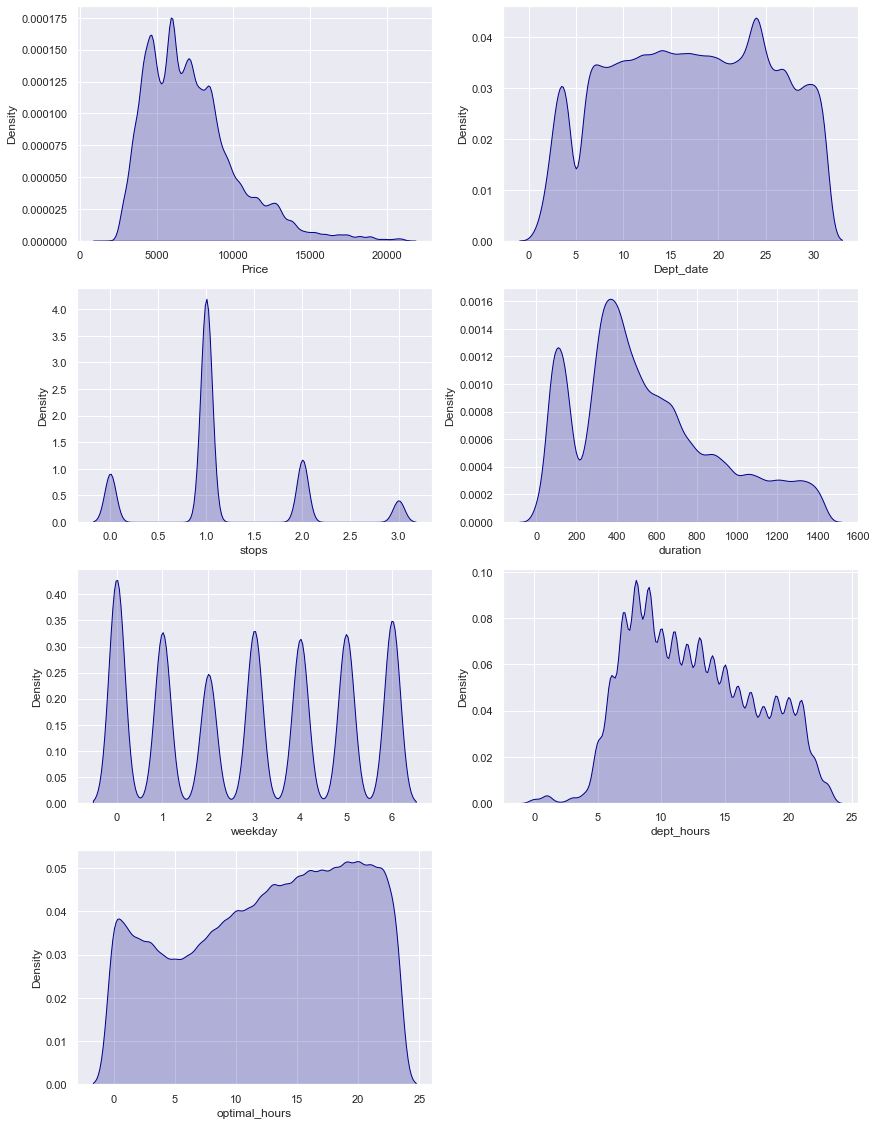

In [17]:
# check the normalization after removing the outliers

plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(5,2,j)
    sns.kdeplot(df1[i],shade=True,color='darkblue')
plt.show()

In [18]:
df1.skew().sort_values(ascending=False)

Price            1.193648
stops            0.692440
duration         0.682015
dept_hours       0.283483
weekday          0.010502
Dept_date       -0.056340
optimal_hours   -0.260979
dtype: float64

skewness after clearning the outliers, if you see that all the columns are normalized

**Feature Extraction**

In [19]:
df1['optimal_time'] = abs(df1['dept_hours'] - 4)
df1['Dept_Date_format'] = pd.to_datetime(df1['Dept_date'])
df1.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,optimal_time,Dept_Date_format
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11,10,1970-01-01 00:00:00.000000001
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13,12,1970-01-01 00:00:00.000000001
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13,12,1970-01-01 00:00:00.000000001
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4,3,1970-01-01 00:00:00.000000001
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6,5,1970-01-01 00:00:00.000000001


In [20]:
df1['weekday'] = df1['Dept_Date_format'].dt.dayofweek
df1.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,optimal_time,Dept_Date_format
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,3,14,Afternoon_flight,11,10,1970-01-01 00:00:00.000000001
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,3,16,Evening_flight,13,12,1970-01-01 00:00:00.000000001
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,3,16,Evening_flight,13,12,1970-01-01 00:00:00.000000001
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,3,7,Morning_flight,4,3,1970-01-01 00:00:00.000000001
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,3,9,Morning_flight,6,5,1970-01-01 00:00:00.000000001


**Data Insights**

<AxesSubplot:>

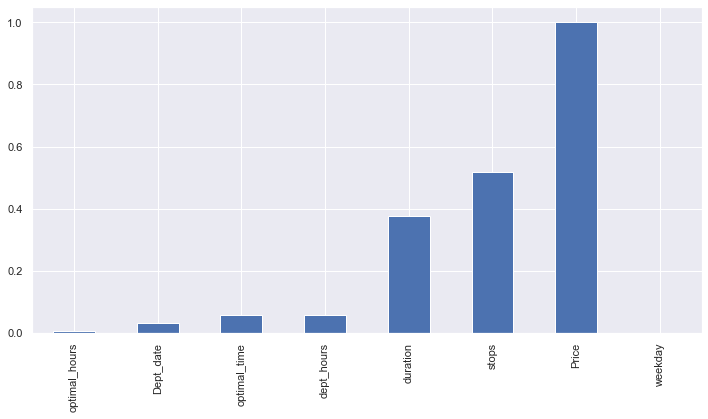

In [21]:
plt.figure(figsize=(12,6))
df1.corr()['Price'].sort_values().plot(kind='bar')

Here we can see two variables having the most positive effect on price

* price
* stops

and we can also see that the weekday is the least affecting variable to the price.

**Analyzing left out variables with Price**

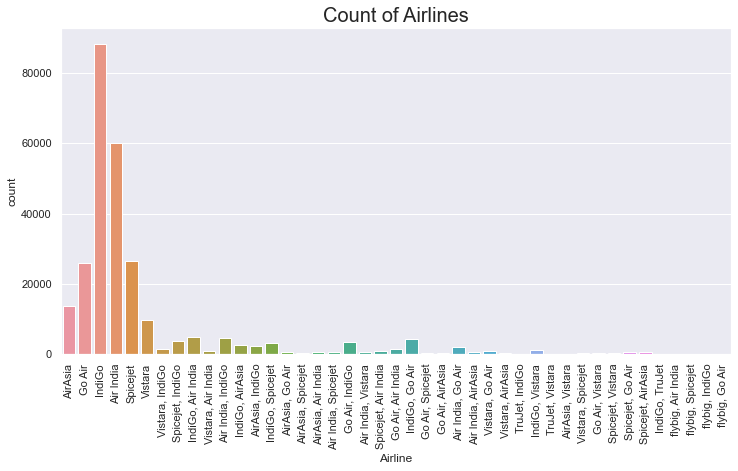

In [22]:
#lets see which airline company has highest counts
plt.figure(figsize=(12,6))
sns.countplot(x=df1['Airline'])
plt.title('Count of Airlines', size=20)
plt.xticks(rotation=90)
plt.show()

We can understand that **IndiGo flight** count is in leading in the above plot. So it has the highest number of customers.


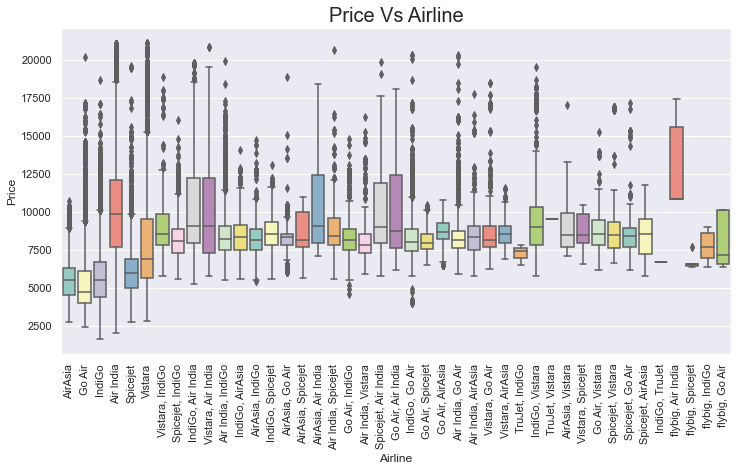

In [23]:
# lets check ariline and their prices
plt.figure(figsize=(12,6))
sns.boxplot(x = df1['Airline'], y = df1['Price'], palette='Set3')
plt.title('Price Vs Airline', size=20)
plt.xticks(rotation=90)
plt.show()

From the last plot we come to know that IndiGo flight possess huge customer base. Hence it clearly shows that it relatively has the highest ticket rate due to its demand among customers. 

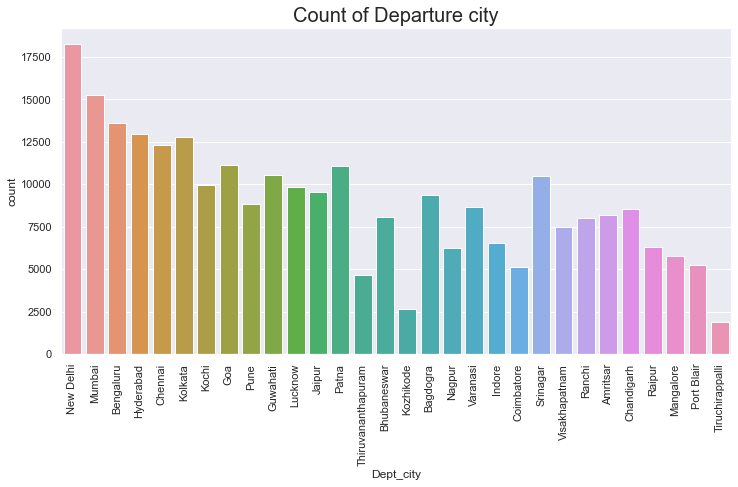

In [24]:
# lets see how many flight took off from dept_city 
plt.figure(figsize = (12,6))
sns.countplot(x = df1['Dept_city'])
plt.title('Count of Departure city', size = 20)
plt.xticks(rotation=90)
plt.show()

The above Departure_city plot it is evident that most of the customers are travelling from New Delhi compared to other places through Air India.

Text(0.5, 1.0, 'Price vs Departure city')

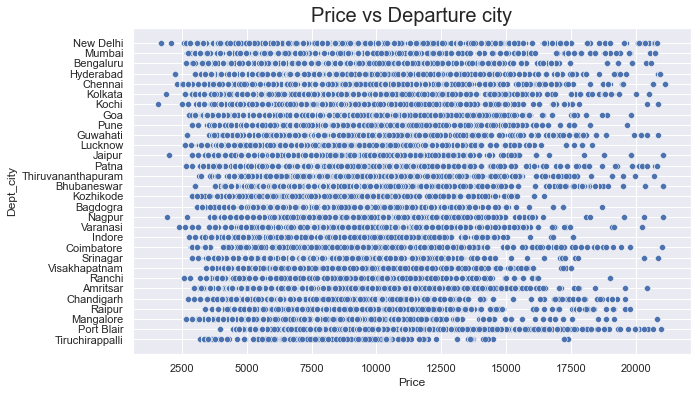

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Dept_city',data = df1)
plt.title('Price vs Departure city', size = 20)

Here we can see that Tiruchirapalli is least expensive city to flight prices. Mumbai, New Delhi, Bengaluru, Hyderabad, Chennai and Kochi have the highest range for flight prices.

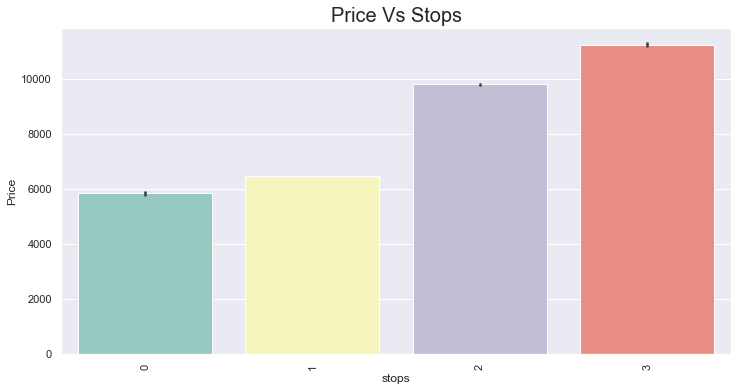

In [26]:
#stops vs price
plt.figure(figsize = (12,6))
sns.barplot(x = df1['stops'], y = df1['Price'], palette='Set3')
plt.title('Price Vs Stops', size = 20)
plt.xticks(rotation=90)
plt.show()

when looking to analyse the total_stops feature. The cost is increasing when the stops increase.

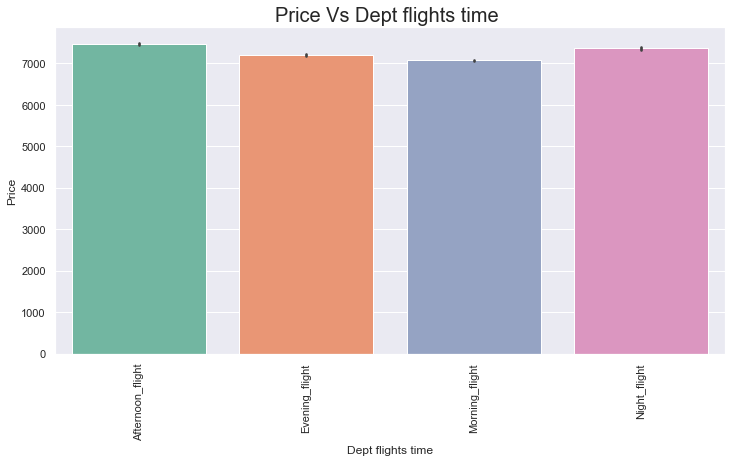

In [27]:
#Dept flights time vs Price
plt.figure(figsize = (12,6))
sns.barplot(x = df1['Dept_flights_time'], y = df1['Price'], palette ='Set2')
plt.title('Price Vs Dept flights time ', size = 20)
plt.xlabel("Dept flights time")
plt.xticks(rotation=90)
plt.show()

From this chart we can understand that Night_flight is the most expensive flight price time. Morning_flight is the cheapest/affordable flight prices time.

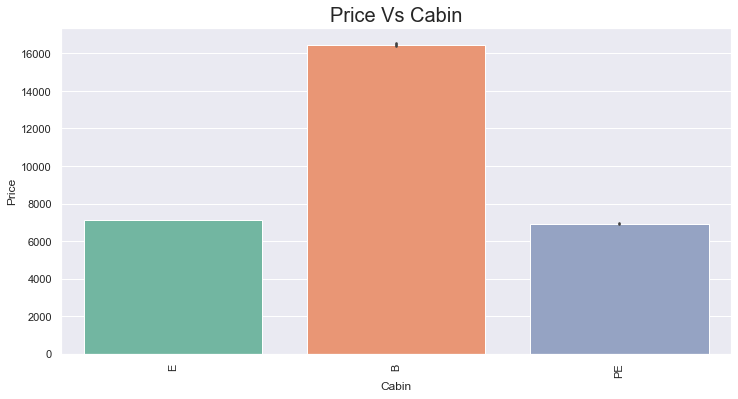

In [28]:
#Cabin vs Price
plt.figure(figsize = (12,6))
sns.barplot(x = df1['Cabin'], y = df1['Price'], palette ='Set2')
plt.title('Price Vs Cabin', size = 20)
plt.xlabel("Cabin")
plt.xticks(rotation=90)
plt.show()

This plot shows that the Cabin B has highest range of price in the data. PE is the second highest range price in data.
E-> Economy class, PE->Premium Economy class , B->Business class

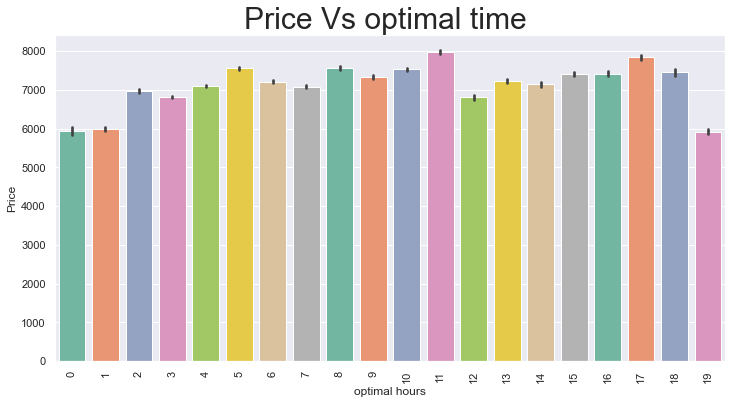

In [29]:
#optimal hours vs price
plt.figure(figsize = (12,6))
sns.barplot(x = df1['optimal_time'], y = df1['Price'], palette = 'Set2')
plt.title('Price Vs optimal time ', size=30)
plt.xlabel("optimal hours")
plt.xticks(rotation=90)
plt.show()

Pairplot of the pre processed data


<Figure size 576x288 with 0 Axes>

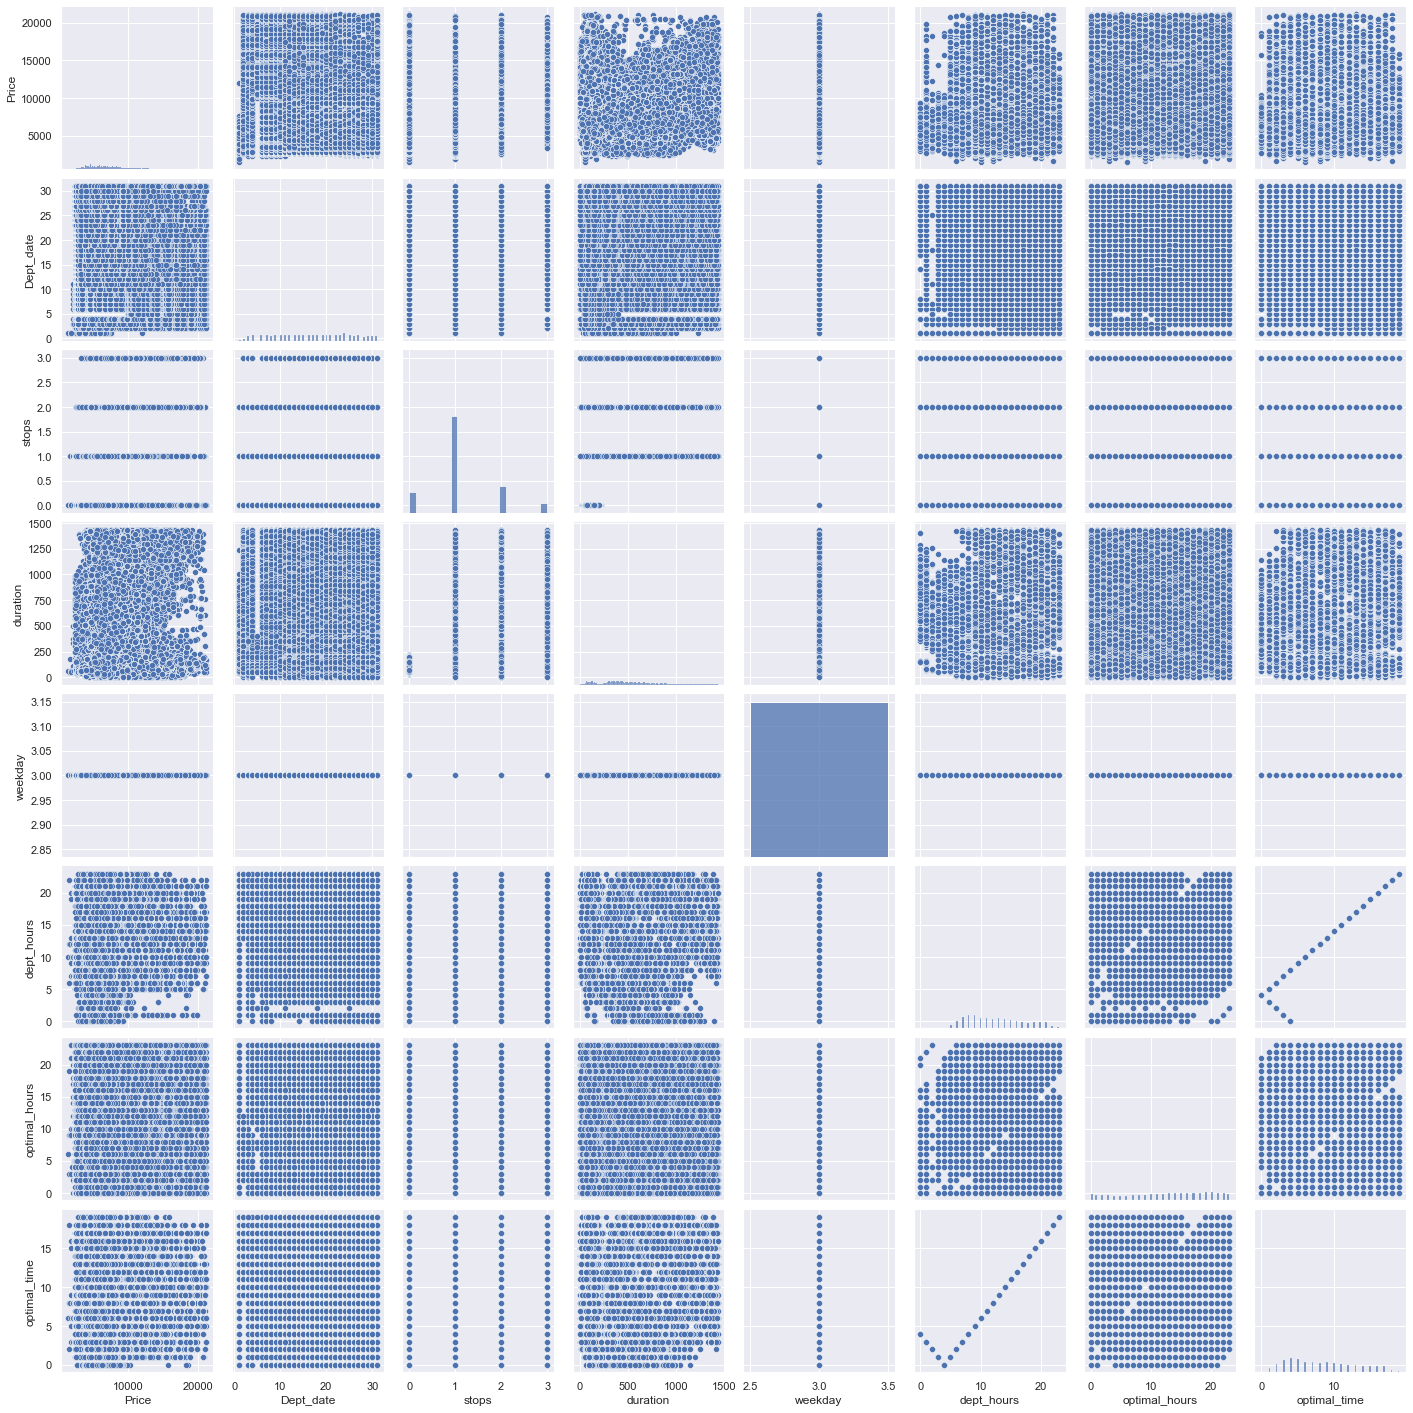

In [30]:
#Pair plot
print('Pairplot of the pre processed data')
plt.figure(figsize=(8,4))
sns.pairplot(df1)
plt.show()

From the above pairplot we found that the data is distributed as same as the before data

**Feature Engineering**

In [31]:
df_dummy= df1.drop(['Dept_date','Price','Dept_Date_format','departure_time','arrival_time','stops','duration','dept_hours','Dept_flights_time','optimal_hours'], axis=1)
df_dummy.head()

,Airline,Cabin,Dept_city,arrival_city,weekday,optimal_time
0,AirAsia,E,New Delhi,Mumbai,3,10
1,Go Air,E,New Delhi,Mumbai,3,12
2,Go Air,E,New Delhi,Mumbai,3,12
3,Go Air,E,New Delhi,Mumbai,3,3
4,Go Air,E,New Delhi,Mumbai,3,5


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le =preprocessing.LabelEncoder()
df_dummy.select_dtypes(object)

,Airline,Cabin,Dept_city,arrival_city
0,AirAsia,E,New Delhi,Mumbai
1,Go Air,E,New Delhi,Mumbai
2,Go Air,E,New Delhi,Mumbai
3,Go Air,E,New Delhi,Mumbai
4,Go Air,E,New Delhi,Mumbai
...,...,...,...,...
330933,Spicejet,PE,Port Blair,Mumbai
330934,Spicejet,PE,Port Blair,Mumbai
330935,Spicejet,PE,Port Blair,Bengaluru
330936,Spicejet,PE,Port Blair,Chennai


In [33]:
char = df_dummy.select_dtypes(include ='object').columns

#encoding categorical columns
for i in char:
    df_dummy[i] = le.fit_transform(df_dummy[i])
df_dummy.head()

,Airline,Cabin,Dept_city,arrival_city,weekday,optimal_time
0,6,1,19,17,3,10
1,12,1,19,17,3,12
2,12,1,19,17,3,12
3,12,1,19,17,3,3
4,12,1,19,17,3,5


In [34]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269612 entries, 0 to 330937
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Airline       269612 non-null  int32
 1   Cabin         269612 non-null  int32
 2   Dept_city     269612 non-null  int32
 3   arrival_city  269612 non-null  int32
 4   weekday       269612 non-null  int64
 5   optimal_time  269612 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 18.3 MB


In [35]:
df_dummy.columns

Index(['Airline', 'Cabin', 'Dept_city', 'arrival_city', 'weekday',
       'optimal_time'],
      dtype='object')

**Train test split**

In [36]:
from sklearn.model_selection import train_test_split
features = ["Airline","Cabin","Dept_city","arrival_city","optimal_time","weekday"]
X = df_dummy.loc[:, features]
y = df1.loc[:, ['Price']]

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(188728, 6)
(80884, 6)
(188728, 1)
(80884, 1)


**Model Selection**

**Lasso Regression**

In [38]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [39]:
lassocv = LassoCV(alphas = None,cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(xtrain,ytrain)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [40]:
alpha = lassocv.alpha_
alpha

0.0021702696814444736

In [41]:
lasso_model = Lasso(alpha)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.0021702696814444736)

In [42]:
lasso_model.score(xtest,ytest)

0.11596255335185257

**LightGBM regression**

In [43]:
from lightgbm import LGBMRegressor
from sklearn import metrics

In [44]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,
              min_child_weight=1, min_split_gain=0.0222415, n_estimators=20000,
              num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,
              subsample=0.6)

In [45]:
lgbm = model_lgb.fit(xtrain, 
                     ytrain,
                     eval_set = [(xtrain, ytrain), (xtest, ytest)],
                     eval_metric ='rmse',
                     early_stopping_rounds = 400,
                     verbose =True)

[1]	training's rmse: 2972.62	training's l2: 8.8365e+06	valid_1's rmse: 2951.58	valid_1's l2: 8.71183e+06
[2]	training's rmse: 2958.12	training's l2: 8.75046e+06	valid_1's rmse: 2937.24	valid_1's l2: 8.62738e+06
[3]	training's rmse: 2943.83	training's l2: 8.66614e+06	valid_1's rmse: 2923.11	valid_1's l2: 8.54459e+06
[4]	training's rmse: 2929.76	training's l2: 8.58349e+06	valid_1's rmse: 2909.21	valid_1's l2: 8.46349e+06
[5]	training's rmse: 2913.58	training's l2: 8.48892e+06	valid_1's rmse: 2893.29	valid_1's l2: 8.37111e+06
[6]	training's rmse: 2897.26	training's l2: 8.39411e+06	valid_1's rmse: 2877.33	valid_1's l2: 8.27904e+06
[7]	training's rmse: 2883.73	training's l2: 8.3159e+06	valid_1's rmse: 2863.97	valid_1's l2: 8.2023e+06
[8]	training's rmse: 2873.49	training's l2: 8.25697e+06	valid_1's rmse: 2854.03	valid_1's l2: 8.14548e+06
[9]	training's rmse: 2857.52	training's l2: 8.16543e+06	valid_1's rmse: 2838.49	valid_1's l2: 8.057e+06
[10]	training's rmse: 2844.46	training's l2: 8.0909

[103]	training's rmse: 2053.76	training's l2: 4.21794e+06	valid_1's rmse: 2054.61	valid_1's l2: 4.22142e+06
[104]	training's rmse: 2050.03	training's l2: 4.20264e+06	valid_1's rmse: 2050.96	valid_1's l2: 4.20642e+06
[105]	training's rmse: 2045	training's l2: 4.18202e+06	valid_1's rmse: 2046.1	valid_1's l2: 4.18654e+06
[106]	training's rmse: 2040.15	training's l2: 4.16222e+06	valid_1's rmse: 2041.44	valid_1's l2: 4.16747e+06
[107]	training's rmse: 2035.49	training's l2: 4.14323e+06	valid_1's rmse: 2036.92	valid_1's l2: 4.14905e+06
[108]	training's rmse: 2031.28	training's l2: 4.12608e+06	valid_1's rmse: 2032.82	valid_1's l2: 4.13234e+06
[109]	training's rmse: 2026.5	training's l2: 4.10668e+06	valid_1's rmse: 2028.22	valid_1's l2: 4.11366e+06
[110]	training's rmse: 2022	training's l2: 4.08847e+06	valid_1's rmse: 2023.9	valid_1's l2: 4.09617e+06
[111]	training's rmse: 2018.54	training's l2: 4.07449e+06	valid_1's rmse: 2020.5	valid_1's l2: 4.08243e+06
[112]	training's rmse: 2014.19	trainin

[193]	training's rmse: 1790.73	training's l2: 3.20671e+06	valid_1's rmse: 1799.37	valid_1's l2: 3.23772e+06
[194]	training's rmse: 1788.92	training's l2: 3.20024e+06	valid_1's rmse: 1797.59	valid_1's l2: 3.23134e+06
[195]	training's rmse: 1786.92	training's l2: 3.19309e+06	valid_1's rmse: 1795.61	valid_1's l2: 3.22421e+06
[196]	training's rmse: 1784.76	training's l2: 3.18538e+06	valid_1's rmse: 1793.48	valid_1's l2: 3.21658e+06
[197]	training's rmse: 1782.82	training's l2: 3.17844e+06	valid_1's rmse: 1791.56	valid_1's l2: 3.20969e+06
[198]	training's rmse: 1780.95	training's l2: 3.1718e+06	valid_1's rmse: 1789.78	valid_1's l2: 3.2033e+06
[199]	training's rmse: 1779.36	training's l2: 3.16611e+06	valid_1's rmse: 1788.19	valid_1's l2: 3.19764e+06
[200]	training's rmse: 1777.63	training's l2: 3.15996e+06	valid_1's rmse: 1786.5	valid_1's l2: 3.19157e+06
[201]	training's rmse: 1775.9	training's l2: 3.15381e+06	valid_1's rmse: 1784.81	valid_1's l2: 3.18553e+06
[202]	training's rmse: 1773.86	t

[282]	training's rmse: 1662.28	training's l2: 2.76317e+06	valid_1's rmse: 1672.75	valid_1's l2: 2.7981e+06
[283]	training's rmse: 1661.38	training's l2: 2.76017e+06	valid_1's rmse: 1671.84	valid_1's l2: 2.79504e+06
[284]	training's rmse: 1660.49	training's l2: 2.75723e+06	valid_1's rmse: 1670.95	valid_1's l2: 2.79208e+06
[285]	training's rmse: 1659.58	training's l2: 2.75421e+06	valid_1's rmse: 1670.09	valid_1's l2: 2.78919e+06
[286]	training's rmse: 1658.6	training's l2: 2.75095e+06	valid_1's rmse: 1669.14	valid_1's l2: 2.78604e+06
[287]	training's rmse: 1657.6	training's l2: 2.74764e+06	valid_1's rmse: 1668.19	valid_1's l2: 2.78285e+06
[288]	training's rmse: 1656.43	training's l2: 2.74374e+06	valid_1's rmse: 1667.03	valid_1's l2: 2.77899e+06
[289]	training's rmse: 1655.41	training's l2: 2.7404e+06	valid_1's rmse: 1666.06	valid_1's l2: 2.77577e+06
[290]	training's rmse: 1654.43	training's l2: 2.73715e+06	valid_1's rmse: 1665.11	valid_1's l2: 2.77259e+06
[291]	training's rmse: 1653.27	t

[379]	training's rmse: 1587.63	training's l2: 2.52057e+06	valid_1's rmse: 1599.77	valid_1's l2: 2.55927e+06
[380]	training's rmse: 1586.64	training's l2: 2.51744e+06	valid_1's rmse: 1598.83	valid_1's l2: 2.55625e+06
[381]	training's rmse: 1585.59	training's l2: 2.5141e+06	valid_1's rmse: 1597.79	valid_1's l2: 2.55293e+06
[382]	training's rmse: 1584.95	training's l2: 2.51206e+06	valid_1's rmse: 1597.15	valid_1's l2: 2.55089e+06
[383]	training's rmse: 1584.6	training's l2: 2.51096e+06	valid_1's rmse: 1596.8	valid_1's l2: 2.54978e+06
[384]	training's rmse: 1584.24	training's l2: 2.50983e+06	valid_1's rmse: 1596.45	valid_1's l2: 2.54865e+06
[385]	training's rmse: 1583.24	training's l2: 2.50664e+06	valid_1's rmse: 1595.45	valid_1's l2: 2.54546e+06
[386]	training's rmse: 1582.88	training's l2: 2.50549e+06	valid_1's rmse: 1595.09	valid_1's l2: 2.5443e+06
[387]	training's rmse: 1581.97	training's l2: 2.50263e+06	valid_1's rmse: 1594.18	valid_1's l2: 2.54142e+06
[388]	training's rmse: 1581.41	t

[476]	training's rmse: 1536.24	training's l2: 2.36005e+06	valid_1's rmse: 1549.03	valid_1's l2: 2.3995e+06
[477]	training's rmse: 1535.74	training's l2: 2.35849e+06	valid_1's rmse: 1548.52	valid_1's l2: 2.3979e+06
[478]	training's rmse: 1535.35	training's l2: 2.35731e+06	valid_1's rmse: 1548.13	valid_1's l2: 2.39671e+06
[479]	training's rmse: 1534.77	training's l2: 2.35552e+06	valid_1's rmse: 1547.57	valid_1's l2: 2.39498e+06
[480]	training's rmse: 1534.46	training's l2: 2.35457e+06	valid_1's rmse: 1547.26	valid_1's l2: 2.39403e+06
[481]	training's rmse: 1534.23	training's l2: 2.35386e+06	valid_1's rmse: 1547.05	valid_1's l2: 2.39335e+06
[482]	training's rmse: 1533.63	training's l2: 2.35202e+06	valid_1's rmse: 1546.47	valid_1's l2: 2.39158e+06
[483]	training's rmse: 1533.18	training's l2: 2.35063e+06	valid_1's rmse: 1546.03	valid_1's l2: 2.39021e+06
[484]	training's rmse: 1532.74	training's l2: 2.34928e+06	valid_1's rmse: 1545.6	valid_1's l2: 2.38887e+06
[485]	training's rmse: 1532.37	

[556]	training's rmse: 1505.3	training's l2: 2.26591e+06	valid_1's rmse: 1518.75	valid_1's l2: 2.3066e+06
[557]	training's rmse: 1505.07	training's l2: 2.26523e+06	valid_1's rmse: 1518.51	valid_1's l2: 2.30587e+06
[558]	training's rmse: 1504.56	training's l2: 2.2637e+06	valid_1's rmse: 1518.04	valid_1's l2: 2.30444e+06
[559]	training's rmse: 1504.19	training's l2: 2.26258e+06	valid_1's rmse: 1517.65	valid_1's l2: 2.30327e+06
[560]	training's rmse: 1503.67	training's l2: 2.26102e+06	valid_1's rmse: 1517.18	valid_1's l2: 2.30184e+06
[561]	training's rmse: 1503.19	training's l2: 2.25957e+06	valid_1's rmse: 1516.73	valid_1's l2: 2.30048e+06
[562]	training's rmse: 1502.69	training's l2: 2.25807e+06	valid_1's rmse: 1516.27	valid_1's l2: 2.29908e+06
[563]	training's rmse: 1502.28	training's l2: 2.25686e+06	valid_1's rmse: 1515.86	valid_1's l2: 2.29782e+06
[564]	training's rmse: 1501.94	training's l2: 2.25581e+06	valid_1's rmse: 1515.51	valid_1's l2: 2.29677e+06
[565]	training's rmse: 1501.6	t

[651]	training's rmse: 1472.29	training's l2: 2.16765e+06	valid_1's rmse: 1486.61	valid_1's l2: 2.21e+06
[652]	training's rmse: 1472.1	training's l2: 2.16707e+06	valid_1's rmse: 1486.41	valid_1's l2: 2.20941e+06
[653]	training's rmse: 1472.02	training's l2: 2.16684e+06	valid_1's rmse: 1486.33	valid_1's l2: 2.20919e+06
[654]	training's rmse: 1471.33	training's l2: 2.16481e+06	valid_1's rmse: 1485.64	valid_1's l2: 2.20713e+06
[655]	training's rmse: 1470.81	training's l2: 2.16329e+06	valid_1's rmse: 1485.15	valid_1's l2: 2.20566e+06
[656]	training's rmse: 1470.49	training's l2: 2.16235e+06	valid_1's rmse: 1484.84	valid_1's l2: 2.20475e+06
[657]	training's rmse: 1470.36	training's l2: 2.16194e+06	valid_1's rmse: 1484.72	valid_1's l2: 2.2044e+06
[658]	training's rmse: 1470.06	training's l2: 2.16108e+06	valid_1's rmse: 1484.43	valid_1's l2: 2.20355e+06
[659]	training's rmse: 1469.78	training's l2: 2.16026e+06	valid_1's rmse: 1484.16	valid_1's l2: 2.20273e+06
[660]	training's rmse: 1469.29	tr

[735]	training's rmse: 1452.86	training's l2: 2.11082e+06	valid_1's rmse: 1467.78	valid_1's l2: 2.15439e+06
[736]	training's rmse: 1452.78	training's l2: 2.11057e+06	valid_1's rmse: 1467.71	valid_1's l2: 2.15417e+06
[737]	training's rmse: 1452.68	training's l2: 2.11029e+06	valid_1's rmse: 1467.63	valid_1's l2: 2.15392e+06
[738]	training's rmse: 1452.47	training's l2: 2.10966e+06	valid_1's rmse: 1467.43	valid_1's l2: 2.15334e+06
[739]	training's rmse: 1452.25	training's l2: 2.10903e+06	valid_1's rmse: 1467.22	valid_1's l2: 2.15273e+06
[740]	training's rmse: 1452.17	training's l2: 2.10879e+06	valid_1's rmse: 1467.15	valid_1's l2: 2.15252e+06
[741]	training's rmse: 1451.97	training's l2: 2.10822e+06	valid_1's rmse: 1466.96	valid_1's l2: 2.15198e+06
[742]	training's rmse: 1451.91	training's l2: 2.10804e+06	valid_1's rmse: 1466.9	valid_1's l2: 2.1518e+06
[743]	training's rmse: 1451.77	training's l2: 2.10762e+06	valid_1's rmse: 1466.75	valid_1's l2: 2.15137e+06
[744]	training's rmse: 1451.6	

[837]	training's rmse: 1433.96	training's l2: 2.05625e+06	valid_1's rmse: 1449.51	valid_1's l2: 2.10108e+06
[838]	training's rmse: 1433.82	training's l2: 2.05584e+06	valid_1's rmse: 1449.38	valid_1's l2: 2.1007e+06
[839]	training's rmse: 1433.74	training's l2: 2.05561e+06	valid_1's rmse: 1449.29	valid_1's l2: 2.10045e+06
[840]	training's rmse: 1433.48	training's l2: 2.05486e+06	valid_1's rmse: 1449.04	valid_1's l2: 2.09973e+06
[841]	training's rmse: 1433.17	training's l2: 2.05399e+06	valid_1's rmse: 1448.75	valid_1's l2: 2.09889e+06
[842]	training's rmse: 1433.09	training's l2: 2.05376e+06	valid_1's rmse: 1448.68	valid_1's l2: 2.09869e+06
[843]	training's rmse: 1432.74	training's l2: 2.05275e+06	valid_1's rmse: 1448.35	valid_1's l2: 2.09772e+06
[844]	training's rmse: 1432.59	training's l2: 2.0523e+06	valid_1's rmse: 1448.2	valid_1's l2: 2.09729e+06
[845]	training's rmse: 1432.36	training's l2: 2.05165e+06	valid_1's rmse: 1447.99	valid_1's l2: 2.09667e+06
[846]	training's rmse: 1432.23	

[945]	training's rmse: 1413.77	training's l2: 1.99873e+06	valid_1's rmse: 1430.2	valid_1's l2: 2.04546e+06
[946]	training's rmse: 1413.58	training's l2: 1.99822e+06	valid_1's rmse: 1430.02	valid_1's l2: 2.04495e+06
[947]	training's rmse: 1413.43	training's l2: 1.99777e+06	valid_1's rmse: 1429.88	valid_1's l2: 2.04454e+06
[948]	training's rmse: 1413.39	training's l2: 1.99767e+06	valid_1's rmse: 1429.84	valid_1's l2: 2.04444e+06
[949]	training's rmse: 1413.24	training's l2: 1.99723e+06	valid_1's rmse: 1429.7	valid_1's l2: 2.04403e+06
[950]	training's rmse: 1413.2	training's l2: 1.99713e+06	valid_1's rmse: 1429.66	valid_1's l2: 2.04393e+06
[951]	training's rmse: 1412.74	training's l2: 1.99583e+06	valid_1's rmse: 1429.23	valid_1's l2: 2.04269e+06
[952]	training's rmse: 1412.32	training's l2: 1.99465e+06	valid_1's rmse: 1428.84	valid_1's l2: 2.04158e+06
[953]	training's rmse: 1412.25	training's l2: 1.99446e+06	valid_1's rmse: 1428.78	valid_1's l2: 2.0414e+06
[954]	training's rmse: 1412.21	t

[1051]	training's rmse: 1399.2	training's l2: 1.95776e+06	valid_1's rmse: 1416.3	valid_1's l2: 2.00589e+06
[1052]	training's rmse: 1399.06	training's l2: 1.95736e+06	valid_1's rmse: 1416.17	valid_1's l2: 2.00553e+06
[1053]	training's rmse: 1398.94	training's l2: 1.95703e+06	valid_1's rmse: 1416.05	valid_1's l2: 2.0052e+06
[1054]	training's rmse: 1398.86	training's l2: 1.95681e+06	valid_1's rmse: 1415.97	valid_1's l2: 2.00496e+06
[1055]	training's rmse: 1398.84	training's l2: 1.95676e+06	valid_1's rmse: 1415.95	valid_1's l2: 2.0049e+06
[1056]	training's rmse: 1398.48	training's l2: 1.95576e+06	valid_1's rmse: 1415.62	valid_1's l2: 2.00399e+06
[1057]	training's rmse: 1398.35	training's l2: 1.95538e+06	valid_1's rmse: 1415.51	valid_1's l2: 2.00366e+06
[1058]	training's rmse: 1398.21	training's l2: 1.955e+06	valid_1's rmse: 1415.35	valid_1's l2: 2.00322e+06
[1059]	training's rmse: 1398.02	training's l2: 1.95445e+06	valid_1's rmse: 1415.18	valid_1's l2: 2.00273e+06
[1060]	training's rmse: 1

[1161]	training's rmse: 1385.99	training's l2: 1.92096e+06	valid_1's rmse: 1403.71	valid_1's l2: 1.97039e+06
[1162]	training's rmse: 1385.95	training's l2: 1.92087e+06	valid_1's rmse: 1403.68	valid_1's l2: 1.97031e+06
[1163]	training's rmse: 1385.86	training's l2: 1.92062e+06	valid_1's rmse: 1403.59	valid_1's l2: 1.97008e+06
[1164]	training's rmse: 1385.79	training's l2: 1.92042e+06	valid_1's rmse: 1403.53	valid_1's l2: 1.96989e+06
[1165]	training's rmse: 1385.71	training's l2: 1.9202e+06	valid_1's rmse: 1403.45	valid_1's l2: 1.96968e+06
[1166]	training's rmse: 1385.52	training's l2: 1.91966e+06	valid_1's rmse: 1403.26	valid_1's l2: 1.96915e+06
[1167]	training's rmse: 1385.3	training's l2: 1.91905e+06	valid_1's rmse: 1403.07	valid_1's l2: 1.96861e+06
[1168]	training's rmse: 1385.15	training's l2: 1.91864e+06	valid_1's rmse: 1402.94	valid_1's l2: 1.96824e+06
[1169]	training's rmse: 1385.07	training's l2: 1.91842e+06	valid_1's rmse: 1402.86	valid_1's l2: 1.96801e+06
[1170]	training's rms

[1268]	training's rmse: 1373.43	training's l2: 1.88631e+06	valid_1's rmse: 1391.82	valid_1's l2: 1.93717e+06
[1269]	training's rmse: 1373.39	training's l2: 1.8862e+06	valid_1's rmse: 1391.78	valid_1's l2: 1.93706e+06
[1270]	training's rmse: 1373.23	training's l2: 1.88576e+06	valid_1's rmse: 1391.64	valid_1's l2: 1.93666e+06
[1271]	training's rmse: 1373.17	training's l2: 1.88558e+06	valid_1's rmse: 1391.58	valid_1's l2: 1.93649e+06
[1272]	training's rmse: 1373.15	training's l2: 1.88555e+06	valid_1's rmse: 1391.57	valid_1's l2: 1.93646e+06
[1273]	training's rmse: 1373.05	training's l2: 1.88527e+06	valid_1's rmse: 1391.47	valid_1's l2: 1.93619e+06
[1274]	training's rmse: 1373	training's l2: 1.88512e+06	valid_1's rmse: 1391.42	valid_1's l2: 1.93605e+06
[1275]	training's rmse: 1372.82	training's l2: 1.88462e+06	valid_1's rmse: 1391.26	valid_1's l2: 1.93561e+06
[1276]	training's rmse: 1372.75	training's l2: 1.88445e+06	valid_1's rmse: 1391.19	valid_1's l2: 1.93542e+06
[1277]	training's rmse:

[1345]	training's rmse: 1366.91	training's l2: 1.86845e+06	valid_1's rmse: 1385.72	valid_1's l2: 1.92022e+06
[1346]	training's rmse: 1366.88	training's l2: 1.86835e+06	valid_1's rmse: 1385.68	valid_1's l2: 1.92012e+06
[1347]	training's rmse: 1366.82	training's l2: 1.8682e+06	valid_1's rmse: 1385.63	valid_1's l2: 1.91997e+06
[1348]	training's rmse: 1366.78	training's l2: 1.86808e+06	valid_1's rmse: 1385.58	valid_1's l2: 1.91984e+06
[1349]	training's rmse: 1366.69	training's l2: 1.86785e+06	valid_1's rmse: 1385.51	valid_1's l2: 1.91963e+06
[1350]	training's rmse: 1366.65	training's l2: 1.86774e+06	valid_1's rmse: 1385.48	valid_1's l2: 1.91955e+06
[1351]	training's rmse: 1366.55	training's l2: 1.86745e+06	valid_1's rmse: 1385.38	valid_1's l2: 1.91927e+06
[1352]	training's rmse: 1366.51	training's l2: 1.86736e+06	valid_1's rmse: 1385.35	valid_1's l2: 1.91919e+06
[1353]	training's rmse: 1366.4	training's l2: 1.86704e+06	valid_1's rmse: 1385.23	valid_1's l2: 1.91887e+06
[1354]	training's rms

[1455]	training's rmse: 1355.25	training's l2: 1.83671e+06	valid_1's rmse: 1374.7	valid_1's l2: 1.88979e+06
[1456]	training's rmse: 1355.24	training's l2: 1.83667e+06	valid_1's rmse: 1374.68	valid_1's l2: 1.88975e+06
[1457]	training's rmse: 1355.11	training's l2: 1.83632e+06	valid_1's rmse: 1374.56	valid_1's l2: 1.88941e+06
[1458]	training's rmse: 1355.01	training's l2: 1.83604e+06	valid_1's rmse: 1374.46	valid_1's l2: 1.88915e+06
[1459]	training's rmse: 1354.91	training's l2: 1.83578e+06	valid_1's rmse: 1374.37	valid_1's l2: 1.8889e+06
[1460]	training's rmse: 1354.8	training's l2: 1.83548e+06	valid_1's rmse: 1374.27	valid_1's l2: 1.88861e+06
[1461]	training's rmse: 1354.7	training's l2: 1.83521e+06	valid_1's rmse: 1374.18	valid_1's l2: 1.88836e+06
[1462]	training's rmse: 1354.65	training's l2: 1.83507e+06	valid_1's rmse: 1374.12	valid_1's l2: 1.88822e+06
[1463]	training's rmse: 1354.52	training's l2: 1.83474e+06	valid_1's rmse: 1374.01	valid_1's l2: 1.8879e+06
[1464]	training's rmse: 

[1533]	training's rmse: 1349.6	training's l2: 1.82142e+06	valid_1's rmse: 1369.36	valid_1's l2: 1.87514e+06
[1534]	training's rmse: 1349.55	training's l2: 1.82127e+06	valid_1's rmse: 1369.3	valid_1's l2: 1.87498e+06
[1535]	training's rmse: 1349.41	training's l2: 1.82091e+06	valid_1's rmse: 1369.16	valid_1's l2: 1.87461e+06
[1536]	training's rmse: 1349.27	training's l2: 1.82052e+06	valid_1's rmse: 1369.03	valid_1's l2: 1.87424e+06
[1537]	training's rmse: 1349.19	training's l2: 1.82032e+06	valid_1's rmse: 1368.95	valid_1's l2: 1.87403e+06
[1538]	training's rmse: 1349.14	training's l2: 1.82018e+06	valid_1's rmse: 1368.9	valid_1's l2: 1.87388e+06
[1539]	training's rmse: 1349.06	training's l2: 1.81996e+06	valid_1's rmse: 1368.81	valid_1's l2: 1.87363e+06
[1540]	training's rmse: 1348.9	training's l2: 1.81953e+06	valid_1's rmse: 1368.66	valid_1's l2: 1.87322e+06
[1541]	training's rmse: 1348.88	training's l2: 1.81947e+06	valid_1's rmse: 1368.64	valid_1's l2: 1.87316e+06
[1542]	training's rmse:

[1646]	training's rmse: 1339.5	training's l2: 1.79427e+06	valid_1's rmse: 1359.8	valid_1's l2: 1.84906e+06
[1647]	training's rmse: 1339.43	training's l2: 1.79408e+06	valid_1's rmse: 1359.75	valid_1's l2: 1.84891e+06
[1648]	training's rmse: 1339.32	training's l2: 1.79378e+06	valid_1's rmse: 1359.63	valid_1's l2: 1.8486e+06
[1649]	training's rmse: 1339.27	training's l2: 1.79364e+06	valid_1's rmse: 1359.58	valid_1's l2: 1.84846e+06
[1650]	training's rmse: 1339.22	training's l2: 1.79352e+06	valid_1's rmse: 1359.53	valid_1's l2: 1.84833e+06
[1651]	training's rmse: 1339.19	training's l2: 1.79342e+06	valid_1's rmse: 1359.5	valid_1's l2: 1.84824e+06
[1652]	training's rmse: 1339.07	training's l2: 1.79311e+06	valid_1's rmse: 1359.39	valid_1's l2: 1.84794e+06
[1653]	training's rmse: 1339.04	training's l2: 1.79303e+06	valid_1's rmse: 1359.36	valid_1's l2: 1.84787e+06
[1654]	training's rmse: 1338.92	training's l2: 1.7927e+06	valid_1's rmse: 1359.24	valid_1's l2: 1.84755e+06
[1655]	training's rmse: 

[1759]	training's rmse: 1329.46	training's l2: 1.76747e+06	valid_1's rmse: 1350.17	valid_1's l2: 1.82296e+06
[1760]	training's rmse: 1329.44	training's l2: 1.76741e+06	valid_1's rmse: 1350.15	valid_1's l2: 1.8229e+06
[1761]	training's rmse: 1329.27	training's l2: 1.76696e+06	valid_1's rmse: 1349.99	valid_1's l2: 1.82247e+06
[1762]	training's rmse: 1328.94	training's l2: 1.76609e+06	valid_1's rmse: 1349.67	valid_1's l2: 1.8216e+06
[1763]	training's rmse: 1328.92	training's l2: 1.76604e+06	valid_1's rmse: 1349.64	valid_1's l2: 1.82154e+06
[1764]	training's rmse: 1328.61	training's l2: 1.7652e+06	valid_1's rmse: 1349.33	valid_1's l2: 1.82069e+06
[1765]	training's rmse: 1328.3	training's l2: 1.76438e+06	valid_1's rmse: 1349.02	valid_1's l2: 1.81986e+06
[1766]	training's rmse: 1328.22	training's l2: 1.76417e+06	valid_1's rmse: 1348.94	valid_1's l2: 1.81965e+06
[1767]	training's rmse: 1328.07	training's l2: 1.76377e+06	valid_1's rmse: 1348.81	valid_1's l2: 1.81929e+06
[1768]	training's rmse:

[1866]	training's rmse: 1318.01	training's l2: 1.73715e+06	valid_1's rmse: 1339.06	valid_1's l2: 1.79308e+06
[1867]	training's rmse: 1317.86	training's l2: 1.73676e+06	valid_1's rmse: 1338.9	valid_1's l2: 1.79266e+06
[1868]	training's rmse: 1317.76	training's l2: 1.73648e+06	valid_1's rmse: 1338.79	valid_1's l2: 1.79237e+06
[1869]	training's rmse: 1317.68	training's l2: 1.73628e+06	valid_1's rmse: 1338.72	valid_1's l2: 1.79218e+06
[1870]	training's rmse: 1317.66	training's l2: 1.73622e+06	valid_1's rmse: 1338.7	valid_1's l2: 1.79212e+06
[1871]	training's rmse: 1317.52	training's l2: 1.73586e+06	valid_1's rmse: 1338.57	valid_1's l2: 1.79177e+06
[1872]	training's rmse: 1317.42	training's l2: 1.73559e+06	valid_1's rmse: 1338.46	valid_1's l2: 1.79149e+06
[1873]	training's rmse: 1317.28	training's l2: 1.73523e+06	valid_1's rmse: 1338.34	valid_1's l2: 1.79115e+06
[1874]	training's rmse: 1317.24	training's l2: 1.73512e+06	valid_1's rmse: 1338.3	valid_1's l2: 1.79104e+06
[1875]	training's rmse

[1968]	training's rmse: 1307.65	training's l2: 1.70995e+06	valid_1's rmse: 1329.05	valid_1's l2: 1.76637e+06
[1969]	training's rmse: 1307.53	training's l2: 1.70963e+06	valid_1's rmse: 1328.93	valid_1's l2: 1.76605e+06
[1970]	training's rmse: 1307.42	training's l2: 1.70934e+06	valid_1's rmse: 1328.83	valid_1's l2: 1.7658e+06
[1971]	training's rmse: 1307.24	training's l2: 1.70887e+06	valid_1's rmse: 1328.65	valid_1's l2: 1.76531e+06
[1972]	training's rmse: 1307.17	training's l2: 1.70869e+06	valid_1's rmse: 1328.57	valid_1's l2: 1.7651e+06
[1973]	training's rmse: 1307.07	training's l2: 1.70843e+06	valid_1's rmse: 1328.48	valid_1's l2: 1.76486e+06
[1974]	training's rmse: 1306.96	training's l2: 1.70815e+06	valid_1's rmse: 1328.37	valid_1's l2: 1.76457e+06
[1975]	training's rmse: 1306.82	training's l2: 1.70778e+06	valid_1's rmse: 1328.24	valid_1's l2: 1.76421e+06
[1976]	training's rmse: 1306.71	training's l2: 1.70749e+06	valid_1's rmse: 1328.13	valid_1's l2: 1.76392e+06
[1977]	training's rms

[2072]	training's rmse: 1298.17	training's l2: 1.68526e+06	valid_1's rmse: 1320	valid_1's l2: 1.7424e+06
[2073]	training's rmse: 1298	training's l2: 1.68479e+06	valid_1's rmse: 1319.83	valid_1's l2: 1.74195e+06
[2074]	training's rmse: 1297.87	training's l2: 1.68447e+06	valid_1's rmse: 1319.71	valid_1's l2: 1.74164e+06
[2075]	training's rmse: 1297.84	training's l2: 1.6844e+06	valid_1's rmse: 1319.68	valid_1's l2: 1.74155e+06
[2076]	training's rmse: 1297.64	training's l2: 1.68387e+06	valid_1's rmse: 1319.48	valid_1's l2: 1.74102e+06
[2077]	training's rmse: 1297.55	training's l2: 1.68364e+06	valid_1's rmse: 1319.4	valid_1's l2: 1.74082e+06
[2078]	training's rmse: 1297.42	training's l2: 1.68329e+06	valid_1's rmse: 1319.27	valid_1's l2: 1.74047e+06
[2079]	training's rmse: 1297.2	training's l2: 1.68273e+06	valid_1's rmse: 1319.05	valid_1's l2: 1.73989e+06
[2080]	training's rmse: 1297.14	training's l2: 1.68258e+06	valid_1's rmse: 1318.99	valid_1's l2: 1.73974e+06
[2081]	training's rmse: 1297.

[2172]	training's rmse: 1289.59	training's l2: 1.66304e+06	valid_1's rmse: 1311.65	valid_1's l2: 1.72044e+06
[2173]	training's rmse: 1289.48	training's l2: 1.66275e+06	valid_1's rmse: 1311.55	valid_1's l2: 1.72017e+06
[2174]	training's rmse: 1289.44	training's l2: 1.66264e+06	valid_1's rmse: 1311.5	valid_1's l2: 1.72003e+06
[2175]	training's rmse: 1289.35	training's l2: 1.66242e+06	valid_1's rmse: 1311.41	valid_1's l2: 1.71979e+06
[2176]	training's rmse: 1289.28	training's l2: 1.66223e+06	valid_1's rmse: 1311.34	valid_1's l2: 1.7196e+06
[2177]	training's rmse: 1289.16	training's l2: 1.66194e+06	valid_1's rmse: 1311.22	valid_1's l2: 1.7193e+06
[2178]	training's rmse: 1289.13	training's l2: 1.66187e+06	valid_1's rmse: 1311.19	valid_1's l2: 1.71923e+06
[2179]	training's rmse: 1289.07	training's l2: 1.6617e+06	valid_1's rmse: 1311.13	valid_1's l2: 1.71906e+06
[2180]	training's rmse: 1288.95	training's l2: 1.6614e+06	valid_1's rmse: 1311.02	valid_1's l2: 1.71879e+06
[2181]	training's rmse: 

[2278]	training's rmse: 1282.8	training's l2: 1.64558e+06	valid_1's rmse: 1305.27	valid_1's l2: 1.70374e+06
[2279]	training's rmse: 1282.69	training's l2: 1.6453e+06	valid_1's rmse: 1305.16	valid_1's l2: 1.70344e+06
[2280]	training's rmse: 1282.61	training's l2: 1.64508e+06	valid_1's rmse: 1305.08	valid_1's l2: 1.70323e+06
[2281]	training's rmse: 1282.56	training's l2: 1.64495e+06	valid_1's rmse: 1305.03	valid_1's l2: 1.70312e+06
[2282]	training's rmse: 1282.46	training's l2: 1.6447e+06	valid_1's rmse: 1304.94	valid_1's l2: 1.70288e+06
[2283]	training's rmse: 1282.4	training's l2: 1.64455e+06	valid_1's rmse: 1304.89	valid_1's l2: 1.70275e+06
[2284]	training's rmse: 1282.34	training's l2: 1.6444e+06	valid_1's rmse: 1304.84	valid_1's l2: 1.70262e+06
[2285]	training's rmse: 1282.32	training's l2: 1.64435e+06	valid_1's rmse: 1304.83	valid_1's l2: 1.70257e+06
[2286]	training's rmse: 1282.31	training's l2: 1.64431e+06	valid_1's rmse: 1304.81	valid_1's l2: 1.70253e+06
[2287]	training's rmse: 

[2375]	training's rmse: 1275.53	training's l2: 1.62697e+06	valid_1's rmse: 1298.46	valid_1's l2: 1.686e+06
[2376]	training's rmse: 1275.49	training's l2: 1.62686e+06	valid_1's rmse: 1298.42	valid_1's l2: 1.68589e+06
[2377]	training's rmse: 1275.48	training's l2: 1.62684e+06	valid_1's rmse: 1298.41	valid_1's l2: 1.68587e+06
[2378]	training's rmse: 1275.43	training's l2: 1.62673e+06	valid_1's rmse: 1298.37	valid_1's l2: 1.68577e+06
[2379]	training's rmse: 1275.39	training's l2: 1.62663e+06	valid_1's rmse: 1298.34	valid_1's l2: 1.68568e+06
[2380]	training's rmse: 1275.19	training's l2: 1.62611e+06	valid_1's rmse: 1298.15	valid_1's l2: 1.68519e+06
[2381]	training's rmse: 1275.11	training's l2: 1.62591e+06	valid_1's rmse: 1298.08	valid_1's l2: 1.68501e+06
[2382]	training's rmse: 1275.08	training's l2: 1.62583e+06	valid_1's rmse: 1298.05	valid_1's l2: 1.68493e+06
[2383]	training's rmse: 1275.04	training's l2: 1.62572e+06	valid_1's rmse: 1298.01	valid_1's l2: 1.68482e+06
[2384]	training's rms

[2480]	training's rmse: 1268.96	training's l2: 1.61026e+06	valid_1's rmse: 1292.34	valid_1's l2: 1.67015e+06
[2481]	training's rmse: 1268.92	training's l2: 1.61016e+06	valid_1's rmse: 1292.3	valid_1's l2: 1.67005e+06
[2482]	training's rmse: 1268.75	training's l2: 1.60972e+06	valid_1's rmse: 1292.14	valid_1's l2: 1.66962e+06
[2483]	training's rmse: 1268.71	training's l2: 1.60963e+06	valid_1's rmse: 1292.1	valid_1's l2: 1.66953e+06
[2484]	training's rmse: 1268.71	training's l2: 1.60962e+06	valid_1's rmse: 1292.1	valid_1's l2: 1.66952e+06
[2485]	training's rmse: 1268.68	training's l2: 1.60955e+06	valid_1's rmse: 1292.07	valid_1's l2: 1.66945e+06
[2486]	training's rmse: 1268.66	training's l2: 1.6095e+06	valid_1's rmse: 1292.05	valid_1's l2: 1.6694e+06
[2487]	training's rmse: 1268.45	training's l2: 1.60897e+06	valid_1's rmse: 1291.86	valid_1's l2: 1.66891e+06
[2488]	training's rmse: 1268.4	training's l2: 1.60884e+06	valid_1's rmse: 1291.81	valid_1's l2: 1.66878e+06
[2489]	training's rmse: 1

[2557]	training's rmse: 1264.96	training's l2: 1.60012e+06	valid_1's rmse: 1288.57	valid_1's l2: 1.66041e+06
[2558]	training's rmse: 1264.95	training's l2: 1.6001e+06	valid_1's rmse: 1288.56	valid_1's l2: 1.66039e+06
[2559]	training's rmse: 1264.93	training's l2: 1.60004e+06	valid_1's rmse: 1288.53	valid_1's l2: 1.66032e+06
[2560]	training's rmse: 1264.88	training's l2: 1.59991e+06	valid_1's rmse: 1288.49	valid_1's l2: 1.6602e+06
[2561]	training's rmse: 1264.85	training's l2: 1.59985e+06	valid_1's rmse: 1288.46	valid_1's l2: 1.66014e+06
[2562]	training's rmse: 1264.83	training's l2: 1.5998e+06	valid_1's rmse: 1288.45	valid_1's l2: 1.6601e+06
[2563]	training's rmse: 1264.78	training's l2: 1.59968e+06	valid_1's rmse: 1288.41	valid_1's l2: 1.66e+06
[2564]	training's rmse: 1264.73	training's l2: 1.59955e+06	valid_1's rmse: 1288.37	valid_1's l2: 1.65989e+06
[2565]	training's rmse: 1264.68	training's l2: 1.59942e+06	valid_1's rmse: 1288.33	valid_1's l2: 1.6598e+06
[2566]	training's rmse: 126

[2636]	training's rmse: 1261.31	training's l2: 1.5909e+06	valid_1's rmse: 1285.15	valid_1's l2: 1.65161e+06
[2637]	training's rmse: 1261.28	training's l2: 1.59083e+06	valid_1's rmse: 1285.12	valid_1's l2: 1.65154e+06
[2638]	training's rmse: 1261.19	training's l2: 1.59059e+06	valid_1's rmse: 1285.04	valid_1's l2: 1.65132e+06
[2639]	training's rmse: 1261.16	training's l2: 1.59052e+06	valid_1's rmse: 1285.02	valid_1's l2: 1.65127e+06
[2640]	training's rmse: 1261.15	training's l2: 1.59049e+06	valid_1's rmse: 1285.01	valid_1's l2: 1.65125e+06
[2641]	training's rmse: 1261.12	training's l2: 1.59041e+06	valid_1's rmse: 1284.99	valid_1's l2: 1.6512e+06
[2642]	training's rmse: 1261.09	training's l2: 1.59036e+06	valid_1's rmse: 1284.97	valid_1's l2: 1.65114e+06
[2643]	training's rmse: 1261.07	training's l2: 1.59029e+06	valid_1's rmse: 1284.95	valid_1's l2: 1.6511e+06
[2644]	training's rmse: 1261.04	training's l2: 1.59021e+06	valid_1's rmse: 1284.92	valid_1's l2: 1.65101e+06
[2645]	training's rmse

[2719]	training's rmse: 1258.52	training's l2: 1.58387e+06	valid_1's rmse: 1282.57	valid_1's l2: 1.64498e+06
[2720]	training's rmse: 1258.49	training's l2: 1.58379e+06	valid_1's rmse: 1282.54	valid_1's l2: 1.6449e+06
[2721]	training's rmse: 1258.46	training's l2: 1.58371e+06	valid_1's rmse: 1282.51	valid_1's l2: 1.64482e+06
[2722]	training's rmse: 1258.36	training's l2: 1.58347e+06	valid_1's rmse: 1282.41	valid_1's l2: 1.64458e+06
[2723]	training's rmse: 1258.28	training's l2: 1.58326e+06	valid_1's rmse: 1282.34	valid_1's l2: 1.6444e+06
[2724]	training's rmse: 1258.24	training's l2: 1.58318e+06	valid_1's rmse: 1282.32	valid_1's l2: 1.64433e+06
[2725]	training's rmse: 1258.2	training's l2: 1.58307e+06	valid_1's rmse: 1282.28	valid_1's l2: 1.64425e+06
[2726]	training's rmse: 1258.12	training's l2: 1.58288e+06	valid_1's rmse: 1282.21	valid_1's l2: 1.64407e+06
[2727]	training's rmse: 1258.09	training's l2: 1.5828e+06	valid_1's rmse: 1282.19	valid_1's l2: 1.644e+06
[2728]	training's rmse: 1

[2825]	training's rmse: 1251.27	training's l2: 1.56568e+06	valid_1's rmse: 1275.7	valid_1's l2: 1.62741e+06
[2826]	training's rmse: 1251.23	training's l2: 1.56558e+06	valid_1's rmse: 1275.66	valid_1's l2: 1.62731e+06
[2827]	training's rmse: 1251.18	training's l2: 1.56544e+06	valid_1's rmse: 1275.6	valid_1's l2: 1.62716e+06
[2828]	training's rmse: 1251.13	training's l2: 1.56533e+06	valid_1's rmse: 1275.56	valid_1's l2: 1.62706e+06
[2829]	training's rmse: 1251.08	training's l2: 1.5652e+06	valid_1's rmse: 1275.51	valid_1's l2: 1.62692e+06
[2830]	training's rmse: 1251.01	training's l2: 1.56502e+06	valid_1's rmse: 1275.44	valid_1's l2: 1.62674e+06
[2831]	training's rmse: 1250.93	training's l2: 1.56482e+06	valid_1's rmse: 1275.36	valid_1's l2: 1.62653e+06
[2832]	training's rmse: 1250.83	training's l2: 1.56457e+06	valid_1's rmse: 1275.27	valid_1's l2: 1.62631e+06
[2833]	training's rmse: 1250.71	training's l2: 1.56428e+06	valid_1's rmse: 1275.16	valid_1's l2: 1.62604e+06
[2834]	training's rmse

[2938]	training's rmse: 1245.93	training's l2: 1.55235e+06	valid_1's rmse: 1270.66	valid_1's l2: 1.61459e+06
[2939]	training's rmse: 1245.77	training's l2: 1.55195e+06	valid_1's rmse: 1270.52	valid_1's l2: 1.61422e+06
[2940]	training's rmse: 1245.71	training's l2: 1.5518e+06	valid_1's rmse: 1270.47	valid_1's l2: 1.61409e+06
[2941]	training's rmse: 1245.64	training's l2: 1.55163e+06	valid_1's rmse: 1270.4	valid_1's l2: 1.61392e+06
[2942]	training's rmse: 1245.61	training's l2: 1.55153e+06	valid_1's rmse: 1270.37	valid_1's l2: 1.61384e+06
[2943]	training's rmse: 1245.58	training's l2: 1.55148e+06	valid_1's rmse: 1270.35	valid_1's l2: 1.61379e+06
[2944]	training's rmse: 1245.56	training's l2: 1.55143e+06	valid_1's rmse: 1270.33	valid_1's l2: 1.61373e+06
[2945]	training's rmse: 1245.5	training's l2: 1.55128e+06	valid_1's rmse: 1270.26	valid_1's l2: 1.61356e+06
[2946]	training's rmse: 1245.36	training's l2: 1.55093e+06	valid_1's rmse: 1270.13	valid_1's l2: 1.61322e+06
[2947]	training's rmse

[3043]	training's rmse: 1240.37	training's l2: 1.53852e+06	valid_1's rmse: 1265.53	valid_1's l2: 1.60156e+06
[3044]	training's rmse: 1240.35	training's l2: 1.53848e+06	valid_1's rmse: 1265.51	valid_1's l2: 1.60153e+06
[3045]	training's rmse: 1240.34	training's l2: 1.53843e+06	valid_1's rmse: 1265.5	valid_1's l2: 1.6015e+06
[3046]	training's rmse: 1240.32	training's l2: 1.5384e+06	valid_1's rmse: 1265.49	valid_1's l2: 1.60147e+06
[3047]	training's rmse: 1240.22	training's l2: 1.53815e+06	valid_1's rmse: 1265.4	valid_1's l2: 1.60124e+06
[3048]	training's rmse: 1240.22	training's l2: 1.53814e+06	valid_1's rmse: 1265.4	valid_1's l2: 1.60123e+06
[3049]	training's rmse: 1240.16	training's l2: 1.53799e+06	valid_1's rmse: 1265.34	valid_1's l2: 1.60108e+06
[3050]	training's rmse: 1240.04	training's l2: 1.53769e+06	valid_1's rmse: 1265.22	valid_1's l2: 1.60079e+06
[3051]	training's rmse: 1239.91	training's l2: 1.53738e+06	valid_1's rmse: 1265.11	valid_1's l2: 1.6005e+06
[3052]	training's rmse: 1

[3151]	training's rmse: 1235.45	training's l2: 1.52634e+06	valid_1's rmse: 1261.1	valid_1's l2: 1.59036e+06
[3152]	training's rmse: 1235.4	training's l2: 1.52622e+06	valid_1's rmse: 1261.05	valid_1's l2: 1.59025e+06
[3153]	training's rmse: 1235.34	training's l2: 1.52606e+06	valid_1's rmse: 1260.99	valid_1's l2: 1.5901e+06
[3154]	training's rmse: 1235.27	training's l2: 1.5259e+06	valid_1's rmse: 1260.94	valid_1's l2: 1.58996e+06
[3155]	training's rmse: 1235.21	training's l2: 1.52573e+06	valid_1's rmse: 1260.88	valid_1's l2: 1.58981e+06
[3156]	training's rmse: 1235.14	training's l2: 1.52558e+06	valid_1's rmse: 1260.82	valid_1's l2: 1.58967e+06
[3157]	training's rmse: 1235.09	training's l2: 1.52545e+06	valid_1's rmse: 1260.77	valid_1's l2: 1.58955e+06
[3158]	training's rmse: 1235.05	training's l2: 1.52535e+06	valid_1's rmse: 1260.74	valid_1's l2: 1.58946e+06
[3159]	training's rmse: 1234.97	training's l2: 1.52514e+06	valid_1's rmse: 1260.65	valid_1's l2: 1.58925e+06
[3160]	training's rmse:

[3259]	training's rmse: 1230.05	training's l2: 1.51303e+06	valid_1's rmse: 1256.37	valid_1's l2: 1.57846e+06
[3260]	training's rmse: 1229.91	training's l2: 1.51267e+06	valid_1's rmse: 1256.24	valid_1's l2: 1.57813e+06
[3261]	training's rmse: 1229.88	training's l2: 1.5126e+06	valid_1's rmse: 1256.21	valid_1's l2: 1.57806e+06
[3262]	training's rmse: 1229.84	training's l2: 1.5125e+06	valid_1's rmse: 1256.16	valid_1's l2: 1.57794e+06
[3263]	training's rmse: 1229.69	training's l2: 1.51214e+06	valid_1's rmse: 1256.04	valid_1's l2: 1.57762e+06
[3264]	training's rmse: 1229.65	training's l2: 1.51204e+06	valid_1's rmse: 1256	valid_1's l2: 1.57754e+06
[3265]	training's rmse: 1229.62	training's l2: 1.51198e+06	valid_1's rmse: 1255.98	valid_1's l2: 1.57748e+06
[3266]	training's rmse: 1229.59	training's l2: 1.51188e+06	valid_1's rmse: 1255.94	valid_1's l2: 1.57739e+06
[3267]	training's rmse: 1229.55	training's l2: 1.51179e+06	valid_1's rmse: 1255.89	valid_1's l2: 1.57727e+06
[3268]	training's rmse: 

[3365]	training's rmse: 1225.5	training's l2: 1.50185e+06	valid_1's rmse: 1252.2	valid_1's l2: 1.568e+06
[3366]	training's rmse: 1225.47	training's l2: 1.50177e+06	valid_1's rmse: 1252.16	valid_1's l2: 1.56791e+06
[3367]	training's rmse: 1225.37	training's l2: 1.50153e+06	valid_1's rmse: 1252.07	valid_1's l2: 1.56767e+06
[3368]	training's rmse: 1225.34	training's l2: 1.50146e+06	valid_1's rmse: 1252.04	valid_1's l2: 1.56762e+06
[3369]	training's rmse: 1225.29	training's l2: 1.50134e+06	valid_1's rmse: 1252	valid_1's l2: 1.5675e+06
[3370]	training's rmse: 1225.29	training's l2: 1.50134e+06	valid_1's rmse: 1251.99	valid_1's l2: 1.56749e+06
[3371]	training's rmse: 1225.24	training's l2: 1.50121e+06	valid_1's rmse: 1251.94	valid_1's l2: 1.56736e+06
[3372]	training's rmse: 1225.23	training's l2: 1.50119e+06	valid_1's rmse: 1251.94	valid_1's l2: 1.56734e+06
[3373]	training's rmse: 1225.23	training's l2: 1.50118e+06	valid_1's rmse: 1251.93	valid_1's l2: 1.56734e+06
[3374]	training's rmse: 122

[3478]	training's rmse: 1221.63	training's l2: 1.49237e+06	valid_1's rmse: 1248.75	valid_1's l2: 1.55939e+06
[3479]	training's rmse: 1221.62	training's l2: 1.49235e+06	valid_1's rmse: 1248.75	valid_1's l2: 1.55938e+06
[3480]	training's rmse: 1221.6	training's l2: 1.4923e+06	valid_1's rmse: 1248.74	valid_1's l2: 1.55934e+06
[3481]	training's rmse: 1221.5	training's l2: 1.49206e+06	valid_1's rmse: 1248.65	valid_1's l2: 1.55913e+06
[3482]	training's rmse: 1221.41	training's l2: 1.49184e+06	valid_1's rmse: 1248.56	valid_1's l2: 1.55891e+06
[3483]	training's rmse: 1221.41	training's l2: 1.49183e+06	valid_1's rmse: 1248.56	valid_1's l2: 1.55891e+06
[3484]	training's rmse: 1221.36	training's l2: 1.49173e+06	valid_1's rmse: 1248.53	valid_1's l2: 1.55882e+06
[3485]	training's rmse: 1221.31	training's l2: 1.49159e+06	valid_1's rmse: 1248.47	valid_1's l2: 1.55867e+06
[3486]	training's rmse: 1221.25	training's l2: 1.49145e+06	valid_1's rmse: 1248.41	valid_1's l2: 1.55852e+06
[3487]	training's rmse

[3581]	training's rmse: 1217.88	training's l2: 1.48324e+06	valid_1's rmse: 1245.35	valid_1's l2: 1.55089e+06
[3582]	training's rmse: 1217.84	training's l2: 1.48313e+06	valid_1's rmse: 1245.31	valid_1's l2: 1.5508e+06
[3583]	training's rmse: 1217.84	training's l2: 1.48313e+06	valid_1's rmse: 1245.31	valid_1's l2: 1.5508e+06
[3584]	training's rmse: 1217.76	training's l2: 1.48293e+06	valid_1's rmse: 1245.24	valid_1's l2: 1.55062e+06
[3585]	training's rmse: 1217.74	training's l2: 1.4829e+06	valid_1's rmse: 1245.23	valid_1's l2: 1.55059e+06
[3586]	training's rmse: 1217.65	training's l2: 1.48266e+06	valid_1's rmse: 1245.15	valid_1's l2: 1.5504e+06
[3587]	training's rmse: 1217.63	training's l2: 1.48261e+06	valid_1's rmse: 1245.13	valid_1's l2: 1.55035e+06
[3588]	training's rmse: 1217.6	training's l2: 1.48256e+06	valid_1's rmse: 1245.11	valid_1's l2: 1.5503e+06
[3589]	training's rmse: 1217.57	training's l2: 1.48248e+06	valid_1's rmse: 1245.08	valid_1's l2: 1.55022e+06
[3590]	training's rmse: 1

[3659]	training's rmse: 1214.61	training's l2: 1.47529e+06	valid_1's rmse: 1242.31	valid_1's l2: 1.54333e+06
[3660]	training's rmse: 1214.6	training's l2: 1.47525e+06	valid_1's rmse: 1242.29	valid_1's l2: 1.5433e+06
[3661]	training's rmse: 1214.58	training's l2: 1.47522e+06	valid_1's rmse: 1242.28	valid_1's l2: 1.54326e+06
[3662]	training's rmse: 1214.57	training's l2: 1.47517e+06	valid_1's rmse: 1242.26	valid_1's l2: 1.54321e+06
[3663]	training's rmse: 1214.46	training's l2: 1.47492e+06	valid_1's rmse: 1242.17	valid_1's l2: 1.54298e+06
[3664]	training's rmse: 1214.41	training's l2: 1.47479e+06	valid_1's rmse: 1242.12	valid_1's l2: 1.54285e+06
[3665]	training's rmse: 1214.36	training's l2: 1.47466e+06	valid_1's rmse: 1242.06	valid_1's l2: 1.54272e+06
[3666]	training's rmse: 1214.34	training's l2: 1.47462e+06	valid_1's rmse: 1242.05	valid_1's l2: 1.54268e+06
[3667]	training's rmse: 1214.3	training's l2: 1.47453e+06	valid_1's rmse: 1242.01	valid_1's l2: 1.54259e+06
[3668]	training's rmse

[3757]	training's rmse: 1211.25	training's l2: 1.46713e+06	valid_1's rmse: 1239.21	valid_1's l2: 1.53564e+06
[3758]	training's rmse: 1211.25	training's l2: 1.46712e+06	valid_1's rmse: 1239.21	valid_1's l2: 1.53564e+06
[3759]	training's rmse: 1211.24	training's l2: 1.4671e+06	valid_1's rmse: 1239.2	valid_1's l2: 1.53562e+06
[3760]	training's rmse: 1211.21	training's l2: 1.46704e+06	valid_1's rmse: 1239.18	valid_1's l2: 1.53557e+06
[3761]	training's rmse: 1211.18	training's l2: 1.46696e+06	valid_1's rmse: 1239.15	valid_1's l2: 1.5355e+06
[3762]	training's rmse: 1211.16	training's l2: 1.46691e+06	valid_1's rmse: 1239.13	valid_1's l2: 1.53545e+06
[3763]	training's rmse: 1211.14	training's l2: 1.46686e+06	valid_1's rmse: 1239.12	valid_1's l2: 1.53541e+06
[3764]	training's rmse: 1211.13	training's l2: 1.46685e+06	valid_1's rmse: 1239.11	valid_1's l2: 1.5354e+06
[3765]	training's rmse: 1211.11	training's l2: 1.46678e+06	valid_1's rmse: 1239.09	valid_1's l2: 1.53533e+06
[3766]	training's rmse:

[3860]	training's rmse: 1207.63	training's l2: 1.45836e+06	valid_1's rmse: 1235.85	valid_1's l2: 1.52734e+06
[3861]	training's rmse: 1207.54	training's l2: 1.45814e+06	valid_1's rmse: 1235.77	valid_1's l2: 1.52713e+06
[3862]	training's rmse: 1207.46	training's l2: 1.45797e+06	valid_1's rmse: 1235.71	valid_1's l2: 1.52697e+06
[3863]	training's rmse: 1207.4	training's l2: 1.4578e+06	valid_1's rmse: 1235.65	valid_1's l2: 1.52683e+06
[3864]	training's rmse: 1207.31	training's l2: 1.45759e+06	valid_1's rmse: 1235.57	valid_1's l2: 1.52664e+06
[3865]	training's rmse: 1207.25	training's l2: 1.45745e+06	valid_1's rmse: 1235.52	valid_1's l2: 1.5265e+06
[3866]	training's rmse: 1207.23	training's l2: 1.45739e+06	valid_1's rmse: 1235.49	valid_1's l2: 1.52644e+06
[3867]	training's rmse: 1207.21	training's l2: 1.45735e+06	valid_1's rmse: 1235.47	valid_1's l2: 1.5264e+06
[3868]	training's rmse: 1207.15	training's l2: 1.45721e+06	valid_1's rmse: 1235.42	valid_1's l2: 1.52626e+06
[3869]	training's rmse:

[3953]	training's rmse: 1203.69	training's l2: 1.44887e+06	valid_1's rmse: 1232.34	valid_1's l2: 1.51866e+06
[3954]	training's rmse: 1203.67	training's l2: 1.44881e+06	valid_1's rmse: 1232.32	valid_1's l2: 1.51861e+06
[3955]	training's rmse: 1203.55	training's l2: 1.44854e+06	valid_1's rmse: 1232.2	valid_1's l2: 1.51833e+06
[3956]	training's rmse: 1203.53	training's l2: 1.44848e+06	valid_1's rmse: 1232.18	valid_1's l2: 1.51827e+06
[3957]	training's rmse: 1203.5	training's l2: 1.44842e+06	valid_1's rmse: 1232.15	valid_1's l2: 1.5182e+06
[3958]	training's rmse: 1203.47	training's l2: 1.44835e+06	valid_1's rmse: 1232.13	valid_1's l2: 1.51813e+06
[3959]	training's rmse: 1203.46	training's l2: 1.44832e+06	valid_1's rmse: 1232.12	valid_1's l2: 1.51812e+06
[3960]	training's rmse: 1203.44	training's l2: 1.44826e+06	valid_1's rmse: 1232.09	valid_1's l2: 1.51805e+06
[3961]	training's rmse: 1203.41	training's l2: 1.4482e+06	valid_1's rmse: 1232.07	valid_1's l2: 1.518e+06
[3962]	training's rmse: 1

[4035]	training's rmse: 1201.68	training's l2: 1.44404e+06	valid_1's rmse: 1230.5	valid_1's l2: 1.51414e+06
[4036]	training's rmse: 1201.62	training's l2: 1.44388e+06	valid_1's rmse: 1230.44	valid_1's l2: 1.51397e+06
[4037]	training's rmse: 1201.55	training's l2: 1.44372e+06	valid_1's rmse: 1230.37	valid_1's l2: 1.51381e+06
[4038]	training's rmse: 1201.53	training's l2: 1.44366e+06	valid_1's rmse: 1230.35	valid_1's l2: 1.51376e+06
[4039]	training's rmse: 1201.48	training's l2: 1.44355e+06	valid_1's rmse: 1230.3	valid_1's l2: 1.51364e+06
[4040]	training's rmse: 1201.47	training's l2: 1.44352e+06	valid_1's rmse: 1230.29	valid_1's l2: 1.51361e+06
[4041]	training's rmse: 1201.45	training's l2: 1.44348e+06	valid_1's rmse: 1230.28	valid_1's l2: 1.51358e+06
[4042]	training's rmse: 1201.42	training's l2: 1.44341e+06	valid_1's rmse: 1230.25	valid_1's l2: 1.51351e+06
[4043]	training's rmse: 1201.39	training's l2: 1.44334e+06	valid_1's rmse: 1230.22	valid_1's l2: 1.51345e+06
[4044]	training's rms

[4111]	training's rmse: 1199.69	training's l2: 1.43926e+06	valid_1's rmse: 1228.66	valid_1's l2: 1.5096e+06
[4112]	training's rmse: 1199.67	training's l2: 1.43922e+06	valid_1's rmse: 1228.64	valid_1's l2: 1.50956e+06
[4113]	training's rmse: 1199.65	training's l2: 1.43915e+06	valid_1's rmse: 1228.61	valid_1's l2: 1.50948e+06
[4114]	training's rmse: 1199.61	training's l2: 1.43907e+06	valid_1's rmse: 1228.58	valid_1's l2: 1.50941e+06
[4115]	training's rmse: 1199.58	training's l2: 1.439e+06	valid_1's rmse: 1228.56	valid_1's l2: 1.50935e+06
[4116]	training's rmse: 1199.57	training's l2: 1.43897e+06	valid_1's rmse: 1228.55	valid_1's l2: 1.50932e+06
[4117]	training's rmse: 1199.55	training's l2: 1.43892e+06	valid_1's rmse: 1228.52	valid_1's l2: 1.50927e+06
[4118]	training's rmse: 1199.52	training's l2: 1.43884e+06	valid_1's rmse: 1228.5	valid_1's l2: 1.50921e+06
[4119]	training's rmse: 1199.44	training's l2: 1.43865e+06	valid_1's rmse: 1228.43	valid_1's l2: 1.50905e+06
[4120]	training's rmse:

[4208]	training's rmse: 1197.01	training's l2: 1.43284e+06	valid_1's rmse: 1226.34	valid_1's l2: 1.5039e+06
[4209]	training's rmse: 1197	training's l2: 1.4328e+06	valid_1's rmse: 1226.32	valid_1's l2: 1.50386e+06
[4210]	training's rmse: 1196.99	training's l2: 1.43279e+06	valid_1's rmse: 1226.32	valid_1's l2: 1.50386e+06
[4211]	training's rmse: 1196.99	training's l2: 1.43279e+06	valid_1's rmse: 1226.32	valid_1's l2: 1.50385e+06
[4212]	training's rmse: 1196.94	training's l2: 1.43267e+06	valid_1's rmse: 1226.27	valid_1's l2: 1.50375e+06
[4213]	training's rmse: 1196.93	training's l2: 1.43263e+06	valid_1's rmse: 1226.26	valid_1's l2: 1.50371e+06
[4214]	training's rmse: 1196.91	training's l2: 1.4326e+06	valid_1's rmse: 1226.24	valid_1's l2: 1.50368e+06
[4215]	training's rmse: 1196.85	training's l2: 1.43244e+06	valid_1's rmse: 1226.18	valid_1's l2: 1.50352e+06
[4216]	training's rmse: 1196.83	training's l2: 1.43241e+06	valid_1's rmse: 1226.17	valid_1's l2: 1.50349e+06
[4217]	training's rmse: 1

[4309]	training's rmse: 1193.82	training's l2: 1.4252e+06	valid_1's rmse: 1223.4	valid_1's l2: 1.49672e+06
[4310]	training's rmse: 1193.8	training's l2: 1.42517e+06	valid_1's rmse: 1223.39	valid_1's l2: 1.49668e+06
[4311]	training's rmse: 1193.79	training's l2: 1.42513e+06	valid_1's rmse: 1223.38	valid_1's l2: 1.49665e+06
[4312]	training's rmse: 1193.78	training's l2: 1.42512e+06	valid_1's rmse: 1223.37	valid_1's l2: 1.49665e+06
[4313]	training's rmse: 1193.78	training's l2: 1.42511e+06	valid_1's rmse: 1223.37	valid_1's l2: 1.49663e+06
[4314]	training's rmse: 1193.74	training's l2: 1.42503e+06	valid_1's rmse: 1223.34	valid_1's l2: 1.49657e+06
[4315]	training's rmse: 1193.65	training's l2: 1.4248e+06	valid_1's rmse: 1223.26	valid_1's l2: 1.49636e+06
[4316]	training's rmse: 1193.63	training's l2: 1.42476e+06	valid_1's rmse: 1223.25	valid_1's l2: 1.49633e+06
[4317]	training's rmse: 1193.62	training's l2: 1.42474e+06	valid_1's rmse: 1223.24	valid_1's l2: 1.49632e+06
[4318]	training's rmse:

[4396]	training's rmse: 1191.63	training's l2: 1.41999e+06	valid_1's rmse: 1221.51	valid_1's l2: 1.49209e+06
[4397]	training's rmse: 1191.61	training's l2: 1.41994e+06	valid_1's rmse: 1221.49	valid_1's l2: 1.49204e+06
[4398]	training's rmse: 1191.57	training's l2: 1.41985e+06	valid_1's rmse: 1221.46	valid_1's l2: 1.49197e+06
[4399]	training's rmse: 1191.53	training's l2: 1.41976e+06	valid_1's rmse: 1221.42	valid_1's l2: 1.49187e+06
[4400]	training's rmse: 1191.52	training's l2: 1.41972e+06	valid_1's rmse: 1221.41	valid_1's l2: 1.49183e+06
[4401]	training's rmse: 1191.49	training's l2: 1.41966e+06	valid_1's rmse: 1221.38	valid_1's l2: 1.49178e+06
[4402]	training's rmse: 1191.39	training's l2: 1.41942e+06	valid_1's rmse: 1221.3	valid_1's l2: 1.49157e+06
[4403]	training's rmse: 1191.35	training's l2: 1.41932e+06	valid_1's rmse: 1221.26	valid_1's l2: 1.49148e+06
[4404]	training's rmse: 1191.34	training's l2: 1.41928e+06	valid_1's rmse: 1221.25	valid_1's l2: 1.49144e+06
[4405]	training's rm

[4479]	training's rmse: 1188.41	training's l2: 1.41232e+06	valid_1's rmse: 1218.69	valid_1's l2: 1.48522e+06
[4480]	training's rmse: 1188.39	training's l2: 1.41227e+06	valid_1's rmse: 1218.67	valid_1's l2: 1.48517e+06
[4481]	training's rmse: 1188.38	training's l2: 1.41224e+06	valid_1's rmse: 1218.66	valid_1's l2: 1.48514e+06
[4482]	training's rmse: 1188.35	training's l2: 1.41218e+06	valid_1's rmse: 1218.64	valid_1's l2: 1.48509e+06
[4483]	training's rmse: 1188.32	training's l2: 1.4121e+06	valid_1's rmse: 1218.62	valid_1's l2: 1.48503e+06
[4484]	training's rmse: 1188.3	training's l2: 1.41205e+06	valid_1's rmse: 1218.6	valid_1's l2: 1.48498e+06
[4485]	training's rmse: 1188.25	training's l2: 1.41194e+06	valid_1's rmse: 1218.56	valid_1's l2: 1.48488e+06
[4486]	training's rmse: 1188.25	training's l2: 1.41193e+06	valid_1's rmse: 1218.55	valid_1's l2: 1.48487e+06
[4487]	training's rmse: 1188.22	training's l2: 1.41187e+06	valid_1's rmse: 1218.53	valid_1's l2: 1.48481e+06
[4488]	training's rmse

[4587]	training's rmse: 1185.44	training's l2: 1.40527e+06	valid_1's rmse: 1216.05	valid_1's l2: 1.47877e+06
[4588]	training's rmse: 1185.35	training's l2: 1.40505e+06	valid_1's rmse: 1215.97	valid_1's l2: 1.47858e+06
[4589]	training's rmse: 1185.31	training's l2: 1.40497e+06	valid_1's rmse: 1215.94	valid_1's l2: 1.47851e+06
[4590]	training's rmse: 1185.25	training's l2: 1.40481e+06	valid_1's rmse: 1215.88	valid_1's l2: 1.47836e+06
[4591]	training's rmse: 1185.18	training's l2: 1.40465e+06	valid_1's rmse: 1215.82	valid_1's l2: 1.47821e+06
[4592]	training's rmse: 1185.14	training's l2: 1.40457e+06	valid_1's rmse: 1215.79	valid_1's l2: 1.47814e+06
[4593]	training's rmse: 1185.1	training's l2: 1.40447e+06	valid_1's rmse: 1215.75	valid_1's l2: 1.47804e+06
[4594]	training's rmse: 1185.07	training's l2: 1.40439e+06	valid_1's rmse: 1215.72	valid_1's l2: 1.47796e+06
[4595]	training's rmse: 1185.04	training's l2: 1.40433e+06	valid_1's rmse: 1215.69	valid_1's l2: 1.47791e+06
[4596]	training's rm

[4679]	training's rmse: 1181.95	training's l2: 1.39701e+06	valid_1's rmse: 1213	valid_1's l2: 1.47136e+06
[4680]	training's rmse: 1181.93	training's l2: 1.39696e+06	valid_1's rmse: 1212.98	valid_1's l2: 1.47133e+06
[4681]	training's rmse: 1181.87	training's l2: 1.39682e+06	valid_1's rmse: 1212.93	valid_1's l2: 1.4712e+06
[4682]	training's rmse: 1181.87	training's l2: 1.39681e+06	valid_1's rmse: 1212.93	valid_1's l2: 1.47119e+06
[4683]	training's rmse: 1181.86	training's l2: 1.39679e+06	valid_1's rmse: 1212.92	valid_1's l2: 1.47118e+06
[4684]	training's rmse: 1181.84	training's l2: 1.39675e+06	valid_1's rmse: 1212.91	valid_1's l2: 1.47114e+06
[4685]	training's rmse: 1181.72	training's l2: 1.39645e+06	valid_1's rmse: 1212.8	valid_1's l2: 1.47088e+06
[4686]	training's rmse: 1181.71	training's l2: 1.39645e+06	valid_1's rmse: 1212.8	valid_1's l2: 1.47088e+06
[4687]	training's rmse: 1181.64	training's l2: 1.39628e+06	valid_1's rmse: 1212.73	valid_1's l2: 1.47072e+06
[4688]	training's rmse: 1

[4790]	training's rmse: 1179.8	training's l2: 1.39193e+06	valid_1's rmse: 1211.08	valid_1's l2: 1.46672e+06
[4791]	training's rmse: 1179.79	training's l2: 1.3919e+06	valid_1's rmse: 1211.07	valid_1's l2: 1.4667e+06
[4792]	training's rmse: 1179.79	training's l2: 1.3919e+06	valid_1's rmse: 1211.07	valid_1's l2: 1.46669e+06
[4793]	training's rmse: 1179.74	training's l2: 1.39179e+06	valid_1's rmse: 1211.03	valid_1's l2: 1.46659e+06
[4794]	training's rmse: 1179.74	training's l2: 1.39178e+06	valid_1's rmse: 1211.03	valid_1's l2: 1.46659e+06
[4795]	training's rmse: 1179.73	training's l2: 1.39175e+06	valid_1's rmse: 1211.02	valid_1's l2: 1.46656e+06
[4796]	training's rmse: 1179.72	training's l2: 1.39175e+06	valid_1's rmse: 1211.01	valid_1's l2: 1.46655e+06
[4797]	training's rmse: 1179.72	training's l2: 1.39174e+06	valid_1's rmse: 1211.01	valid_1's l2: 1.46655e+06
[4798]	training's rmse: 1179.65	training's l2: 1.39156e+06	valid_1's rmse: 1210.94	valid_1's l2: 1.46638e+06
[4799]	training's rmse:

[4894]	training's rmse: 1177.79	training's l2: 1.38719e+06	valid_1's rmse: 1209.26	valid_1's l2: 1.4623e+06
[4895]	training's rmse: 1177.73	training's l2: 1.38706e+06	valid_1's rmse: 1209.21	valid_1's l2: 1.46219e+06
[4896]	training's rmse: 1177.67	training's l2: 1.38691e+06	valid_1's rmse: 1209.16	valid_1's l2: 1.46206e+06
[4897]	training's rmse: 1177.67	training's l2: 1.38691e+06	valid_1's rmse: 1209.15	valid_1's l2: 1.46205e+06
[4898]	training's rmse: 1177.67	training's l2: 1.3869e+06	valid_1's rmse: 1209.15	valid_1's l2: 1.46204e+06
[4899]	training's rmse: 1177.66	training's l2: 1.38689e+06	valid_1's rmse: 1209.15	valid_1's l2: 1.46203e+06
[4900]	training's rmse: 1177.66	training's l2: 1.38689e+06	valid_1's rmse: 1209.14	valid_1's l2: 1.46203e+06
[4901]	training's rmse: 1177.66	training's l2: 1.38688e+06	valid_1's rmse: 1209.14	valid_1's l2: 1.46202e+06
[4902]	training's rmse: 1177.63	training's l2: 1.38682e+06	valid_1's rmse: 1209.12	valid_1's l2: 1.46197e+06
[4903]	training's rms

[4995]	training's rmse: 1175.91	training's l2: 1.38277e+06	valid_1's rmse: 1207.7	valid_1's l2: 1.45855e+06
[4996]	training's rmse: 1175.87	training's l2: 1.38267e+06	valid_1's rmse: 1207.66	valid_1's l2: 1.45845e+06
[4997]	training's rmse: 1175.83	training's l2: 1.38257e+06	valid_1's rmse: 1207.62	valid_1's l2: 1.45835e+06
[4998]	training's rmse: 1175.8	training's l2: 1.38249e+06	valid_1's rmse: 1207.59	valid_1's l2: 1.45828e+06
[4999]	training's rmse: 1175.78	training's l2: 1.38246e+06	valid_1's rmse: 1207.58	valid_1's l2: 1.45826e+06
[5000]	training's rmse: 1175.75	training's l2: 1.38239e+06	valid_1's rmse: 1207.55	valid_1's l2: 1.45818e+06
[5001]	training's rmse: 1175.72	training's l2: 1.38231e+06	valid_1's rmse: 1207.52	valid_1's l2: 1.45811e+06
[5002]	training's rmse: 1175.7	training's l2: 1.38226e+06	valid_1's rmse: 1207.51	valid_1's l2: 1.45807e+06
[5003]	training's rmse: 1175.69	training's l2: 1.38225e+06	valid_1's rmse: 1207.5	valid_1's l2: 1.45807e+06
[5004]	training's rmse:

[5075]	training's rmse: 1174.56	training's l2: 1.37959e+06	valid_1's rmse: 1206.49	valid_1's l2: 1.45561e+06
[5076]	training's rmse: 1174.55	training's l2: 1.37958e+06	valid_1's rmse: 1206.48	valid_1's l2: 1.45559e+06
[5077]	training's rmse: 1174.55	training's l2: 1.37957e+06	valid_1's rmse: 1206.47	valid_1's l2: 1.45558e+06
[5078]	training's rmse: 1174.53	training's l2: 1.37953e+06	valid_1's rmse: 1206.46	valid_1's l2: 1.45554e+06
[5079]	training's rmse: 1174.52	training's l2: 1.3795e+06	valid_1's rmse: 1206.45	valid_1's l2: 1.45552e+06
[5080]	training's rmse: 1174.49	training's l2: 1.37942e+06	valid_1's rmse: 1206.42	valid_1's l2: 1.45546e+06
[5081]	training's rmse: 1174.44	training's l2: 1.37931e+06	valid_1's rmse: 1206.38	valid_1's l2: 1.45536e+06
[5082]	training's rmse: 1174.41	training's l2: 1.37923e+06	valid_1's rmse: 1206.36	valid_1's l2: 1.45531e+06
[5083]	training's rmse: 1174.36	training's l2: 1.37913e+06	valid_1's rmse: 1206.32	valid_1's l2: 1.45522e+06
[5084]	training's rm

[5157]	training's rmse: 1173.31	training's l2: 1.37666e+06	valid_1's rmse: 1205.44	valid_1's l2: 1.45308e+06
[5158]	training's rmse: 1173.3	training's l2: 1.37663e+06	valid_1's rmse: 1205.42	valid_1's l2: 1.45305e+06
[5159]	training's rmse: 1173.25	training's l2: 1.37652e+06	valid_1's rmse: 1205.38	valid_1's l2: 1.45294e+06
[5160]	training's rmse: 1173.2	training's l2: 1.3764e+06	valid_1's rmse: 1205.33	valid_1's l2: 1.45282e+06
[5161]	training's rmse: 1173.2	training's l2: 1.3764e+06	valid_1's rmse: 1205.33	valid_1's l2: 1.45282e+06
[5162]	training's rmse: 1173.19	training's l2: 1.37637e+06	valid_1's rmse: 1205.32	valid_1's l2: 1.45279e+06
[5163]	training's rmse: 1173.18	training's l2: 1.37636e+06	valid_1's rmse: 1205.32	valid_1's l2: 1.45279e+06
[5164]	training's rmse: 1173.17	training's l2: 1.37633e+06	valid_1's rmse: 1205.3	valid_1's l2: 1.45275e+06
[5165]	training's rmse: 1173.17	training's l2: 1.37632e+06	valid_1's rmse: 1205.3	valid_1's l2: 1.45275e+06
[5166]	training's rmse: 11

[5233]	training's rmse: 1171.53	training's l2: 1.37248e+06	valid_1's rmse: 1203.81	valid_1's l2: 1.44916e+06
[5234]	training's rmse: 1171.53	training's l2: 1.37248e+06	valid_1's rmse: 1203.81	valid_1's l2: 1.44916e+06
[5235]	training's rmse: 1171.52	training's l2: 1.37247e+06	valid_1's rmse: 1203.81	valid_1's l2: 1.44915e+06
[5236]	training's rmse: 1171.52	training's l2: 1.37245e+06	valid_1's rmse: 1203.8	valid_1's l2: 1.44914e+06
[5237]	training's rmse: 1171.5	training's l2: 1.37242e+06	valid_1's rmse: 1203.79	valid_1's l2: 1.44911e+06
[5238]	training's rmse: 1171.48	training's l2: 1.37236e+06	valid_1's rmse: 1203.77	valid_1's l2: 1.44905e+06
[5239]	training's rmse: 1171.47	training's l2: 1.37235e+06	valid_1's rmse: 1203.76	valid_1's l2: 1.44904e+06
[5240]	training's rmse: 1171.47	training's l2: 1.37234e+06	valid_1's rmse: 1203.76	valid_1's l2: 1.44903e+06
[5241]	training's rmse: 1171.46	training's l2: 1.37233e+06	valid_1's rmse: 1203.75	valid_1's l2: 1.44902e+06
[5242]	training's rms

[5344]	training's rmse: 1169.33	training's l2: 1.36734e+06	valid_1's rmse: 1201.81	valid_1's l2: 1.44435e+06
[5345]	training's rmse: 1169.33	training's l2: 1.36732e+06	valid_1's rmse: 1201.8	valid_1's l2: 1.44433e+06
[5346]	training's rmse: 1169.3	training's l2: 1.36726e+06	valid_1's rmse: 1201.78	valid_1's l2: 1.44427e+06
[5347]	training's rmse: 1169.28	training's l2: 1.3672e+06	valid_1's rmse: 1201.76	valid_1's l2: 1.44422e+06
[5348]	training's rmse: 1169.27	training's l2: 1.36719e+06	valid_1's rmse: 1201.75	valid_1's l2: 1.4442e+06
[5349]	training's rmse: 1169.26	training's l2: 1.36717e+06	valid_1's rmse: 1201.74	valid_1's l2: 1.44419e+06
[5350]	training's rmse: 1169.26	training's l2: 1.36717e+06	valid_1's rmse: 1201.74	valid_1's l2: 1.44419e+06
[5351]	training's rmse: 1169.26	training's l2: 1.36716e+06	valid_1's rmse: 1201.74	valid_1's l2: 1.44418e+06
[5352]	training's rmse: 1169.25	training's l2: 1.36715e+06	valid_1's rmse: 1201.73	valid_1's l2: 1.44417e+06
[5353]	training's rmse:

[5423]	training's rmse: 1168.5	training's l2: 1.36539e+06	valid_1's rmse: 1201.12	valid_1's l2: 1.44268e+06
[5424]	training's rmse: 1168.5	training's l2: 1.36538e+06	valid_1's rmse: 1201.11	valid_1's l2: 1.44267e+06
[5425]	training's rmse: 1168.48	training's l2: 1.36535e+06	valid_1's rmse: 1201.1	valid_1's l2: 1.44264e+06
[5426]	training's rmse: 1168.48	training's l2: 1.36534e+06	valid_1's rmse: 1201.1	valid_1's l2: 1.44263e+06
[5427]	training's rmse: 1168.47	training's l2: 1.36533e+06	valid_1's rmse: 1201.09	valid_1's l2: 1.44263e+06
[5428]	training's rmse: 1168.45	training's l2: 1.36527e+06	valid_1's rmse: 1201.07	valid_1's l2: 1.44256e+06
[5429]	training's rmse: 1168.44	training's l2: 1.36526e+06	valid_1's rmse: 1201.06	valid_1's l2: 1.44255e+06
[5430]	training's rmse: 1168.4	training's l2: 1.36516e+06	valid_1's rmse: 1201.03	valid_1's l2: 1.44247e+06
[5431]	training's rmse: 1168.38	training's l2: 1.36511e+06	valid_1's rmse: 1201	valid_1's l2: 1.4424e+06
[5432]	training's rmse: 1168

[5534]	training's rmse: 1166.33	training's l2: 1.36033e+06	valid_1's rmse: 1199.22	valid_1's l2: 1.43813e+06
[5535]	training's rmse: 1166.31	training's l2: 1.36029e+06	valid_1's rmse: 1199.21	valid_1's l2: 1.4381e+06
[5536]	training's rmse: 1166.31	training's l2: 1.36028e+06	valid_1's rmse: 1199.21	valid_1's l2: 1.4381e+06
[5537]	training's rmse: 1166.3	training's l2: 1.36026e+06	valid_1's rmse: 1199.2	valid_1's l2: 1.43807e+06
[5538]	training's rmse: 1166.3	training's l2: 1.36025e+06	valid_1's rmse: 1199.19	valid_1's l2: 1.43807e+06
[5539]	training's rmse: 1166.29	training's l2: 1.36023e+06	valid_1's rmse: 1199.19	valid_1's l2: 1.43804e+06
[5540]	training's rmse: 1166.29	training's l2: 1.36022e+06	valid_1's rmse: 1199.18	valid_1's l2: 1.43804e+06
[5541]	training's rmse: 1166.28	training's l2: 1.3602e+06	valid_1's rmse: 1199.18	valid_1's l2: 1.43802e+06
[5542]	training's rmse: 1166.27	training's l2: 1.36019e+06	valid_1's rmse: 1199.17	valid_1's l2: 1.43802e+06
[5543]	training's rmse: 1

[5636]	training's rmse: 1164.55	training's l2: 1.35618e+06	valid_1's rmse: 1197.63	valid_1's l2: 1.43432e+06
[5637]	training's rmse: 1164.55	training's l2: 1.35617e+06	valid_1's rmse: 1197.63	valid_1's l2: 1.43431e+06
[5638]	training's rmse: 1164.54	training's l2: 1.35616e+06	valid_1's rmse: 1197.62	valid_1's l2: 1.4343e+06
[5639]	training's rmse: 1164.54	training's l2: 1.35615e+06	valid_1's rmse: 1197.62	valid_1's l2: 1.43429e+06
[5640]	training's rmse: 1164.51	training's l2: 1.35609e+06	valid_1's rmse: 1197.59	valid_1's l2: 1.43422e+06
[5641]	training's rmse: 1164.48	training's l2: 1.35602e+06	valid_1's rmse: 1197.56	valid_1's l2: 1.43416e+06
[5642]	training's rmse: 1164.47	training's l2: 1.356e+06	valid_1's rmse: 1197.55	valid_1's l2: 1.43413e+06
[5643]	training's rmse: 1164.47	training's l2: 1.35599e+06	valid_1's rmse: 1197.55	valid_1's l2: 1.43412e+06
[5644]	training's rmse: 1164.43	training's l2: 1.35589e+06	valid_1's rmse: 1197.5	valid_1's l2: 1.43401e+06
[5645]	training's rmse:

[5735]	training's rmse: 1162.78	training's l2: 1.35207e+06	valid_1's rmse: 1196.05	valid_1's l2: 1.43053e+06
[5736]	training's rmse: 1162.77	training's l2: 1.35204e+06	valid_1's rmse: 1196.04	valid_1's l2: 1.4305e+06
[5737]	training's rmse: 1162.73	training's l2: 1.35194e+06	valid_1's rmse: 1196	valid_1's l2: 1.4304e+06
[5738]	training's rmse: 1162.72	training's l2: 1.35191e+06	valid_1's rmse: 1195.99	valid_1's l2: 1.43038e+06
[5739]	training's rmse: 1162.71	training's l2: 1.3519e+06	valid_1's rmse: 1195.98	valid_1's l2: 1.43037e+06
[5740]	training's rmse: 1162.68	training's l2: 1.35183e+06	valid_1's rmse: 1195.96	valid_1's l2: 1.43031e+06
[5741]	training's rmse: 1162.67	training's l2: 1.35181e+06	valid_1's rmse: 1195.95	valid_1's l2: 1.43029e+06
[5742]	training's rmse: 1162.66	training's l2: 1.35178e+06	valid_1's rmse: 1195.94	valid_1's l2: 1.43026e+06
[5743]	training's rmse: 1162.61	training's l2: 1.35166e+06	valid_1's rmse: 1195.89	valid_1's l2: 1.43015e+06
[5744]	training's rmse: 1

[5816]	training's rmse: 1161.53	training's l2: 1.34916e+06	valid_1's rmse: 1194.96	valid_1's l2: 1.42792e+06
[5817]	training's rmse: 1161.51	training's l2: 1.3491e+06	valid_1's rmse: 1194.94	valid_1's l2: 1.42787e+06
[5818]	training's rmse: 1161.51	training's l2: 1.34909e+06	valid_1's rmse: 1194.93	valid_1's l2: 1.42787e+06
[5819]	training's rmse: 1161.49	training's l2: 1.34907e+06	valid_1's rmse: 1194.92	valid_1's l2: 1.42784e+06
[5820]	training's rmse: 1161.47	training's l2: 1.34902e+06	valid_1's rmse: 1194.91	valid_1's l2: 1.4278e+06
[5821]	training's rmse: 1161.44	training's l2: 1.34894e+06	valid_1's rmse: 1194.88	valid_1's l2: 1.42773e+06
[5822]	training's rmse: 1161.41	training's l2: 1.34888e+06	valid_1's rmse: 1194.86	valid_1's l2: 1.42768e+06
[5823]	training's rmse: 1161.38	training's l2: 1.3488e+06	valid_1's rmse: 1194.83	valid_1's l2: 1.42762e+06
[5824]	training's rmse: 1161.34	training's l2: 1.34872e+06	valid_1's rmse: 1194.81	valid_1's l2: 1.42756e+06
[5825]	training's rmse

[5894]	training's rmse: 1160.26	training's l2: 1.3462e+06	valid_1's rmse: 1193.85	valid_1's l2: 1.42527e+06
[5895]	training's rmse: 1160.21	training's l2: 1.3461e+06	valid_1's rmse: 1193.81	valid_1's l2: 1.42517e+06
[5896]	training's rmse: 1160.19	training's l2: 1.34604e+06	valid_1's rmse: 1193.79	valid_1's l2: 1.42513e+06
[5897]	training's rmse: 1160.18	training's l2: 1.34603e+06	valid_1's rmse: 1193.78	valid_1's l2: 1.42511e+06
[5898]	training's rmse: 1160.16	training's l2: 1.34598e+06	valid_1's rmse: 1193.76	valid_1's l2: 1.42507e+06
[5899]	training's rmse: 1160.16	training's l2: 1.34596e+06	valid_1's rmse: 1193.75	valid_1's l2: 1.42504e+06
[5900]	training's rmse: 1160.06	training's l2: 1.34574e+06	valid_1's rmse: 1193.66	valid_1's l2: 1.42481e+06
[5901]	training's rmse: 1160.01	training's l2: 1.34561e+06	valid_1's rmse: 1193.6	valid_1's l2: 1.42469e+06
[5902]	training's rmse: 1159.98	training's l2: 1.34555e+06	valid_1's rmse: 1193.58	valid_1's l2: 1.42464e+06
[5903]	training's rmse

[5972]	training's rmse: 1158.61	training's l2: 1.34238e+06	valid_1's rmse: 1192.43	valid_1's l2: 1.42189e+06
[5973]	training's rmse: 1158.61	training's l2: 1.34237e+06	valid_1's rmse: 1192.42	valid_1's l2: 1.42187e+06
[5974]	training's rmse: 1158.6	training's l2: 1.34234e+06	valid_1's rmse: 1192.41	valid_1's l2: 1.42185e+06
[5975]	training's rmse: 1158.58	training's l2: 1.34231e+06	valid_1's rmse: 1192.4	valid_1's l2: 1.42182e+06
[5976]	training's rmse: 1158.57	training's l2: 1.3423e+06	valid_1's rmse: 1192.4	valid_1's l2: 1.42181e+06
[5977]	training's rmse: 1158.55	training's l2: 1.34224e+06	valid_1's rmse: 1192.37	valid_1's l2: 1.42175e+06
[5978]	training's rmse: 1158.52	training's l2: 1.34217e+06	valid_1's rmse: 1192.34	valid_1's l2: 1.42168e+06
[5979]	training's rmse: 1158.51	training's l2: 1.34215e+06	valid_1's rmse: 1192.34	valid_1's l2: 1.42167e+06
[5980]	training's rmse: 1158.48	training's l2: 1.34208e+06	valid_1's rmse: 1192.31	valid_1's l2: 1.42161e+06
[5981]	training's rmse:

[6068]	training's rmse: 1156.66	training's l2: 1.33787e+06	valid_1's rmse: 1190.68	valid_1's l2: 1.41773e+06
[6069]	training's rmse: 1156.64	training's l2: 1.33781e+06	valid_1's rmse: 1190.66	valid_1's l2: 1.41767e+06
[6070]	training's rmse: 1156.62	training's l2: 1.33777e+06	valid_1's rmse: 1190.64	valid_1's l2: 1.41763e+06
[6071]	training's rmse: 1156.6	training's l2: 1.33773e+06	valid_1's rmse: 1190.63	valid_1's l2: 1.4176e+06
[6072]	training's rmse: 1156.59	training's l2: 1.3377e+06	valid_1's rmse: 1190.62	valid_1's l2: 1.41757e+06
[6073]	training's rmse: 1156.58	training's l2: 1.33768e+06	valid_1's rmse: 1190.61	valid_1's l2: 1.41755e+06
[6074]	training's rmse: 1156.58	training's l2: 1.33767e+06	valid_1's rmse: 1190.61	valid_1's l2: 1.41754e+06
[6075]	training's rmse: 1156.55	training's l2: 1.33761e+06	valid_1's rmse: 1190.59	valid_1's l2: 1.4175e+06
[6076]	training's rmse: 1156.52	training's l2: 1.33754e+06	valid_1's rmse: 1190.56	valid_1's l2: 1.41743e+06
[6077]	training's rmse:

[6154]	training's rmse: 1154.65	training's l2: 1.33321e+06	valid_1's rmse: 1188.88	valid_1's l2: 1.41344e+06
[6155]	training's rmse: 1154.63	training's l2: 1.33318e+06	valid_1's rmse: 1188.87	valid_1's l2: 1.41341e+06
[6156]	training's rmse: 1154.62	training's l2: 1.33315e+06	valid_1's rmse: 1188.86	valid_1's l2: 1.41338e+06
[6157]	training's rmse: 1154.61	training's l2: 1.33313e+06	valid_1's rmse: 1188.85	valid_1's l2: 1.41336e+06
[6158]	training's rmse: 1154.59	training's l2: 1.33308e+06	valid_1's rmse: 1188.83	valid_1's l2: 1.41332e+06
[6159]	training's rmse: 1154.58	training's l2: 1.33307e+06	valid_1's rmse: 1188.82	valid_1's l2: 1.4133e+06
[6160]	training's rmse: 1154.58	training's l2: 1.33305e+06	valid_1's rmse: 1188.82	valid_1's l2: 1.41328e+06
[6161]	training's rmse: 1154.56	training's l2: 1.333e+06	valid_1's rmse: 1188.8	valid_1's l2: 1.41324e+06
[6162]	training's rmse: 1154.53	training's l2: 1.33295e+06	valid_1's rmse: 1188.78	valid_1's l2: 1.41319e+06
[6163]	training's rmse:

[6234]	training's rmse: 1152.72	training's l2: 1.32877e+06	valid_1's rmse: 1187.1	valid_1's l2: 1.40921e+06
[6235]	training's rmse: 1152.59	training's l2: 1.32846e+06	valid_1's rmse: 1186.99	valid_1's l2: 1.40895e+06
[6236]	training's rmse: 1152.54	training's l2: 1.32836e+06	valid_1's rmse: 1186.96	valid_1's l2: 1.40887e+06
[6237]	training's rmse: 1152.53	training's l2: 1.32833e+06	valid_1's rmse: 1186.95	valid_1's l2: 1.40884e+06
[6238]	training's rmse: 1152.49	training's l2: 1.32822e+06	valid_1's rmse: 1186.9	valid_1's l2: 1.40874e+06
[6239]	training's rmse: 1152.36	training's l2: 1.32793e+06	valid_1's rmse: 1186.8	valid_1's l2: 1.40848e+06
[6240]	training's rmse: 1152.32	training's l2: 1.32783e+06	valid_1's rmse: 1186.77	valid_1's l2: 1.40841e+06
[6241]	training's rmse: 1152.26	training's l2: 1.32771e+06	valid_1's rmse: 1186.72	valid_1's l2: 1.40831e+06
[6242]	training's rmse: 1152.22	training's l2: 1.32762e+06	valid_1's rmse: 1186.69	valid_1's l2: 1.40823e+06
[6243]	training's rmse

[6323]	training's rmse: 1150.07	training's l2: 1.32265e+06	valid_1's rmse: 1184.79	valid_1's l2: 1.40373e+06
[6324]	training's rmse: 1150.05	training's l2: 1.32263e+06	valid_1's rmse: 1184.78	valid_1's l2: 1.40371e+06
[6325]	training's rmse: 1150.05	training's l2: 1.32261e+06	valid_1's rmse: 1184.77	valid_1's l2: 1.40369e+06
[6326]	training's rmse: 1150.04	training's l2: 1.32258e+06	valid_1's rmse: 1184.77	valid_1's l2: 1.40367e+06
[6327]	training's rmse: 1150	training's l2: 1.3225e+06	valid_1's rmse: 1184.74	valid_1's l2: 1.4036e+06
[6328]	training's rmse: 1149.99	training's l2: 1.32248e+06	valid_1's rmse: 1184.73	valid_1's l2: 1.40358e+06
[6329]	training's rmse: 1149.98	training's l2: 1.32247e+06	valid_1's rmse: 1184.72	valid_1's l2: 1.40357e+06
[6330]	training's rmse: 1149.95	training's l2: 1.32239e+06	valid_1's rmse: 1184.69	valid_1's l2: 1.4035e+06
[6331]	training's rmse: 1149.93	training's l2: 1.32235e+06	valid_1's rmse: 1184.69	valid_1's l2: 1.40348e+06
[6332]	training's rmse: 1

[6423]	training's rmse: 1148.04	training's l2: 1.31799e+06	valid_1's rmse: 1183.11	valid_1's l2: 1.39975e+06
[6424]	training's rmse: 1148.03	training's l2: 1.31798e+06	valid_1's rmse: 1183.1	valid_1's l2: 1.39974e+06
[6425]	training's rmse: 1148.02	training's l2: 1.31795e+06	valid_1's rmse: 1183.1	valid_1's l2: 1.39972e+06
[6426]	training's rmse: 1148.02	training's l2: 1.31795e+06	valid_1's rmse: 1183.1	valid_1's l2: 1.39972e+06
[6427]	training's rmse: 1148.02	training's l2: 1.31795e+06	valid_1's rmse: 1183.1	valid_1's l2: 1.39972e+06
[6428]	training's rmse: 1148.02	training's l2: 1.31795e+06	valid_1's rmse: 1183.1	valid_1's l2: 1.39972e+06
[6429]	training's rmse: 1148	training's l2: 1.31791e+06	valid_1's rmse: 1183.09	valid_1's l2: 1.39969e+06
[6430]	training's rmse: 1147.99	training's l2: 1.31789e+06	valid_1's rmse: 1183.08	valid_1's l2: 1.39968e+06
[6431]	training's rmse: 1147.99	training's l2: 1.31789e+06	valid_1's rmse: 1183.08	valid_1's l2: 1.39968e+06
[6432]	training's rmse: 114

[6527]	training's rmse: 1146.65	training's l2: 1.3148e+06	valid_1's rmse: 1181.85	valid_1's l2: 1.39678e+06
[6528]	training's rmse: 1146.63	training's l2: 1.31477e+06	valid_1's rmse: 1181.84	valid_1's l2: 1.39674e+06
[6529]	training's rmse: 1146.62	training's l2: 1.31474e+06	valid_1's rmse: 1181.83	valid_1's l2: 1.39672e+06
[6530]	training's rmse: 1146.59	training's l2: 1.31466e+06	valid_1's rmse: 1181.8	valid_1's l2: 1.39664e+06
[6531]	training's rmse: 1146.58	training's l2: 1.31464e+06	valid_1's rmse: 1181.79	valid_1's l2: 1.39662e+06
[6532]	training's rmse: 1146.57	training's l2: 1.31462e+06	valid_1's rmse: 1181.78	valid_1's l2: 1.3966e+06
[6533]	training's rmse: 1146.55	training's l2: 1.31457e+06	valid_1's rmse: 1181.76	valid_1's l2: 1.39655e+06
[6534]	training's rmse: 1146.54	training's l2: 1.31454e+06	valid_1's rmse: 1181.75	valid_1's l2: 1.39654e+06
[6535]	training's rmse: 1146.53	training's l2: 1.31452e+06	valid_1's rmse: 1181.75	valid_1's l2: 1.39652e+06
[6536]	training's rmse

[6608]	training's rmse: 1145.67	training's l2: 1.31256e+06	valid_1's rmse: 1181	valid_1's l2: 1.39477e+06
[6609]	training's rmse: 1145.67	training's l2: 1.31255e+06	valid_1's rmse: 1181	valid_1's l2: 1.39477e+06
[6610]	training's rmse: 1145.67	training's l2: 1.31255e+06	valid_1's rmse: 1181	valid_1's l2: 1.39476e+06
[6611]	training's rmse: 1145.66	training's l2: 1.31255e+06	valid_1's rmse: 1181	valid_1's l2: 1.39476e+06
[6612]	training's rmse: 1145.65	training's l2: 1.31251e+06	valid_1's rmse: 1180.99	valid_1's l2: 1.39473e+06
[6613]	training's rmse: 1145.63	training's l2: 1.31246e+06	valid_1's rmse: 1180.97	valid_1's l2: 1.39468e+06
[6614]	training's rmse: 1145.62	training's l2: 1.31245e+06	valid_1's rmse: 1180.96	valid_1's l2: 1.39467e+06
[6615]	training's rmse: 1145.62	training's l2: 1.31244e+06	valid_1's rmse: 1180.96	valid_1's l2: 1.39466e+06
[6616]	training's rmse: 1145.61	training's l2: 1.31242e+06	valid_1's rmse: 1180.95	valid_1's l2: 1.39464e+06
[6617]	training's rmse: 1145.6	

[6718]	training's rmse: 1144.15	training's l2: 1.30907e+06	valid_1's rmse: 1179.69	valid_1's l2: 1.39168e+06
[6719]	training's rmse: 1144.14	training's l2: 1.30906e+06	valid_1's rmse: 1179.69	valid_1's l2: 1.39166e+06
[6720]	training's rmse: 1144.14	training's l2: 1.30906e+06	valid_1's rmse: 1179.69	valid_1's l2: 1.39166e+06
[6721]	training's rmse: 1144.14	training's l2: 1.30905e+06	valid_1's rmse: 1179.69	valid_1's l2: 1.39166e+06
[6722]	training's rmse: 1144.13	training's l2: 1.30903e+06	valid_1's rmse: 1179.68	valid_1's l2: 1.39164e+06
[6723]	training's rmse: 1144.12	training's l2: 1.30901e+06	valid_1's rmse: 1179.67	valid_1's l2: 1.39162e+06
[6724]	training's rmse: 1144.12	training's l2: 1.309e+06	valid_1's rmse: 1179.67	valid_1's l2: 1.39162e+06
[6725]	training's rmse: 1144.12	training's l2: 1.309e+06	valid_1's rmse: 1179.67	valid_1's l2: 1.39161e+06
[6726]	training's rmse: 1144.09	training's l2: 1.30895e+06	valid_1's rmse: 1179.65	valid_1's l2: 1.39157e+06
[6727]	training's rmse:

[6827]	training's rmse: 1142.57	training's l2: 1.30547e+06	valid_1's rmse: 1178.35	valid_1's l2: 1.38852e+06
[6828]	training's rmse: 1142.56	training's l2: 1.30545e+06	valid_1's rmse: 1178.35	valid_1's l2: 1.3885e+06
[6829]	training's rmse: 1142.56	training's l2: 1.30543e+06	valid_1's rmse: 1178.34	valid_1's l2: 1.38848e+06
[6830]	training's rmse: 1142.55	training's l2: 1.30543e+06	valid_1's rmse: 1178.33	valid_1's l2: 1.38847e+06
[6831]	training's rmse: 1142.53	training's l2: 1.30539e+06	valid_1's rmse: 1178.32	valid_1's l2: 1.38844e+06
[6832]	training's rmse: 1142.53	training's l2: 1.30537e+06	valid_1's rmse: 1178.32	valid_1's l2: 1.38843e+06
[6833]	training's rmse: 1142.53	training's l2: 1.30536e+06	valid_1's rmse: 1178.31	valid_1's l2: 1.38843e+06
[6834]	training's rmse: 1142.52	training's l2: 1.30535e+06	valid_1's rmse: 1178.31	valid_1's l2: 1.38842e+06
[6835]	training's rmse: 1142.51	training's l2: 1.30532e+06	valid_1's rmse: 1178.3	valid_1's l2: 1.38839e+06
[6836]	training's rms

[6923]	training's rmse: 1141.27	training's l2: 1.3025e+06	valid_1's rmse: 1177.26	valid_1's l2: 1.38593e+06
[6924]	training's rmse: 1141.26	training's l2: 1.30246e+06	valid_1's rmse: 1177.24	valid_1's l2: 1.3859e+06
[6925]	training's rmse: 1141.23	training's l2: 1.3024e+06	valid_1's rmse: 1177.23	valid_1's l2: 1.38587e+06
[6926]	training's rmse: 1141.2	training's l2: 1.30235e+06	valid_1's rmse: 1177.21	valid_1's l2: 1.38581e+06
[6927]	training's rmse: 1141.2	training's l2: 1.30233e+06	valid_1's rmse: 1177.2	valid_1's l2: 1.3858e+06
[6928]	training's rmse: 1141.18	training's l2: 1.3023e+06	valid_1's rmse: 1177.19	valid_1's l2: 1.38577e+06
[6929]	training's rmse: 1141.18	training's l2: 1.30229e+06	valid_1's rmse: 1177.18	valid_1's l2: 1.38576e+06
[6930]	training's rmse: 1141.16	training's l2: 1.30226e+06	valid_1's rmse: 1177.17	valid_1's l2: 1.38573e+06
[6931]	training's rmse: 1141.16	training's l2: 1.30224e+06	valid_1's rmse: 1177.17	valid_1's l2: 1.38572e+06
[6932]	training's rmse: 114

[7033]	training's rmse: 1139.44	training's l2: 1.29833e+06	valid_1's rmse: 1175.67	valid_1's l2: 1.38221e+06
[7034]	training's rmse: 1139.41	training's l2: 1.29825e+06	valid_1's rmse: 1175.64	valid_1's l2: 1.38213e+06
[7035]	training's rmse: 1139.4	training's l2: 1.29824e+06	valid_1's rmse: 1175.64	valid_1's l2: 1.38213e+06
[7036]	training's rmse: 1139.4	training's l2: 1.29824e+06	valid_1's rmse: 1175.64	valid_1's l2: 1.38213e+06
[7037]	training's rmse: 1139.4	training's l2: 1.29823e+06	valid_1's rmse: 1175.63	valid_1's l2: 1.38211e+06
[7038]	training's rmse: 1139.4	training's l2: 1.29822e+06	valid_1's rmse: 1175.63	valid_1's l2: 1.38212e+06
[7039]	training's rmse: 1139.4	training's l2: 1.29822e+06	valid_1's rmse: 1175.63	valid_1's l2: 1.38212e+06
[7040]	training's rmse: 1139.39	training's l2: 1.29822e+06	valid_1's rmse: 1175.63	valid_1's l2: 1.38211e+06
[7041]	training's rmse: 1139.39	training's l2: 1.29822e+06	valid_1's rmse: 1175.63	valid_1's l2: 1.38211e+06
[7042]	training's rmse: 

[7111]	training's rmse: 1138.61	training's l2: 1.29644e+06	valid_1's rmse: 1174.93	valid_1's l2: 1.38045e+06
[7112]	training's rmse: 1138.61	training's l2: 1.29643e+06	valid_1's rmse: 1174.92	valid_1's l2: 1.38043e+06
[7113]	training's rmse: 1138.61	training's l2: 1.29643e+06	valid_1's rmse: 1174.92	valid_1's l2: 1.38043e+06
[7114]	training's rmse: 1138.61	training's l2: 1.29642e+06	valid_1's rmse: 1174.92	valid_1's l2: 1.38043e+06
[7115]	training's rmse: 1138.61	training's l2: 1.29642e+06	valid_1's rmse: 1174.92	valid_1's l2: 1.38043e+06
[7116]	training's rmse: 1138.6	training's l2: 1.29641e+06	valid_1's rmse: 1174.92	valid_1's l2: 1.38043e+06
[7117]	training's rmse: 1138.6	training's l2: 1.29641e+06	valid_1's rmse: 1174.91	valid_1's l2: 1.38042e+06
[7118]	training's rmse: 1138.6	training's l2: 1.2964e+06	valid_1's rmse: 1174.91	valid_1's l2: 1.38041e+06
[7119]	training's rmse: 1138.59	training's l2: 1.29639e+06	valid_1's rmse: 1174.9	valid_1's l2: 1.3804e+06
[7120]	training's rmse: 1

[7189]	training's rmse: 1137.98	training's l2: 1.29499e+06	valid_1's rmse: 1174.35	valid_1's l2: 1.37909e+06
[7190]	training's rmse: 1137.97	training's l2: 1.29497e+06	valid_1's rmse: 1174.34	valid_1's l2: 1.37908e+06
[7191]	training's rmse: 1137.95	training's l2: 1.29494e+06	valid_1's rmse: 1174.33	valid_1's l2: 1.37905e+06
[7192]	training's rmse: 1137.94	training's l2: 1.29492e+06	valid_1's rmse: 1174.32	valid_1's l2: 1.37904e+06
[7193]	training's rmse: 1137.94	training's l2: 1.2949e+06	valid_1's rmse: 1174.32	valid_1's l2: 1.37902e+06
[7194]	training's rmse: 1137.9	training's l2: 1.29483e+06	valid_1's rmse: 1174.29	valid_1's l2: 1.37897e+06
[7195]	training's rmse: 1137.9	training's l2: 1.29483e+06	valid_1's rmse: 1174.29	valid_1's l2: 1.37897e+06
[7196]	training's rmse: 1137.89	training's l2: 1.2948e+06	valid_1's rmse: 1174.28	valid_1's l2: 1.37894e+06
[7197]	training's rmse: 1137.86	training's l2: 1.29474e+06	valid_1's rmse: 1174.26	valid_1's l2: 1.37889e+06
[7198]	training's rmse:

[7285]	training's rmse: 1136.27	training's l2: 1.29111e+06	valid_1's rmse: 1172.83	valid_1's l2: 1.37553e+06
[7286]	training's rmse: 1136.24	training's l2: 1.29104e+06	valid_1's rmse: 1172.8	valid_1's l2: 1.37547e+06
[7287]	training's rmse: 1136.24	training's l2: 1.29103e+06	valid_1's rmse: 1172.8	valid_1's l2: 1.37546e+06
[7288]	training's rmse: 1136.22	training's l2: 1.291e+06	valid_1's rmse: 1172.78	valid_1's l2: 1.37542e+06
[7289]	training's rmse: 1136.21	training's l2: 1.29097e+06	valid_1's rmse: 1172.77	valid_1's l2: 1.3754e+06
[7290]	training's rmse: 1136.19	training's l2: 1.29092e+06	valid_1's rmse: 1172.75	valid_1's l2: 1.37535e+06
[7291]	training's rmse: 1136.18	training's l2: 1.2909e+06	valid_1's rmse: 1172.75	valid_1's l2: 1.37534e+06
[7292]	training's rmse: 1136.18	training's l2: 1.2909e+06	valid_1's rmse: 1172.75	valid_1's l2: 1.37534e+06
[7293]	training's rmse: 1136.16	training's l2: 1.29087e+06	valid_1's rmse: 1172.74	valid_1's l2: 1.37532e+06
[7294]	training's rmse: 11

[7368]	training's rmse: 1134.85	training's l2: 1.28788e+06	valid_1's rmse: 1171.59	valid_1's l2: 1.37262e+06
[7369]	training's rmse: 1134.79	training's l2: 1.28776e+06	valid_1's rmse: 1171.54	valid_1's l2: 1.3725e+06
[7370]	training's rmse: 1134.79	training's l2: 1.28774e+06	valid_1's rmse: 1171.53	valid_1's l2: 1.37248e+06
[7371]	training's rmse: 1134.78	training's l2: 1.28772e+06	valid_1's rmse: 1171.52	valid_1's l2: 1.37246e+06
[7372]	training's rmse: 1134.76	training's l2: 1.28769e+06	valid_1's rmse: 1171.51	valid_1's l2: 1.37243e+06
[7373]	training's rmse: 1134.74	training's l2: 1.28764e+06	valid_1's rmse: 1171.49	valid_1's l2: 1.37239e+06
[7374]	training's rmse: 1134.73	training's l2: 1.28761e+06	valid_1's rmse: 1171.48	valid_1's l2: 1.37236e+06
[7375]	training's rmse: 1134.67	training's l2: 1.28748e+06	valid_1's rmse: 1171.42	valid_1's l2: 1.37223e+06
[7376]	training's rmse: 1134.63	training's l2: 1.2874e+06	valid_1's rmse: 1171.38	valid_1's l2: 1.37214e+06
[7377]	training's rms

[7451]	training's rmse: 1133.11	training's l2: 1.28394e+06	valid_1's rmse: 1170.03	valid_1's l2: 1.36896e+06
[7452]	training's rmse: 1133.09	training's l2: 1.28389e+06	valid_1's rmse: 1170.01	valid_1's l2: 1.36893e+06
[7453]	training's rmse: 1133.08	training's l2: 1.28387e+06	valid_1's rmse: 1170.01	valid_1's l2: 1.36892e+06
[7454]	training's rmse: 1133.07	training's l2: 1.28385e+06	valid_1's rmse: 1170	valid_1's l2: 1.36891e+06
[7455]	training's rmse: 1133.05	training's l2: 1.28381e+06	valid_1's rmse: 1169.98	valid_1's l2: 1.36886e+06
[7456]	training's rmse: 1133.04	training's l2: 1.28379e+06	valid_1's rmse: 1169.98	valid_1's l2: 1.36885e+06
[7457]	training's rmse: 1133.01	training's l2: 1.28372e+06	valid_1's rmse: 1169.95	valid_1's l2: 1.36879e+06
[7458]	training's rmse: 1133.01	training's l2: 1.2837e+06	valid_1's rmse: 1169.95	valid_1's l2: 1.36878e+06
[7459]	training's rmse: 1133	training's l2: 1.28369e+06	valid_1's rmse: 1169.94	valid_1's l2: 1.36877e+06
[7460]	training's rmse: 11

[7557]	training's rmse: 1131.71	training's l2: 1.28076e+06	valid_1's rmse: 1168.85	valid_1's l2: 1.36621e+06
[7558]	training's rmse: 1131.69	training's l2: 1.28072e+06	valid_1's rmse: 1168.83	valid_1's l2: 1.36617e+06
[7559]	training's rmse: 1131.68	training's l2: 1.28069e+06	valid_1's rmse: 1168.82	valid_1's l2: 1.36614e+06
[7560]	training's rmse: 1131.62	training's l2: 1.28056e+06	valid_1's rmse: 1168.77	valid_1's l2: 1.36602e+06
[7561]	training's rmse: 1131.61	training's l2: 1.28054e+06	valid_1's rmse: 1168.76	valid_1's l2: 1.366e+06
[7562]	training's rmse: 1131.59	training's l2: 1.2805e+06	valid_1's rmse: 1168.74	valid_1's l2: 1.36596e+06
[7563]	training's rmse: 1131.59	training's l2: 1.28049e+06	valid_1's rmse: 1168.74	valid_1's l2: 1.36596e+06
[7564]	training's rmse: 1131.59	training's l2: 1.28049e+06	valid_1's rmse: 1168.74	valid_1's l2: 1.36595e+06
[7565]	training's rmse: 1131.58	training's l2: 1.28048e+06	valid_1's rmse: 1168.74	valid_1's l2: 1.36595e+06
[7566]	training's rmse

[7665]	training's rmse: 1130.33	training's l2: 1.27763e+06	valid_1's rmse: 1167.62	valid_1's l2: 1.36333e+06
[7666]	training's rmse: 1130.3	training's l2: 1.27757e+06	valid_1's rmse: 1167.59	valid_1's l2: 1.36327e+06
[7667]	training's rmse: 1130.29	training's l2: 1.27756e+06	valid_1's rmse: 1167.59	valid_1's l2: 1.36327e+06
[7668]	training's rmse: 1130.27	training's l2: 1.2775e+06	valid_1's rmse: 1167.57	valid_1's l2: 1.36322e+06
[7669]	training's rmse: 1130.24	training's l2: 1.27744e+06	valid_1's rmse: 1167.55	valid_1's l2: 1.36316e+06
[7670]	training's rmse: 1130.21	training's l2: 1.27738e+06	valid_1's rmse: 1167.52	valid_1's l2: 1.3631e+06
[7671]	training's rmse: 1130.19	training's l2: 1.27732e+06	valid_1's rmse: 1167.49	valid_1's l2: 1.36304e+06
[7672]	training's rmse: 1130.16	training's l2: 1.27725e+06	valid_1's rmse: 1167.46	valid_1's l2: 1.36297e+06
[7673]	training's rmse: 1130.15	training's l2: 1.27724e+06	valid_1's rmse: 1167.46	valid_1's l2: 1.36296e+06
[7674]	training's rmse

[7754]	training's rmse: 1128.46	training's l2: 1.27342e+06	valid_1's rmse: 1166.01	valid_1's l2: 1.35958e+06
[7755]	training's rmse: 1128.46	training's l2: 1.27341e+06	valid_1's rmse: 1166.01	valid_1's l2: 1.35957e+06
[7756]	training's rmse: 1128.44	training's l2: 1.27339e+06	valid_1's rmse: 1165.99	valid_1's l2: 1.35954e+06
[7757]	training's rmse: 1128.43	training's l2: 1.27336e+06	valid_1's rmse: 1165.98	valid_1's l2: 1.35952e+06
[7758]	training's rmse: 1128.43	training's l2: 1.27335e+06	valid_1's rmse: 1165.98	valid_1's l2: 1.35951e+06
[7759]	training's rmse: 1128.43	training's l2: 1.27335e+06	valid_1's rmse: 1165.98	valid_1's l2: 1.35951e+06
[7760]	training's rmse: 1128.42	training's l2: 1.27333e+06	valid_1's rmse: 1165.97	valid_1's l2: 1.35948e+06
[7761]	training's rmse: 1128.42	training's l2: 1.27333e+06	valid_1's rmse: 1165.97	valid_1's l2: 1.35948e+06
[7762]	training's rmse: 1128.41	training's l2: 1.27331e+06	valid_1's rmse: 1165.96	valid_1's l2: 1.35946e+06
[7763]	training's r

[7839]	training's rmse: 1126.75	training's l2: 1.26957e+06	valid_1's rmse: 1164.45	valid_1's l2: 1.35595e+06
[7840]	training's rmse: 1126.73	training's l2: 1.26952e+06	valid_1's rmse: 1164.43	valid_1's l2: 1.35589e+06
[7841]	training's rmse: 1126.72	training's l2: 1.26951e+06	valid_1's rmse: 1164.42	valid_1's l2: 1.35587e+06
[7842]	training's rmse: 1126.7	training's l2: 1.26946e+06	valid_1's rmse: 1164.4	valid_1's l2: 1.35583e+06
[7843]	training's rmse: 1126.69	training's l2: 1.26943e+06	valid_1's rmse: 1164.39	valid_1's l2: 1.3558e+06
[7844]	training's rmse: 1126.68	training's l2: 1.26941e+06	valid_1's rmse: 1164.38	valid_1's l2: 1.35579e+06
[7845]	training's rmse: 1126.66	training's l2: 1.26936e+06	valid_1's rmse: 1164.36	valid_1's l2: 1.35574e+06
[7846]	training's rmse: 1126.6	training's l2: 1.26923e+06	valid_1's rmse: 1164.31	valid_1's l2: 1.35561e+06
[7847]	training's rmse: 1126.59	training's l2: 1.26921e+06	valid_1's rmse: 1164.3	valid_1's l2: 1.3556e+06
[7848]	training's rmse: 1

[7942]	training's rmse: 1124.93	training's l2: 1.26548e+06	valid_1's rmse: 1162.85	valid_1's l2: 1.35221e+06
[7943]	training's rmse: 1124.93	training's l2: 1.26548e+06	valid_1's rmse: 1162.85	valid_1's l2: 1.35221e+06
[7944]	training's rmse: 1124.91	training's l2: 1.26543e+06	valid_1's rmse: 1162.83	valid_1's l2: 1.35217e+06
[7945]	training's rmse: 1124.9	training's l2: 1.26541e+06	valid_1's rmse: 1162.82	valid_1's l2: 1.35214e+06
[7946]	training's rmse: 1124.88	training's l2: 1.26535e+06	valid_1's rmse: 1162.8	valid_1's l2: 1.35209e+06
[7947]	training's rmse: 1124.88	training's l2: 1.26535e+06	valid_1's rmse: 1162.79	valid_1's l2: 1.35209e+06
[7948]	training's rmse: 1124.88	training's l2: 1.26535e+06	valid_1's rmse: 1162.79	valid_1's l2: 1.35208e+06
[7949]	training's rmse: 1124.88	training's l2: 1.26535e+06	valid_1's rmse: 1162.79	valid_1's l2: 1.35208e+06
[7950]	training's rmse: 1124.88	training's l2: 1.26535e+06	valid_1's rmse: 1162.79	valid_1's l2: 1.35208e+06
[7951]	training's rms

[8040]	training's rmse: 1122.84	training's l2: 1.26078e+06	valid_1's rmse: 1161.04	valid_1's l2: 1.34802e+06
[8041]	training's rmse: 1122.8	training's l2: 1.26067e+06	valid_1's rmse: 1160.99	valid_1's l2: 1.3479e+06
[8042]	training's rmse: 1122.78	training's l2: 1.26063e+06	valid_1's rmse: 1160.97	valid_1's l2: 1.34785e+06
[8043]	training's rmse: 1122.71	training's l2: 1.26048e+06	valid_1's rmse: 1160.92	valid_1's l2: 1.34773e+06
[8044]	training's rmse: 1122.69	training's l2: 1.26042e+06	valid_1's rmse: 1160.89	valid_1's l2: 1.34768e+06
[8045]	training's rmse: 1122.68	training's l2: 1.26041e+06	valid_1's rmse: 1160.89	valid_1's l2: 1.34766e+06
[8046]	training's rmse: 1122.66	training's l2: 1.26036e+06	valid_1's rmse: 1160.87	valid_1's l2: 1.34762e+06
[8047]	training's rmse: 1122.64	training's l2: 1.26032e+06	valid_1's rmse: 1160.86	valid_1's l2: 1.34759e+06
[8048]	training's rmse: 1122.63	training's l2: 1.2603e+06	valid_1's rmse: 1160.84	valid_1's l2: 1.34756e+06
[8049]	training's rmse

[8140]	training's rmse: 1120.33	training's l2: 1.25513e+06	valid_1's rmse: 1158.88	valid_1's l2: 1.343e+06
[8141]	training's rmse: 1120.32	training's l2: 1.25512e+06	valid_1's rmse: 1158.87	valid_1's l2: 1.34299e+06
[8142]	training's rmse: 1120.32	training's l2: 1.25511e+06	valid_1's rmse: 1158.87	valid_1's l2: 1.34298e+06
[8143]	training's rmse: 1120.27	training's l2: 1.25499e+06	valid_1's rmse: 1158.83	valid_1's l2: 1.34288e+06
[8144]	training's rmse: 1120.25	training's l2: 1.25497e+06	valid_1's rmse: 1158.82	valid_1's l2: 1.34286e+06
[8145]	training's rmse: 1120.25	training's l2: 1.25496e+06	valid_1's rmse: 1158.82	valid_1's l2: 1.34285e+06
[8146]	training's rmse: 1120.24	training's l2: 1.25495e+06	valid_1's rmse: 1158.81	valid_1's l2: 1.34284e+06
[8147]	training's rmse: 1120.23	training's l2: 1.25492e+06	valid_1's rmse: 1158.8	valid_1's l2: 1.34281e+06
[8148]	training's rmse: 1120.18	training's l2: 1.25481e+06	valid_1's rmse: 1158.76	valid_1's l2: 1.34271e+06
[8149]	training's rmse

[8216]	training's rmse: 1119.12	training's l2: 1.25243e+06	valid_1's rmse: 1157.83	valid_1's l2: 1.34057e+06
[8217]	training's rmse: 1119.12	training's l2: 1.25243e+06	valid_1's rmse: 1157.83	valid_1's l2: 1.34057e+06
[8218]	training's rmse: 1119.11	training's l2: 1.25242e+06	valid_1's rmse: 1157.82	valid_1's l2: 1.34056e+06
[8219]	training's rmse: 1119.11	training's l2: 1.2524e+06	valid_1's rmse: 1157.82	valid_1's l2: 1.34055e+06
[8220]	training's rmse: 1119.11	training's l2: 1.2524e+06	valid_1's rmse: 1157.82	valid_1's l2: 1.34054e+06
[8221]	training's rmse: 1119.1	training's l2: 1.25239e+06	valid_1's rmse: 1157.81	valid_1's l2: 1.34053e+06
[8222]	training's rmse: 1119.07	training's l2: 1.25233e+06	valid_1's rmse: 1157.79	valid_1's l2: 1.34047e+06
[8223]	training's rmse: 1119.07	training's l2: 1.25232e+06	valid_1's rmse: 1157.78	valid_1's l2: 1.34046e+06
[8224]	training's rmse: 1119.07	training's l2: 1.25231e+06	valid_1's rmse: 1157.78	valid_1's l2: 1.34046e+06
[8225]	training's rmse

[8323]	training's rmse: 1117.85	training's l2: 1.24959e+06	valid_1's rmse: 1156.73	valid_1's l2: 1.33804e+06
[8324]	training's rmse: 1117.84	training's l2: 1.24957e+06	valid_1's rmse: 1156.73	valid_1's l2: 1.33802e+06
[8325]	training's rmse: 1117.84	training's l2: 1.24956e+06	valid_1's rmse: 1156.73	valid_1's l2: 1.33801e+06
[8326]	training's rmse: 1117.83	training's l2: 1.24954e+06	valid_1's rmse: 1156.72	valid_1's l2: 1.338e+06
[8327]	training's rmse: 1117.81	training's l2: 1.2495e+06	valid_1's rmse: 1156.7	valid_1's l2: 1.33796e+06
[8328]	training's rmse: 1117.8	training's l2: 1.24949e+06	valid_1's rmse: 1156.7	valid_1's l2: 1.33795e+06
[8329]	training's rmse: 1117.8	training's l2: 1.24947e+06	valid_1's rmse: 1156.69	valid_1's l2: 1.33794e+06
[8330]	training's rmse: 1117.78	training's l2: 1.24942e+06	valid_1's rmse: 1156.67	valid_1's l2: 1.33789e+06
[8331]	training's rmse: 1117.74	training's l2: 1.24934e+06	valid_1's rmse: 1156.64	valid_1's l2: 1.33782e+06
[8332]	training's rmse: 11

[8427]	training's rmse: 1116.68	training's l2: 1.24698e+06	valid_1's rmse: 1155.7	valid_1's l2: 1.33564e+06
[8428]	training's rmse: 1116.68	training's l2: 1.24698e+06	valid_1's rmse: 1155.7	valid_1's l2: 1.33564e+06
[8429]	training's rmse: 1116.67	training's l2: 1.24695e+06	valid_1's rmse: 1155.69	valid_1's l2: 1.33562e+06
[8430]	training's rmse: 1116.66	training's l2: 1.24692e+06	valid_1's rmse: 1155.68	valid_1's l2: 1.33559e+06
[8431]	training's rmse: 1116.65	training's l2: 1.2469e+06	valid_1's rmse: 1155.67	valid_1's l2: 1.33557e+06
[8432]	training's rmse: 1116.65	training's l2: 1.2469e+06	valid_1's rmse: 1155.67	valid_1's l2: 1.33557e+06
[8433]	training's rmse: 1116.63	training's l2: 1.24686e+06	valid_1's rmse: 1155.65	valid_1's l2: 1.33553e+06
[8434]	training's rmse: 1116.61	training's l2: 1.24683e+06	valid_1's rmse: 1155.64	valid_1's l2: 1.33551e+06
[8435]	training's rmse: 1116.61	training's l2: 1.24682e+06	valid_1's rmse: 1155.64	valid_1's l2: 1.3355e+06
[8436]	training's rmse: 

[8505]	training's rmse: 1115.75	training's l2: 1.2449e+06	valid_1's rmse: 1154.87	valid_1's l2: 1.33372e+06
[8506]	training's rmse: 1115.73	training's l2: 1.24485e+06	valid_1's rmse: 1154.85	valid_1's l2: 1.33367e+06
[8507]	training's rmse: 1115.73	training's l2: 1.24485e+06	valid_1's rmse: 1154.85	valid_1's l2: 1.33367e+06
[8508]	training's rmse: 1115.71	training's l2: 1.24481e+06	valid_1's rmse: 1154.83	valid_1's l2: 1.33363e+06
[8509]	training's rmse: 1115.71	training's l2: 1.2448e+06	valid_1's rmse: 1154.83	valid_1's l2: 1.33363e+06
[8510]	training's rmse: 1115.71	training's l2: 1.2448e+06	valid_1's rmse: 1154.83	valid_1's l2: 1.33363e+06
[8511]	training's rmse: 1115.7	training's l2: 1.2448e+06	valid_1's rmse: 1154.83	valid_1's l2: 1.33363e+06
[8512]	training's rmse: 1115.69	training's l2: 1.24476e+06	valid_1's rmse: 1154.81	valid_1's l2: 1.33359e+06
[8513]	training's rmse: 1115.67	training's l2: 1.24471e+06	valid_1's rmse: 1154.79	valid_1's l2: 1.33354e+06
[8514]	training's rmse: 

[8581]	training's rmse: 1114.86	training's l2: 1.24291e+06	valid_1's rmse: 1154.07	valid_1's l2: 1.33189e+06
[8582]	training's rmse: 1114.86	training's l2: 1.24291e+06	valid_1's rmse: 1154.07	valid_1's l2: 1.33189e+06
[8583]	training's rmse: 1114.85	training's l2: 1.2429e+06	valid_1's rmse: 1154.07	valid_1's l2: 1.33188e+06
[8584]	training's rmse: 1114.85	training's l2: 1.24289e+06	valid_1's rmse: 1154.07	valid_1's l2: 1.33187e+06
[8585]	training's rmse: 1114.84	training's l2: 1.24286e+06	valid_1's rmse: 1154.06	valid_1's l2: 1.33184e+06
[8586]	training's rmse: 1114.84	training's l2: 1.24286e+06	valid_1's rmse: 1154.05	valid_1's l2: 1.33184e+06
[8587]	training's rmse: 1114.83	training's l2: 1.24285e+06	valid_1's rmse: 1154.05	valid_1's l2: 1.33184e+06
[8588]	training's rmse: 1114.82	training's l2: 1.24283e+06	valid_1's rmse: 1154.04	valid_1's l2: 1.33181e+06
[8589]	training's rmse: 1114.82	training's l2: 1.24282e+06	valid_1's rmse: 1154.04	valid_1's l2: 1.3318e+06
[8590]	training's rms

[8662]	training's rmse: 1114.2	training's l2: 1.24143e+06	valid_1's rmse: 1153.46	valid_1's l2: 1.33047e+06
[8663]	training's rmse: 1114.16	training's l2: 1.24135e+06	valid_1's rmse: 1153.43	valid_1's l2: 1.3304e+06
[8664]	training's rmse: 1114.16	training's l2: 1.24135e+06	valid_1's rmse: 1153.43	valid_1's l2: 1.33039e+06
[8665]	training's rmse: 1114.16	training's l2: 1.24134e+06	valid_1's rmse: 1153.42	valid_1's l2: 1.33039e+06
[8666]	training's rmse: 1114.14	training's l2: 1.2413e+06	valid_1's rmse: 1153.41	valid_1's l2: 1.33036e+06
[8667]	training's rmse: 1114.14	training's l2: 1.2413e+06	valid_1's rmse: 1153.41	valid_1's l2: 1.33036e+06
[8668]	training's rmse: 1114.1	training's l2: 1.24122e+06	valid_1's rmse: 1153.38	valid_1's l2: 1.33029e+06
[8669]	training's rmse: 1114.09	training's l2: 1.2412e+06	valid_1's rmse: 1153.37	valid_1's l2: 1.33027e+06
[8670]	training's rmse: 1114.08	training's l2: 1.24119e+06	valid_1's rmse: 1153.37	valid_1's l2: 1.33025e+06
[8671]	training's rmse: 1

[8771]	training's rmse: 1112.7	training's l2: 1.23809e+06	valid_1's rmse: 1152.23	valid_1's l2: 1.32764e+06
[8772]	training's rmse: 1112.69	training's l2: 1.23808e+06	valid_1's rmse: 1152.23	valid_1's l2: 1.32763e+06
[8773]	training's rmse: 1112.69	training's l2: 1.23807e+06	valid_1's rmse: 1152.23	valid_1's l2: 1.32763e+06
[8774]	training's rmse: 1112.68	training's l2: 1.23806e+06	valid_1's rmse: 1152.23	valid_1's l2: 1.32762e+06
[8775]	training's rmse: 1112.68	training's l2: 1.23805e+06	valid_1's rmse: 1152.22	valid_1's l2: 1.32762e+06
[8776]	training's rmse: 1112.64	training's l2: 1.23797e+06	valid_1's rmse: 1152.19	valid_1's l2: 1.32755e+06
[8777]	training's rmse: 1112.64	training's l2: 1.23796e+06	valid_1's rmse: 1152.19	valid_1's l2: 1.32754e+06
[8778]	training's rmse: 1112.63	training's l2: 1.23794e+06	valid_1's rmse: 1152.18	valid_1's l2: 1.32753e+06
[8779]	training's rmse: 1112.62	training's l2: 1.23793e+06	valid_1's rmse: 1152.18	valid_1's l2: 1.32751e+06
[8780]	training's rm

[8876]	training's rmse: 1110.99	training's l2: 1.2343e+06	valid_1's rmse: 1150.71	valid_1's l2: 1.32413e+06
[8877]	training's rmse: 1110.98	training's l2: 1.23428e+06	valid_1's rmse: 1150.7	valid_1's l2: 1.32411e+06
[8878]	training's rmse: 1110.96	training's l2: 1.23423e+06	valid_1's rmse: 1150.68	valid_1's l2: 1.32407e+06
[8879]	training's rmse: 1110.95	training's l2: 1.23421e+06	valid_1's rmse: 1150.68	valid_1's l2: 1.32406e+06
[8880]	training's rmse: 1110.95	training's l2: 1.2342e+06	valid_1's rmse: 1150.67	valid_1's l2: 1.32405e+06
[8881]	training's rmse: 1110.94	training's l2: 1.23419e+06	valid_1's rmse: 1150.67	valid_1's l2: 1.32404e+06
[8882]	training's rmse: 1110.94	training's l2: 1.23418e+06	valid_1's rmse: 1150.66	valid_1's l2: 1.32403e+06
[8883]	training's rmse: 1110.91	training's l2: 1.23412e+06	valid_1's rmse: 1150.64	valid_1's l2: 1.32398e+06
[8884]	training's rmse: 1110.9	training's l2: 1.23411e+06	valid_1's rmse: 1150.64	valid_1's l2: 1.32397e+06
[8885]	training's rmse:

[8974]	training's rmse: 1109.85	training's l2: 1.23176e+06	valid_1's rmse: 1149.76	valid_1's l2: 1.32194e+06
[8975]	training's rmse: 1109.83	training's l2: 1.23172e+06	valid_1's rmse: 1149.74	valid_1's l2: 1.3219e+06
[8976]	training's rmse: 1109.81	training's l2: 1.23168e+06	valid_1's rmse: 1149.72	valid_1's l2: 1.32187e+06
[8977]	training's rmse: 1109.8	training's l2: 1.23166e+06	valid_1's rmse: 1149.72	valid_1's l2: 1.32185e+06
[8978]	training's rmse: 1109.8	training's l2: 1.23166e+06	valid_1's rmse: 1149.72	valid_1's l2: 1.32185e+06
[8979]	training's rmse: 1109.8	training's l2: 1.23165e+06	valid_1's rmse: 1149.71	valid_1's l2: 1.32184e+06
[8980]	training's rmse: 1109.8	training's l2: 1.23165e+06	valid_1's rmse: 1149.71	valid_1's l2: 1.32184e+06
[8981]	training's rmse: 1109.79	training's l2: 1.23164e+06	valid_1's rmse: 1149.71	valid_1's l2: 1.32183e+06
[8982]	training's rmse: 1109.79	training's l2: 1.23164e+06	valid_1's rmse: 1149.71	valid_1's l2: 1.32183e+06
[8983]	training's rmse: 

[9084]	training's rmse: 1108.85	training's l2: 1.22956e+06	valid_1's rmse: 1148.94	valid_1's l2: 1.32005e+06
[9085]	training's rmse: 1108.85	training's l2: 1.22956e+06	valid_1's rmse: 1148.94	valid_1's l2: 1.32005e+06
[9086]	training's rmse: 1108.85	training's l2: 1.22955e+06	valid_1's rmse: 1148.93	valid_1's l2: 1.32005e+06
[9087]	training's rmse: 1108.85	training's l2: 1.22955e+06	valid_1's rmse: 1148.93	valid_1's l2: 1.32005e+06
[9088]	training's rmse: 1108.84	training's l2: 1.22953e+06	valid_1's rmse: 1148.93	valid_1's l2: 1.32003e+06
[9089]	training's rmse: 1108.83	training's l2: 1.22951e+06	valid_1's rmse: 1148.92	valid_1's l2: 1.32001e+06
[9090]	training's rmse: 1108.83	training's l2: 1.22951e+06	valid_1's rmse: 1148.92	valid_1's l2: 1.32001e+06
[9091]	training's rmse: 1108.83	training's l2: 1.2295e+06	valid_1's rmse: 1148.92	valid_1's l2: 1.32001e+06
[9092]	training's rmse: 1108.83	training's l2: 1.2295e+06	valid_1's rmse: 1148.91	valid_1's l2: 1.32e+06
[9093]	training's rmse: 

[9161]	training's rmse: 1108.11	training's l2: 1.2279e+06	valid_1's rmse: 1148.3	valid_1's l2: 1.3186e+06
[9162]	training's rmse: 1108.1	training's l2: 1.22788e+06	valid_1's rmse: 1148.3	valid_1's l2: 1.31859e+06
[9163]	training's rmse: 1108.09	training's l2: 1.22786e+06	valid_1's rmse: 1148.29	valid_1's l2: 1.31856e+06
[9164]	training's rmse: 1108.07	training's l2: 1.22782e+06	valid_1's rmse: 1148.28	valid_1's l2: 1.31854e+06
[9165]	training's rmse: 1108.07	training's l2: 1.22781e+06	valid_1's rmse: 1148.27	valid_1's l2: 1.31853e+06
[9166]	training's rmse: 1108.07	training's l2: 1.22781e+06	valid_1's rmse: 1148.27	valid_1's l2: 1.31853e+06
[9167]	training's rmse: 1108.06	training's l2: 1.2278e+06	valid_1's rmse: 1148.27	valid_1's l2: 1.31852e+06
[9168]	training's rmse: 1108.06	training's l2: 1.22779e+06	valid_1's rmse: 1148.27	valid_1's l2: 1.31851e+06
[9169]	training's rmse: 1108.05	training's l2: 1.22777e+06	valid_1's rmse: 1148.26	valid_1's l2: 1.31849e+06
[9170]	training's rmse: 1

[9254]	training's rmse: 1107.27	training's l2: 1.22606e+06	valid_1's rmse: 1147.55	valid_1's l2: 1.31686e+06
[9255]	training's rmse: 1107.25	training's l2: 1.226e+06	valid_1's rmse: 1147.52	valid_1's l2: 1.31681e+06
[9256]	training's rmse: 1107.23	training's l2: 1.22597e+06	valid_1's rmse: 1147.51	valid_1's l2: 1.31677e+06
[9257]	training's rmse: 1107.2	training's l2: 1.2259e+06	valid_1's rmse: 1147.48	valid_1's l2: 1.31671e+06
[9258]	training's rmse: 1107.17	training's l2: 1.22583e+06	valid_1's rmse: 1147.45	valid_1's l2: 1.31664e+06
[9259]	training's rmse: 1107.16	training's l2: 1.22581e+06	valid_1's rmse: 1147.44	valid_1's l2: 1.31662e+06
[9260]	training's rmse: 1107.16	training's l2: 1.2258e+06	valid_1's rmse: 1147.44	valid_1's l2: 1.31661e+06
[9261]	training's rmse: 1107.15	training's l2: 1.22577e+06	valid_1's rmse: 1147.43	valid_1's l2: 1.31659e+06
[9262]	training's rmse: 1107.13	training's l2: 1.22574e+06	valid_1's rmse: 1147.42	valid_1's l2: 1.31657e+06
[9263]	training's rmse: 

[9334]	training's rmse: 1106.02	training's l2: 1.22327e+06	valid_1's rmse: 1146.46	valid_1's l2: 1.31436e+06
[9335]	training's rmse: 1106.01	training's l2: 1.22325e+06	valid_1's rmse: 1146.45	valid_1's l2: 1.31434e+06
[9336]	training's rmse: 1105.98	training's l2: 1.22319e+06	valid_1's rmse: 1146.41	valid_1's l2: 1.31427e+06
[9337]	training's rmse: 1105.97	training's l2: 1.22316e+06	valid_1's rmse: 1146.4	valid_1's l2: 1.31423e+06
[9338]	training's rmse: 1105.95	training's l2: 1.22313e+06	valid_1's rmse: 1146.39	valid_1's l2: 1.3142e+06
[9339]	training's rmse: 1105.91	training's l2: 1.22303e+06	valid_1's rmse: 1146.35	valid_1's l2: 1.31413e+06
[9340]	training's rmse: 1105.9	training's l2: 1.22302e+06	valid_1's rmse: 1146.35	valid_1's l2: 1.31411e+06
[9341]	training's rmse: 1105.89	training's l2: 1.223e+06	valid_1's rmse: 1146.34	valid_1's l2: 1.31409e+06
[9342]	training's rmse: 1105.89	training's l2: 1.22299e+06	valid_1's rmse: 1146.33	valid_1's l2: 1.31408e+06
[9343]	training's rmse: 

[9431]	training's rmse: 1104.56	training's l2: 1.22006e+06	valid_1's rmse: 1145.25	valid_1's l2: 1.31161e+06
[9432]	training's rmse: 1104.56	training's l2: 1.22005e+06	valid_1's rmse: 1145.25	valid_1's l2: 1.31159e+06
[9433]	training's rmse: 1104.53	training's l2: 1.21999e+06	valid_1's rmse: 1145.22	valid_1's l2: 1.31153e+06
[9434]	training's rmse: 1104.51	training's l2: 1.21994e+06	valid_1's rmse: 1145.2	valid_1's l2: 1.31149e+06
[9435]	training's rmse: 1104.5	training's l2: 1.21993e+06	valid_1's rmse: 1145.19	valid_1's l2: 1.31147e+06
[9436]	training's rmse: 1104.5	training's l2: 1.21991e+06	valid_1's rmse: 1145.19	valid_1's l2: 1.31145e+06
[9437]	training's rmse: 1104.49	training's l2: 1.2199e+06	valid_1's rmse: 1145.18	valid_1's l2: 1.31143e+06
[9438]	training's rmse: 1104.49	training's l2: 1.2199e+06	valid_1's rmse: 1145.18	valid_1's l2: 1.31143e+06
[9439]	training's rmse: 1104.47	training's l2: 1.21985e+06	valid_1's rmse: 1145.16	valid_1's l2: 1.3114e+06
[9440]	training's rmse: 1

[9529]	training's rmse: 1102.99	training's l2: 1.21659e+06	valid_1's rmse: 1143.86	valid_1's l2: 1.30841e+06
[9530]	training's rmse: 1102.99	training's l2: 1.21659e+06	valid_1's rmse: 1143.86	valid_1's l2: 1.30841e+06
[9531]	training's rmse: 1102.99	training's l2: 1.21658e+06	valid_1's rmse: 1143.85	valid_1's l2: 1.3084e+06
[9532]	training's rmse: 1102.99	training's l2: 1.21658e+06	valid_1's rmse: 1143.85	valid_1's l2: 1.3084e+06
[9533]	training's rmse: 1102.99	training's l2: 1.21658e+06	valid_1's rmse: 1143.85	valid_1's l2: 1.3084e+06
[9534]	training's rmse: 1102.98	training's l2: 1.21657e+06	valid_1's rmse: 1143.85	valid_1's l2: 1.3084e+06
[9535]	training's rmse: 1102.97	training's l2: 1.21654e+06	valid_1's rmse: 1143.84	valid_1's l2: 1.30837e+06
[9536]	training's rmse: 1102.96	training's l2: 1.21652e+06	valid_1's rmse: 1143.83	valid_1's l2: 1.30836e+06
[9537]	training's rmse: 1102.95	training's l2: 1.21649e+06	valid_1's rmse: 1143.82	valid_1's l2: 1.30833e+06
[9538]	training's rmse:

[9638]	training's rmse: 1102.2	training's l2: 1.21485e+06	valid_1's rmse: 1143.16	valid_1's l2: 1.30682e+06
[9639]	training's rmse: 1102.2	training's l2: 1.21484e+06	valid_1's rmse: 1143.16	valid_1's l2: 1.30682e+06
[9640]	training's rmse: 1102.19	training's l2: 1.21482e+06	valid_1's rmse: 1143.16	valid_1's l2: 1.30681e+06
[9641]	training's rmse: 1102.18	training's l2: 1.21481e+06	valid_1's rmse: 1143.15	valid_1's l2: 1.3068e+06
[9642]	training's rmse: 1102.18	training's l2: 1.21479e+06	valid_1's rmse: 1143.15	valid_1's l2: 1.30679e+06
[9643]	training's rmse: 1102.17	training's l2: 1.21479e+06	valid_1's rmse: 1143.15	valid_1's l2: 1.30679e+06
[9644]	training's rmse: 1102.16	training's l2: 1.21475e+06	valid_1's rmse: 1143.13	valid_1's l2: 1.30674e+06
[9645]	training's rmse: 1102.15	training's l2: 1.21474e+06	valid_1's rmse: 1143.13	valid_1's l2: 1.30674e+06
[9646]	training's rmse: 1102.15	training's l2: 1.21474e+06	valid_1's rmse: 1143.13	valid_1's l2: 1.30674e+06
[9647]	training's rmse

[9745]	training's rmse: 1101.28	training's l2: 1.21283e+06	valid_1's rmse: 1142.43	valid_1's l2: 1.30515e+06
[9746]	training's rmse: 1101.26	training's l2: 1.21277e+06	valid_1's rmse: 1142.41	valid_1's l2: 1.30511e+06
[9747]	training's rmse: 1101.26	training's l2: 1.21276e+06	valid_1's rmse: 1142.41	valid_1's l2: 1.3051e+06
[9748]	training's rmse: 1101.24	training's l2: 1.21273e+06	valid_1's rmse: 1142.39	valid_1's l2: 1.30506e+06
[9749]	training's rmse: 1101.22	training's l2: 1.21268e+06	valid_1's rmse: 1142.37	valid_1's l2: 1.30502e+06
[9750]	training's rmse: 1101.19	training's l2: 1.21262e+06	valid_1's rmse: 1142.35	valid_1's l2: 1.30497e+06
[9751]	training's rmse: 1101.19	training's l2: 1.21262e+06	valid_1's rmse: 1142.35	valid_1's l2: 1.30496e+06
[9752]	training's rmse: 1101.19	training's l2: 1.21261e+06	valid_1's rmse: 1142.35	valid_1's l2: 1.30496e+06
[9753]	training's rmse: 1101.17	training's l2: 1.21258e+06	valid_1's rmse: 1142.34	valid_1's l2: 1.30493e+06
[9754]	training's rm

[9856]	training's rmse: 1100.5	training's l2: 1.21109e+06	valid_1's rmse: 1141.77	valid_1's l2: 1.30364e+06
[9857]	training's rmse: 1100.49	training's l2: 1.21108e+06	valid_1's rmse: 1141.77	valid_1's l2: 1.30364e+06
[9858]	training's rmse: 1100.49	training's l2: 1.21108e+06	valid_1's rmse: 1141.77	valid_1's l2: 1.30363e+06
[9859]	training's rmse: 1100.48	training's l2: 1.21106e+06	valid_1's rmse: 1141.76	valid_1's l2: 1.30362e+06
[9860]	training's rmse: 1100.48	training's l2: 1.21106e+06	valid_1's rmse: 1141.76	valid_1's l2: 1.30362e+06
[9861]	training's rmse: 1100.47	training's l2: 1.21104e+06	valid_1's rmse: 1141.76	valid_1's l2: 1.30361e+06
[9862]	training's rmse: 1100.47	training's l2: 1.21103e+06	valid_1's rmse: 1141.75	valid_1's l2: 1.3036e+06
[9863]	training's rmse: 1100.47	training's l2: 1.21103e+06	valid_1's rmse: 1141.75	valid_1's l2: 1.3036e+06
[9864]	training's rmse: 1100.45	training's l2: 1.211e+06	valid_1's rmse: 1141.74	valid_1's l2: 1.30358e+06
[9865]	training's rmse: 

[9964]	training's rmse: 1099.41	training's l2: 1.20871e+06	valid_1's rmse: 1140.85	valid_1's l2: 1.30153e+06
[9965]	training's rmse: 1099.41	training's l2: 1.20869e+06	valid_1's rmse: 1140.84	valid_1's l2: 1.30152e+06
[9966]	training's rmse: 1099.38	training's l2: 1.20865e+06	valid_1's rmse: 1140.83	valid_1's l2: 1.30148e+06
[9967]	training's rmse: 1099.38	training's l2: 1.20863e+06	valid_1's rmse: 1140.82	valid_1's l2: 1.30147e+06
[9968]	training's rmse: 1099.37	training's l2: 1.20861e+06	valid_1's rmse: 1140.81	valid_1's l2: 1.30145e+06
[9969]	training's rmse: 1099.35	training's l2: 1.20858e+06	valid_1's rmse: 1140.8	valid_1's l2: 1.30141e+06
[9970]	training's rmse: 1099.34	training's l2: 1.20855e+06	valid_1's rmse: 1140.79	valid_1's l2: 1.30139e+06
[9971]	training's rmse: 1099.33	training's l2: 1.20853e+06	valid_1's rmse: 1140.78	valid_1's l2: 1.30138e+06
[9972]	training's rmse: 1099.32	training's l2: 1.20851e+06	valid_1's rmse: 1140.77	valid_1's l2: 1.30136e+06
[9973]	training's rm

[10072]	training's rmse: 1098.18	training's l2: 1.206e+06	valid_1's rmse: 1139.91	valid_1's l2: 1.2994e+06
[10073]	training's rmse: 1098.16	training's l2: 1.20596e+06	valid_1's rmse: 1139.9	valid_1's l2: 1.29937e+06
[10074]	training's rmse: 1098.16	training's l2: 1.20595e+06	valid_1's rmse: 1139.9	valid_1's l2: 1.29936e+06
[10075]	training's rmse: 1098.16	training's l2: 1.20595e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29936e+06
[10076]	training's rmse: 1098.16	training's l2: 1.20595e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29935e+06
[10077]	training's rmse: 1098.15	training's l2: 1.20594e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29935e+06
[10078]	training's rmse: 1098.15	training's l2: 1.20594e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29935e+06
[10079]	training's rmse: 1098.15	training's l2: 1.20594e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29935e+06
[10080]	training's rmse: 1098.15	training's l2: 1.20593e+06	valid_1's rmse: 1139.89	valid_1's l2: 1.29934e+06
[10081]	trainin

[10175]	training's rmse: 1097.25	training's l2: 1.20396e+06	valid_1's rmse: 1139.13	valid_1's l2: 1.29762e+06
[10176]	training's rmse: 1097.24	training's l2: 1.20393e+06	valid_1's rmse: 1139.12	valid_1's l2: 1.2976e+06
[10177]	training's rmse: 1097.22	training's l2: 1.2039e+06	valid_1's rmse: 1139.11	valid_1's l2: 1.29757e+06
[10178]	training's rmse: 1097.2	training's l2: 1.20385e+06	valid_1's rmse: 1139.1	valid_1's l2: 1.29754e+06
[10179]	training's rmse: 1097.19	training's l2: 1.20384e+06	valid_1's rmse: 1139.1	valid_1's l2: 1.29754e+06
[10180]	training's rmse: 1097.18	training's l2: 1.2038e+06	valid_1's rmse: 1139.08	valid_1's l2: 1.29751e+06
[10181]	training's rmse: 1097.16	training's l2: 1.20376e+06	valid_1's rmse: 1139.07	valid_1's l2: 1.29748e+06
[10182]	training's rmse: 1097.15	training's l2: 1.20373e+06	valid_1's rmse: 1139.06	valid_1's l2: 1.29745e+06
[10183]	training's rmse: 1097.12	training's l2: 1.20367e+06	valid_1's rmse: 1139.04	valid_1's l2: 1.29741e+06
[10184]	training

[10279]	training's rmse: 1096.02	training's l2: 1.20127e+06	valid_1's rmse: 1138.21	valid_1's l2: 1.29552e+06
[10280]	training's rmse: 1096.02	training's l2: 1.20125e+06	valid_1's rmse: 1138.21	valid_1's l2: 1.29552e+06
[10281]	training's rmse: 1096.01	training's l2: 1.20124e+06	valid_1's rmse: 1138.2	valid_1's l2: 1.29551e+06
[10282]	training's rmse: 1095.98	training's l2: 1.20118e+06	valid_1's rmse: 1138.18	valid_1's l2: 1.29546e+06
[10283]	training's rmse: 1095.98	training's l2: 1.20117e+06	valid_1's rmse: 1138.18	valid_1's l2: 1.29545e+06
[10284]	training's rmse: 1095.97	training's l2: 1.20115e+06	valid_1's rmse: 1138.18	valid_1's l2: 1.29544e+06
[10285]	training's rmse: 1095.96	training's l2: 1.20112e+06	valid_1's rmse: 1138.17	valid_1's l2: 1.29543e+06
[10286]	training's rmse: 1095.95	training's l2: 1.2011e+06	valid_1's rmse: 1138.16	valid_1's l2: 1.29542e+06
[10287]	training's rmse: 1095.93	training's l2: 1.20107e+06	valid_1's rmse: 1138.15	valid_1's l2: 1.29539e+06
[10288]	trai

[10386]	training's rmse: 1095.22	training's l2: 1.19951e+06	valid_1's rmse: 1137.62	valid_1's l2: 1.29418e+06
[10387]	training's rmse: 1095.22	training's l2: 1.19951e+06	valid_1's rmse: 1137.62	valid_1's l2: 1.29418e+06
[10388]	training's rmse: 1095.21	training's l2: 1.19948e+06	valid_1's rmse: 1137.62	valid_1's l2: 1.29417e+06
[10389]	training's rmse: 1095.2	training's l2: 1.19947e+06	valid_1's rmse: 1137.61	valid_1's l2: 1.29416e+06
[10390]	training's rmse: 1095.13	training's l2: 1.19931e+06	valid_1's rmse: 1137.55	valid_1's l2: 1.29402e+06
[10391]	training's rmse: 1095.13	training's l2: 1.19931e+06	valid_1's rmse: 1137.55	valid_1's l2: 1.29402e+06
[10392]	training's rmse: 1095.11	training's l2: 1.19926e+06	valid_1's rmse: 1137.53	valid_1's l2: 1.29397e+06
[10393]	training's rmse: 1095.1	training's l2: 1.19924e+06	valid_1's rmse: 1137.52	valid_1's l2: 1.29395e+06
[10394]	training's rmse: 1095.09	training's l2: 1.19921e+06	valid_1's rmse: 1137.51	valid_1's l2: 1.29394e+06
[10395]	trai

[10496]	training's rmse: 1094.24	training's l2: 1.19736e+06	valid_1's rmse: 1136.77	valid_1's l2: 1.29224e+06
[10497]	training's rmse: 1094.24	training's l2: 1.19735e+06	valid_1's rmse: 1136.77	valid_1's l2: 1.29224e+06
[10498]	training's rmse: 1094.23	training's l2: 1.19734e+06	valid_1's rmse: 1136.76	valid_1's l2: 1.29223e+06
[10499]	training's rmse: 1094.23	training's l2: 1.19734e+06	valid_1's rmse: 1136.76	valid_1's l2: 1.29223e+06
[10500]	training's rmse: 1094.22	training's l2: 1.19732e+06	valid_1's rmse: 1136.76	valid_1's l2: 1.29221e+06
[10501]	training's rmse: 1094.21	training's l2: 1.19731e+06	valid_1's rmse: 1136.75	valid_1's l2: 1.29221e+06
[10502]	training's rmse: 1094.21	training's l2: 1.1973e+06	valid_1's rmse: 1136.75	valid_1's l2: 1.2922e+06
[10503]	training's rmse: 1094.2	training's l2: 1.19727e+06	valid_1's rmse: 1136.74	valid_1's l2: 1.29217e+06
[10504]	training's rmse: 1094.19	training's l2: 1.19725e+06	valid_1's rmse: 1136.73	valid_1's l2: 1.29215e+06
[10505]	train

[10604]	training's rmse: 1093.11	training's l2: 1.19488e+06	valid_1's rmse: 1135.79	valid_1's l2: 1.29002e+06
[10605]	training's rmse: 1093.1	training's l2: 1.19488e+06	valid_1's rmse: 1135.79	valid_1's l2: 1.29002e+06
[10606]	training's rmse: 1093.05	training's l2: 1.19476e+06	valid_1's rmse: 1135.74	valid_1's l2: 1.28991e+06
[10607]	training's rmse: 1093.04	training's l2: 1.19474e+06	valid_1's rmse: 1135.74	valid_1's l2: 1.28989e+06
[10608]	training's rmse: 1092.99	training's l2: 1.19464e+06	valid_1's rmse: 1135.69	valid_1's l2: 1.2898e+06
[10609]	training's rmse: 1092.99	training's l2: 1.19463e+06	valid_1's rmse: 1135.69	valid_1's l2: 1.28979e+06
[10610]	training's rmse: 1092.98	training's l2: 1.1946e+06	valid_1's rmse: 1135.68	valid_1's l2: 1.28977e+06
[10611]	training's rmse: 1092.96	training's l2: 1.19456e+06	valid_1's rmse: 1135.66	valid_1's l2: 1.28973e+06
[10612]	training's rmse: 1092.96	training's l2: 1.19455e+06	valid_1's rmse: 1135.66	valid_1's l2: 1.28973e+06
[10613]	train

[10709]	training's rmse: 1091.44	training's l2: 1.19124e+06	valid_1's rmse: 1134.4	valid_1's l2: 1.28687e+06
[10710]	training's rmse: 1091.42	training's l2: 1.1912e+06	valid_1's rmse: 1134.39	valid_1's l2: 1.28684e+06
[10711]	training's rmse: 1091.42	training's l2: 1.19119e+06	valid_1's rmse: 1134.38	valid_1's l2: 1.28683e+06
[10712]	training's rmse: 1091.41	training's l2: 1.19118e+06	valid_1's rmse: 1134.38	valid_1's l2: 1.28681e+06
[10713]	training's rmse: 1091.4	training's l2: 1.19115e+06	valid_1's rmse: 1134.37	valid_1's l2: 1.28678e+06
[10714]	training's rmse: 1091.39	training's l2: 1.19114e+06	valid_1's rmse: 1134.36	valid_1's l2: 1.28678e+06
[10715]	training's rmse: 1091.39	training's l2: 1.19113e+06	valid_1's rmse: 1134.36	valid_1's l2: 1.28677e+06
[10716]	training's rmse: 1091.38	training's l2: 1.1911e+06	valid_1's rmse: 1134.35	valid_1's l2: 1.28675e+06
[10717]	training's rmse: 1091.37	training's l2: 1.19109e+06	valid_1's rmse: 1134.34	valid_1's l2: 1.28674e+06
[10718]	traini

[10819]	training's rmse: 1090.37	training's l2: 1.18891e+06	valid_1's rmse: 1133.44	valid_1's l2: 1.28469e+06
[10820]	training's rmse: 1090.37	training's l2: 1.1889e+06	valid_1's rmse: 1133.44	valid_1's l2: 1.28469e+06
[10821]	training's rmse: 1090.36	training's l2: 1.18889e+06	valid_1's rmse: 1133.44	valid_1's l2: 1.28468e+06
[10822]	training's rmse: 1090.36	training's l2: 1.18889e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28467e+06
[10823]	training's rmse: 1090.36	training's l2: 1.18888e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28467e+06
[10824]	training's rmse: 1090.36	training's l2: 1.18888e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28466e+06
[10825]	training's rmse: 1090.35	training's l2: 1.18887e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28466e+06
[10826]	training's rmse: 1090.35	training's l2: 1.18887e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28466e+06
[10827]	training's rmse: 1090.35	training's l2: 1.18887e+06	valid_1's rmse: 1133.43	valid_1's l2: 1.28465e+06
[10828]	tra

[10899]	training's rmse: 1089.99	training's l2: 1.18807e+06	valid_1's rmse: 1133.13	valid_1's l2: 1.28399e+06
[10900]	training's rmse: 1089.98	training's l2: 1.18806e+06	valid_1's rmse: 1133.13	valid_1's l2: 1.28399e+06
[10901]	training's rmse: 1089.98	training's l2: 1.18806e+06	valid_1's rmse: 1133.13	valid_1's l2: 1.28399e+06
[10902]	training's rmse: 1089.97	training's l2: 1.18804e+06	valid_1's rmse: 1133.12	valid_1's l2: 1.28396e+06
[10903]	training's rmse: 1089.96	training's l2: 1.18802e+06	valid_1's rmse: 1133.11	valid_1's l2: 1.28395e+06
[10904]	training's rmse: 1089.96	training's l2: 1.18802e+06	valid_1's rmse: 1133.11	valid_1's l2: 1.28394e+06
[10905]	training's rmse: 1089.95	training's l2: 1.18799e+06	valid_1's rmse: 1133.1	valid_1's l2: 1.28392e+06
[10906]	training's rmse: 1089.95	training's l2: 1.18798e+06	valid_1's rmse: 1133.1	valid_1's l2: 1.28391e+06
[10907]	training's rmse: 1089.93	training's l2: 1.18795e+06	valid_1's rmse: 1133.09	valid_1's l2: 1.28389e+06
[10908]	trai

[10991]	training's rmse: 1089.03	training's l2: 1.18599e+06	valid_1's rmse: 1132.23	valid_1's l2: 1.28194e+06
[10992]	training's rmse: 1089.03	training's l2: 1.18598e+06	valid_1's rmse: 1132.22	valid_1's l2: 1.28193e+06
[10993]	training's rmse: 1089.02	training's l2: 1.18597e+06	valid_1's rmse: 1132.22	valid_1's l2: 1.28192e+06
[10994]	training's rmse: 1089.01	training's l2: 1.18595e+06	valid_1's rmse: 1132.21	valid_1's l2: 1.2819e+06
[10995]	training's rmse: 1089.01	training's l2: 1.18594e+06	valid_1's rmse: 1132.21	valid_1's l2: 1.28189e+06
[10996]	training's rmse: 1089	training's l2: 1.18591e+06	valid_1's rmse: 1132.19	valid_1's l2: 1.28186e+06
[10997]	training's rmse: 1088.99	training's l2: 1.1859e+06	valid_1's rmse: 1132.19	valid_1's l2: 1.28186e+06
[10998]	training's rmse: 1088.99	training's l2: 1.18589e+06	valid_1's rmse: 1132.19	valid_1's l2: 1.28185e+06
[10999]	training's rmse: 1088.97	training's l2: 1.18587e+06	valid_1's rmse: 1132.18	valid_1's l2: 1.28183e+06
[11000]	trainin

[11071]	training's rmse: 1088.6	training's l2: 1.18506e+06	valid_1's rmse: 1131.85	valid_1's l2: 1.28108e+06
[11072]	training's rmse: 1088.6	training's l2: 1.18505e+06	valid_1's rmse: 1131.84	valid_1's l2: 1.28107e+06
[11073]	training's rmse: 1088.6	training's l2: 1.18504e+06	valid_1's rmse: 1131.84	valid_1's l2: 1.28107e+06
[11074]	training's rmse: 1088.59	training's l2: 1.18503e+06	valid_1's rmse: 1131.84	valid_1's l2: 1.28106e+06
[11075]	training's rmse: 1088.59	training's l2: 1.18503e+06	valid_1's rmse: 1131.84	valid_1's l2: 1.28106e+06
[11076]	training's rmse: 1088.58	training's l2: 1.185e+06	valid_1's rmse: 1131.83	valid_1's l2: 1.28104e+06
[11077]	training's rmse: 1088.58	training's l2: 1.185e+06	valid_1's rmse: 1131.83	valid_1's l2: 1.28104e+06
[11078]	training's rmse: 1088.58	training's l2: 1.185e+06	valid_1's rmse: 1131.83	valid_1's l2: 1.28104e+06
[11079]	training's rmse: 1088.56	training's l2: 1.18497e+06	valid_1's rmse: 1131.82	valid_1's l2: 1.28101e+06
[11080]	training's 

[11178]	training's rmse: 1087.45	training's l2: 1.18255e+06	valid_1's rmse: 1130.85	valid_1's l2: 1.27881e+06
[11179]	training's rmse: 1087.44	training's l2: 1.18252e+06	valid_1's rmse: 1130.84	valid_1's l2: 1.27879e+06
[11180]	training's rmse: 1087.43	training's l2: 1.1825e+06	valid_1's rmse: 1130.83	valid_1's l2: 1.27878e+06
[11181]	training's rmse: 1087.42	training's l2: 1.18249e+06	valid_1's rmse: 1130.82	valid_1's l2: 1.27876e+06
[11182]	training's rmse: 1087.42	training's l2: 1.18248e+06	valid_1's rmse: 1130.82	valid_1's l2: 1.27876e+06
[11183]	training's rmse: 1087.41	training's l2: 1.18246e+06	valid_1's rmse: 1130.82	valid_1's l2: 1.27875e+06
[11184]	training's rmse: 1087.41	training's l2: 1.18246e+06	valid_1's rmse: 1130.82	valid_1's l2: 1.27875e+06
[11185]	training's rmse: 1087.39	training's l2: 1.18242e+06	valid_1's rmse: 1130.8	valid_1's l2: 1.27871e+06
[11186]	training's rmse: 1087.38	training's l2: 1.1824e+06	valid_1's rmse: 1130.79	valid_1's l2: 1.27869e+06
[11187]	train

[11280]	training's rmse: 1086.71	training's l2: 1.18094e+06	valid_1's rmse: 1130.25	valid_1's l2: 1.27746e+06
[11281]	training's rmse: 1086.71	training's l2: 1.18093e+06	valid_1's rmse: 1130.24	valid_1's l2: 1.27744e+06
[11282]	training's rmse: 1086.7	training's l2: 1.18092e+06	valid_1's rmse: 1130.24	valid_1's l2: 1.27743e+06
[11283]	training's rmse: 1086.7	training's l2: 1.18091e+06	valid_1's rmse: 1130.23	valid_1's l2: 1.27743e+06
[11284]	training's rmse: 1086.69	training's l2: 1.18089e+06	valid_1's rmse: 1130.23	valid_1's l2: 1.27743e+06
[11285]	training's rmse: 1086.68	training's l2: 1.18088e+06	valid_1's rmse: 1130.23	valid_1's l2: 1.27741e+06
[11286]	training's rmse: 1086.68	training's l2: 1.18088e+06	valid_1's rmse: 1130.23	valid_1's l2: 1.27741e+06
[11287]	training's rmse: 1086.66	training's l2: 1.18083e+06	valid_1's rmse: 1130.21	valid_1's l2: 1.27737e+06
[11288]	training's rmse: 1086.66	training's l2: 1.18082e+06	valid_1's rmse: 1130.21	valid_1's l2: 1.27737e+06
[11289]	trai

[11356]	training's rmse: 1086.3	training's l2: 1.18004e+06	valid_1's rmse: 1129.92	valid_1's l2: 1.27672e+06
[11357]	training's rmse: 1086.28	training's l2: 1.18e+06	valid_1's rmse: 1129.91	valid_1's l2: 1.27669e+06
[11358]	training's rmse: 1086.27	training's l2: 1.17999e+06	valid_1's rmse: 1129.9	valid_1's l2: 1.27668e+06
[11359]	training's rmse: 1086.27	training's l2: 1.17998e+06	valid_1's rmse: 1129.9	valid_1's l2: 1.27668e+06
[11360]	training's rmse: 1086.27	training's l2: 1.17998e+06	valid_1's rmse: 1129.9	valid_1's l2: 1.27668e+06
[11361]	training's rmse: 1086.27	training's l2: 1.17998e+06	valid_1's rmse: 1129.9	valid_1's l2: 1.27667e+06
[11362]	training's rmse: 1086.26	training's l2: 1.17996e+06	valid_1's rmse: 1129.9	valid_1's l2: 1.27666e+06
[11363]	training's rmse: 1086.25	training's l2: 1.17994e+06	valid_1's rmse: 1129.89	valid_1's l2: 1.27665e+06
[11364]	training's rmse: 1086.24	training's l2: 1.17992e+06	valid_1's rmse: 1129.88	valid_1's l2: 1.27664e+06
[11365]	training's 

[11469]	training's rmse: 1085.49	training's l2: 1.17828e+06	valid_1's rmse: 1129.28	valid_1's l2: 1.27527e+06
[11470]	training's rmse: 1085.48	training's l2: 1.17827e+06	valid_1's rmse: 1129.27	valid_1's l2: 1.27526e+06
[11471]	training's rmse: 1085.47	training's l2: 1.17825e+06	valid_1's rmse: 1129.27	valid_1's l2: 1.27524e+06
[11472]	training's rmse: 1085.46	training's l2: 1.17822e+06	valid_1's rmse: 1129.25	valid_1's l2: 1.27521e+06
[11473]	training's rmse: 1085.45	training's l2: 1.17821e+06	valid_1's rmse: 1129.24	valid_1's l2: 1.27519e+06
[11474]	training's rmse: 1085.45	training's l2: 1.1782e+06	valid_1's rmse: 1129.24	valid_1's l2: 1.27519e+06
[11475]	training's rmse: 1085.45	training's l2: 1.1782e+06	valid_1's rmse: 1129.24	valid_1's l2: 1.27519e+06
[11476]	training's rmse: 1085.45	training's l2: 1.1782e+06	valid_1's rmse: 1129.24	valid_1's l2: 1.27519e+06
[11477]	training's rmse: 1085.44	training's l2: 1.17818e+06	valid_1's rmse: 1129.23	valid_1's l2: 1.27517e+06
[11478]	train

[11577]	training's rmse: 1084.68	training's l2: 1.17652e+06	valid_1's rmse: 1128.62	valid_1's l2: 1.27377e+06
[11578]	training's rmse: 1084.68	training's l2: 1.17652e+06	valid_1's rmse: 1128.61	valid_1's l2: 1.27377e+06
[11579]	training's rmse: 1084.66	training's l2: 1.17648e+06	valid_1's rmse: 1128.6	valid_1's l2: 1.27373e+06
[11580]	training's rmse: 1084.65	training's l2: 1.17647e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27372e+06
[11581]	training's rmse: 1084.65	training's l2: 1.17647e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27372e+06
[11582]	training's rmse: 1084.65	training's l2: 1.17646e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27371e+06
[11583]	training's rmse: 1084.65	training's l2: 1.17646e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27371e+06
[11584]	training's rmse: 1084.64	training's l2: 1.17645e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27371e+06
[11585]	training's rmse: 1084.64	training's l2: 1.17645e+06	valid_1's rmse: 1128.59	valid_1's l2: 1.27371e+06
[11586]	tra

[11653]	training's rmse: 1084.33	training's l2: 1.17577e+06	valid_1's rmse: 1128.33	valid_1's l2: 1.27312e+06
[11654]	training's rmse: 1084.33	training's l2: 1.17577e+06	valid_1's rmse: 1128.33	valid_1's l2: 1.27312e+06
[11655]	training's rmse: 1084.33	training's l2: 1.17576e+06	valid_1's rmse: 1128.32	valid_1's l2: 1.27311e+06
[11656]	training's rmse: 1084.32	training's l2: 1.17575e+06	valid_1's rmse: 1128.32	valid_1's l2: 1.2731e+06
[11657]	training's rmse: 1084.32	training's l2: 1.17574e+06	valid_1's rmse: 1128.31	valid_1's l2: 1.27309e+06
[11658]	training's rmse: 1084.31	training's l2: 1.17573e+06	valid_1's rmse: 1128.31	valid_1's l2: 1.27307e+06
[11659]	training's rmse: 1084.31	training's l2: 1.17573e+06	valid_1's rmse: 1128.31	valid_1's l2: 1.27307e+06
[11660]	training's rmse: 1084.31	training's l2: 1.17572e+06	valid_1's rmse: 1128.3	valid_1's l2: 1.27307e+06
[11661]	training's rmse: 1084.3	training's l2: 1.17572e+06	valid_1's rmse: 1128.3	valid_1's l2: 1.27306e+06
[11662]	traini

[11750]	training's rmse: 1083.5	training's l2: 1.17397e+06	valid_1's rmse: 1127.62	valid_1's l2: 1.27152e+06
[11751]	training's rmse: 1083.49	training's l2: 1.17395e+06	valid_1's rmse: 1127.61	valid_1's l2: 1.2715e+06
[11752]	training's rmse: 1083.45	training's l2: 1.17387e+06	valid_1's rmse: 1127.58	valid_1's l2: 1.27143e+06
[11753]	training's rmse: 1083.42	training's l2: 1.17379e+06	valid_1's rmse: 1127.55	valid_1's l2: 1.27137e+06
[11754]	training's rmse: 1083.41	training's l2: 1.17377e+06	valid_1's rmse: 1127.54	valid_1's l2: 1.27136e+06
[11755]	training's rmse: 1083.36	training's l2: 1.17367e+06	valid_1's rmse: 1127.5	valid_1's l2: 1.27125e+06
[11756]	training's rmse: 1083.35	training's l2: 1.17365e+06	valid_1's rmse: 1127.49	valid_1's l2: 1.27124e+06
[11757]	training's rmse: 1083.35	training's l2: 1.17364e+06	valid_1's rmse: 1127.49	valid_1's l2: 1.27123e+06
[11758]	training's rmse: 1083.35	training's l2: 1.17364e+06	valid_1's rmse: 1127.49	valid_1's l2: 1.27123e+06
[11759]	train

[11836]	training's rmse: 1082.47	training's l2: 1.17174e+06	valid_1's rmse: 1126.76	valid_1's l2: 1.26959e+06
[11837]	training's rmse: 1082.45	training's l2: 1.1717e+06	valid_1's rmse: 1126.74	valid_1's l2: 1.26954e+06
[11838]	training's rmse: 1082.43	training's l2: 1.17165e+06	valid_1's rmse: 1126.72	valid_1's l2: 1.26949e+06
[11839]	training's rmse: 1082.42	training's l2: 1.17163e+06	valid_1's rmse: 1126.71	valid_1's l2: 1.26948e+06
[11840]	training's rmse: 1082.41	training's l2: 1.17162e+06	valid_1's rmse: 1126.7	valid_1's l2: 1.26946e+06
[11841]	training's rmse: 1082.41	training's l2: 1.1716e+06	valid_1's rmse: 1126.7	valid_1's l2: 1.26945e+06
[11842]	training's rmse: 1082.39	training's l2: 1.17157e+06	valid_1's rmse: 1126.68	valid_1's l2: 1.26941e+06
[11843]	training's rmse: 1082.38	training's l2: 1.17154e+06	valid_1's rmse: 1126.67	valid_1's l2: 1.26938e+06
[11844]	training's rmse: 1082.37	training's l2: 1.17153e+06	valid_1's rmse: 1126.66	valid_1's l2: 1.26937e+06
[11845]	traini

[11932]	training's rmse: 1081.35	training's l2: 1.16932e+06	valid_1's rmse: 1125.77	valid_1's l2: 1.26735e+06
[11933]	training's rmse: 1081.35	training's l2: 1.16931e+06	valid_1's rmse: 1125.76	valid_1's l2: 1.26735e+06
[11934]	training's rmse: 1081.34	training's l2: 1.16929e+06	valid_1's rmse: 1125.76	valid_1's l2: 1.26733e+06
[11935]	training's rmse: 1081.33	training's l2: 1.16928e+06	valid_1's rmse: 1125.75	valid_1's l2: 1.26732e+06
[11936]	training's rmse: 1081.33	training's l2: 1.16927e+06	valid_1's rmse: 1125.75	valid_1's l2: 1.26731e+06
[11937]	training's rmse: 1081.33	training's l2: 1.16926e+06	valid_1's rmse: 1125.75	valid_1's l2: 1.26731e+06
[11938]	training's rmse: 1081.32	training's l2: 1.16925e+06	valid_1's rmse: 1125.74	valid_1's l2: 1.2673e+06
[11939]	training's rmse: 1081.32	training's l2: 1.16925e+06	valid_1's rmse: 1125.74	valid_1's l2: 1.26729e+06
[11940]	training's rmse: 1081.31	training's l2: 1.16924e+06	valid_1's rmse: 1125.74	valid_1's l2: 1.26729e+06
[11941]	tra

[12033]	training's rmse: 1080.39	training's l2: 1.16725e+06	valid_1's rmse: 1125	valid_1's l2: 1.26562e+06
[12034]	training's rmse: 1080.36	training's l2: 1.16719e+06	valid_1's rmse: 1124.97	valid_1's l2: 1.26556e+06
[12035]	training's rmse: 1080.36	training's l2: 1.16718e+06	valid_1's rmse: 1124.97	valid_1's l2: 1.26556e+06
[12036]	training's rmse: 1080.36	training's l2: 1.16717e+06	valid_1's rmse: 1124.97	valid_1's l2: 1.26555e+06
[12037]	training's rmse: 1080.35	training's l2: 1.16717e+06	valid_1's rmse: 1124.97	valid_1's l2: 1.26555e+06
[12038]	training's rmse: 1080.35	training's l2: 1.16716e+06	valid_1's rmse: 1124.97	valid_1's l2: 1.26555e+06
[12039]	training's rmse: 1080.35	training's l2: 1.16715e+06	valid_1's rmse: 1124.96	valid_1's l2: 1.26554e+06
[12040]	training's rmse: 1080.34	training's l2: 1.16713e+06	valid_1's rmse: 1124.95	valid_1's l2: 1.26552e+06
[12041]	training's rmse: 1080.34	training's l2: 1.16712e+06	valid_1's rmse: 1124.95	valid_1's l2: 1.26551e+06
[12042]	train

[12127]	training's rmse: 1079.54	training's l2: 1.1654e+06	valid_1's rmse: 1124.29	valid_1's l2: 1.26402e+06
[12128]	training's rmse: 1079.53	training's l2: 1.16538e+06	valid_1's rmse: 1124.28	valid_1's l2: 1.26401e+06
[12129]	training's rmse: 1079.52	training's l2: 1.16537e+06	valid_1's rmse: 1124.28	valid_1's l2: 1.264e+06
[12130]	training's rmse: 1079.52	training's l2: 1.16536e+06	valid_1's rmse: 1124.28	valid_1's l2: 1.26399e+06
[12131]	training's rmse: 1079.52	training's l2: 1.16536e+06	valid_1's rmse: 1124.27	valid_1's l2: 1.26399e+06
[12132]	training's rmse: 1079.5	training's l2: 1.16532e+06	valid_1's rmse: 1124.26	valid_1's l2: 1.26396e+06
[12133]	training's rmse: 1079.5	training's l2: 1.16532e+06	valid_1's rmse: 1124.26	valid_1's l2: 1.26396e+06
[12134]	training's rmse: 1079.49	training's l2: 1.16531e+06	valid_1's rmse: 1124.25	valid_1's l2: 1.26395e+06
[12135]	training's rmse: 1079.47	training's l2: 1.16526e+06	valid_1's rmse: 1124.24	valid_1's l2: 1.26391e+06
[12136]	trainin

[12211]	training's rmse: 1078.82	training's l2: 1.16385e+06	valid_1's rmse: 1123.73	valid_1's l2: 1.26277e+06
[12212]	training's rmse: 1078.81	training's l2: 1.16383e+06	valid_1's rmse: 1123.73	valid_1's l2: 1.26276e+06
[12213]	training's rmse: 1078.78	training's l2: 1.16376e+06	valid_1's rmse: 1123.71	valid_1's l2: 1.26271e+06
[12214]	training's rmse: 1078.76	training's l2: 1.16373e+06	valid_1's rmse: 1123.7	valid_1's l2: 1.26269e+06
[12215]	training's rmse: 1078.76	training's l2: 1.16372e+06	valid_1's rmse: 1123.69	valid_1's l2: 1.26269e+06
[12216]	training's rmse: 1078.75	training's l2: 1.16371e+06	valid_1's rmse: 1123.69	valid_1's l2: 1.26268e+06
[12217]	training's rmse: 1078.71	training's l2: 1.16362e+06	valid_1's rmse: 1123.66	valid_1's l2: 1.26261e+06
[12218]	training's rmse: 1078.71	training's l2: 1.1636e+06	valid_1's rmse: 1123.65	valid_1's l2: 1.2626e+06
[12219]	training's rmse: 1078.7	training's l2: 1.16359e+06	valid_1's rmse: 1123.65	valid_1's l2: 1.26258e+06
[12220]	traini

[12304]	training's rmse: 1077.96	training's l2: 1.162e+06	valid_1's rmse: 1123.08	valid_1's l2: 1.26131e+06
[12305]	training's rmse: 1077.96	training's l2: 1.16199e+06	valid_1's rmse: 1123.08	valid_1's l2: 1.2613e+06
[12306]	training's rmse: 1077.95	training's l2: 1.16197e+06	valid_1's rmse: 1123.07	valid_1's l2: 1.26129e+06
[12307]	training's rmse: 1077.93	training's l2: 1.16194e+06	valid_1's rmse: 1123.06	valid_1's l2: 1.26127e+06
[12308]	training's rmse: 1077.93	training's l2: 1.16194e+06	valid_1's rmse: 1123.06	valid_1's l2: 1.26126e+06
[12309]	training's rmse: 1077.93	training's l2: 1.16194e+06	valid_1's rmse: 1123.06	valid_1's l2: 1.26126e+06
[12310]	training's rmse: 1077.93	training's l2: 1.16193e+06	valid_1's rmse: 1123.06	valid_1's l2: 1.26125e+06
[12311]	training's rmse: 1077.91	training's l2: 1.16189e+06	valid_1's rmse: 1123.05	valid_1's l2: 1.26123e+06
[12312]	training's rmse: 1077.91	training's l2: 1.16189e+06	valid_1's rmse: 1123.05	valid_1's l2: 1.26123e+06
[12313]	train

[12389]	training's rmse: 1077.46	training's l2: 1.16092e+06	valid_1's rmse: 1122.68	valid_1's l2: 1.26042e+06
[12390]	training's rmse: 1077.46	training's l2: 1.16092e+06	valid_1's rmse: 1122.68	valid_1's l2: 1.26042e+06
[12391]	training's rmse: 1077.46	training's l2: 1.16092e+06	valid_1's rmse: 1122.68	valid_1's l2: 1.26042e+06
[12392]	training's rmse: 1077.45	training's l2: 1.1609e+06	valid_1's rmse: 1122.68	valid_1's l2: 1.2604e+06
[12393]	training's rmse: 1077.45	training's l2: 1.1609e+06	valid_1's rmse: 1122.68	valid_1's l2: 1.2604e+06
[12394]	training's rmse: 1077.45	training's l2: 1.16089e+06	valid_1's rmse: 1122.67	valid_1's l2: 1.26039e+06
[12395]	training's rmse: 1077.44	training's l2: 1.16087e+06	valid_1's rmse: 1122.66	valid_1's l2: 1.26037e+06
[12396]	training's rmse: 1077.44	training's l2: 1.16087e+06	valid_1's rmse: 1122.66	valid_1's l2: 1.26037e+06
[12397]	training's rmse: 1077.43	training's l2: 1.16086e+06	valid_1's rmse: 1122.66	valid_1's l2: 1.26037e+06
[12398]	traini

[12480]	training's rmse: 1077.21	training's l2: 1.16037e+06	valid_1's rmse: 1122.48	valid_1's l2: 1.25996e+06
[12481]	training's rmse: 1077.2	training's l2: 1.16037e+06	valid_1's rmse: 1122.48	valid_1's l2: 1.25996e+06
[12482]	training's rmse: 1077.2	training's l2: 1.16037e+06	valid_1's rmse: 1122.48	valid_1's l2: 1.25996e+06
[12483]	training's rmse: 1077.2	training's l2: 1.16036e+06	valid_1's rmse: 1122.48	valid_1's l2: 1.25995e+06
[12484]	training's rmse: 1077.2	training's l2: 1.16036e+06	valid_1's rmse: 1122.48	valid_1's l2: 1.25995e+06
[12485]	training's rmse: 1077.2	training's l2: 1.16035e+06	valid_1's rmse: 1122.47	valid_1's l2: 1.25995e+06
[12486]	training's rmse: 1077.19	training's l2: 1.16035e+06	valid_1's rmse: 1122.47	valid_1's l2: 1.25994e+06
[12487]	training's rmse: 1077.19	training's l2: 1.16034e+06	valid_1's rmse: 1122.47	valid_1's l2: 1.25994e+06
[12488]	training's rmse: 1077.19	training's l2: 1.16034e+06	valid_1's rmse: 1122.47	valid_1's l2: 1.25993e+06
[12489]	trainin

[12568]	training's rmse: 1076.8	training's l2: 1.15951e+06	valid_1's rmse: 1122.15	valid_1's l2: 1.25921e+06
[12569]	training's rmse: 1076.8	training's l2: 1.1595e+06	valid_1's rmse: 1122.15	valid_1's l2: 1.25921e+06
[12570]	training's rmse: 1076.8	training's l2: 1.15949e+06	valid_1's rmse: 1122.14	valid_1's l2: 1.2592e+06
[12571]	training's rmse: 1076.8	training's l2: 1.15949e+06	valid_1's rmse: 1122.14	valid_1's l2: 1.2592e+06
[12572]	training's rmse: 1076.79	training's l2: 1.15948e+06	valid_1's rmse: 1122.14	valid_1's l2: 1.25919e+06
[12573]	training's rmse: 1076.79	training's l2: 1.15947e+06	valid_1's rmse: 1122.14	valid_1's l2: 1.25919e+06
[12574]	training's rmse: 1076.77	training's l2: 1.15944e+06	valid_1's rmse: 1122.12	valid_1's l2: 1.25916e+06
[12575]	training's rmse: 1076.77	training's l2: 1.15943e+06	valid_1's rmse: 1122.12	valid_1's l2: 1.25916e+06
[12576]	training's rmse: 1076.76	training's l2: 1.15942e+06	valid_1's rmse: 1122.12	valid_1's l2: 1.25915e+06
[12577]	training'

[12663]	training's rmse: 1076	training's l2: 1.15778e+06	valid_1's rmse: 1121.53	valid_1's l2: 1.25782e+06
[12664]	training's rmse: 1075.99	training's l2: 1.15776e+06	valid_1's rmse: 1121.52	valid_1's l2: 1.2578e+06
[12665]	training's rmse: 1075.97	training's l2: 1.15771e+06	valid_1's rmse: 1121.49	valid_1's l2: 1.25775e+06
[12666]	training's rmse: 1075.95	training's l2: 1.15767e+06	valid_1's rmse: 1121.48	valid_1's l2: 1.25772e+06
[12667]	training's rmse: 1075.94	training's l2: 1.15764e+06	valid_1's rmse: 1121.47	valid_1's l2: 1.25769e+06
[12668]	training's rmse: 1075.93	training's l2: 1.15763e+06	valid_1's rmse: 1121.46	valid_1's l2: 1.25768e+06
[12669]	training's rmse: 1075.92	training's l2: 1.15761e+06	valid_1's rmse: 1121.46	valid_1's l2: 1.25767e+06
[12670]	training's rmse: 1075.92	training's l2: 1.15759e+06	valid_1's rmse: 1121.45	valid_1's l2: 1.25765e+06
[12671]	training's rmse: 1075.91	training's l2: 1.15759e+06	valid_1's rmse: 1121.45	valid_1's l2: 1.25765e+06
[12672]	traini

[12748]	training's rmse: 1075.25	training's l2: 1.15616e+06	valid_1's rmse: 1120.86	valid_1's l2: 1.25633e+06
[12749]	training's rmse: 1075.25	training's l2: 1.15616e+06	valid_1's rmse: 1120.86	valid_1's l2: 1.25633e+06
[12750]	training's rmse: 1075.25	training's l2: 1.15616e+06	valid_1's rmse: 1120.86	valid_1's l2: 1.25633e+06
[12751]	training's rmse: 1075.25	training's l2: 1.15615e+06	valid_1's rmse: 1120.86	valid_1's l2: 1.25632e+06
[12752]	training's rmse: 1075.25	training's l2: 1.15615e+06	valid_1's rmse: 1120.86	valid_1's l2: 1.25632e+06
[12753]	training's rmse: 1075.24	training's l2: 1.15614e+06	valid_1's rmse: 1120.85	valid_1's l2: 1.25631e+06
[12754]	training's rmse: 1075.23	training's l2: 1.15613e+06	valid_1's rmse: 1120.85	valid_1's l2: 1.2563e+06
[12755]	training's rmse: 1075.23	training's l2: 1.15611e+06	valid_1's rmse: 1120.84	valid_1's l2: 1.25629e+06
[12756]	training's rmse: 1075.21	training's l2: 1.15608e+06	valid_1's rmse: 1120.83	valid_1's l2: 1.25627e+06
[12757]	tra

[12831]	training's rmse: 1074.92	training's l2: 1.15545e+06	valid_1's rmse: 1120.59	valid_1's l2: 1.25573e+06
[12832]	training's rmse: 1074.92	training's l2: 1.15545e+06	valid_1's rmse: 1120.59	valid_1's l2: 1.25573e+06
[12833]	training's rmse: 1074.92	training's l2: 1.15544e+06	valid_1's rmse: 1120.59	valid_1's l2: 1.25572e+06
[12834]	training's rmse: 1074.91	training's l2: 1.15544e+06	valid_1's rmse: 1120.59	valid_1's l2: 1.25572e+06
[12835]	training's rmse: 1074.91	training's l2: 1.15544e+06	valid_1's rmse: 1120.59	valid_1's l2: 1.25572e+06
[12836]	training's rmse: 1074.91	training's l2: 1.15543e+06	valid_1's rmse: 1120.58	valid_1's l2: 1.25571e+06
[12837]	training's rmse: 1074.91	training's l2: 1.15542e+06	valid_1's rmse: 1120.58	valid_1's l2: 1.2557e+06
[12838]	training's rmse: 1074.91	training's l2: 1.15542e+06	valid_1's rmse: 1120.58	valid_1's l2: 1.2557e+06
[12839]	training's rmse: 1074.91	training's l2: 1.15542e+06	valid_1's rmse: 1120.58	valid_1's l2: 1.2557e+06
[12840]	train

[12909]	training's rmse: 1074.41	training's l2: 1.15436e+06	valid_1's rmse: 1120.17	valid_1's l2: 1.25479e+06
[12910]	training's rmse: 1074.41	training's l2: 1.15436e+06	valid_1's rmse: 1120.17	valid_1's l2: 1.25479e+06
[12911]	training's rmse: 1074.41	training's l2: 1.15435e+06	valid_1's rmse: 1120.17	valid_1's l2: 1.25478e+06
[12912]	training's rmse: 1074.4	training's l2: 1.15434e+06	valid_1's rmse: 1120.16	valid_1's l2: 1.25476e+06
[12913]	training's rmse: 1074.4	training's l2: 1.15433e+06	valid_1's rmse: 1120.16	valid_1's l2: 1.25475e+06
[12914]	training's rmse: 1074.39	training's l2: 1.15431e+06	valid_1's rmse: 1120.15	valid_1's l2: 1.25474e+06
[12915]	training's rmse: 1074.39	training's l2: 1.15431e+06	valid_1's rmse: 1120.15	valid_1's l2: 1.25474e+06
[12916]	training's rmse: 1074.39	training's l2: 1.15431e+06	valid_1's rmse: 1120.15	valid_1's l2: 1.25474e+06
[12917]	training's rmse: 1074.38	training's l2: 1.1543e+06	valid_1's rmse: 1120.15	valid_1's l2: 1.25473e+06
[12918]	train

[13015]	training's rmse: 1073.81	training's l2: 1.15307e+06	valid_1's rmse: 1119.7	valid_1's l2: 1.25373e+06
[13016]	training's rmse: 1073.79	training's l2: 1.15302e+06	valid_1's rmse: 1119.68	valid_1's l2: 1.25368e+06
[13017]	training's rmse: 1073.78	training's l2: 1.153e+06	valid_1's rmse: 1119.67	valid_1's l2: 1.25367e+06
[13018]	training's rmse: 1073.78	training's l2: 1.153e+06	valid_1's rmse: 1119.67	valid_1's l2: 1.25366e+06
[13019]	training's rmse: 1073.78	training's l2: 1.153e+06	valid_1's rmse: 1119.67	valid_1's l2: 1.25366e+06
[13020]	training's rmse: 1073.77	training's l2: 1.15299e+06	valid_1's rmse: 1119.67	valid_1's l2: 1.25366e+06
[13021]	training's rmse: 1073.77	training's l2: 1.15298e+06	valid_1's rmse: 1119.66	valid_1's l2: 1.25365e+06
[13022]	training's rmse: 1073.75	training's l2: 1.15293e+06	valid_1's rmse: 1119.64	valid_1's l2: 1.2536e+06
[13023]	training's rmse: 1073.74	training's l2: 1.15292e+06	valid_1's rmse: 1119.64	valid_1's l2: 1.25359e+06
[13024]	training's

[13124]	training's rmse: 1073.02	training's l2: 1.15136e+06	valid_1's rmse: 1119.07	valid_1's l2: 1.25231e+06
[13125]	training's rmse: 1073.02	training's l2: 1.15136e+06	valid_1's rmse: 1119.07	valid_1's l2: 1.25231e+06
[13126]	training's rmse: 1073	training's l2: 1.15133e+06	valid_1's rmse: 1119.06	valid_1's l2: 1.25229e+06
[13127]	training's rmse: 1073	training's l2: 1.15132e+06	valid_1's rmse: 1119.05	valid_1's l2: 1.25228e+06
[13128]	training's rmse: 1072.99	training's l2: 1.1513e+06	valid_1's rmse: 1119.05	valid_1's l2: 1.25226e+06
[13129]	training's rmse: 1072.98	training's l2: 1.15128e+06	valid_1's rmse: 1119.04	valid_1's l2: 1.25226e+06
[13130]	training's rmse: 1072.96	training's l2: 1.15124e+06	valid_1's rmse: 1119.03	valid_1's l2: 1.25222e+06
[13131]	training's rmse: 1072.95	training's l2: 1.15122e+06	valid_1's rmse: 1119.02	valid_1's l2: 1.25221e+06
[13132]	training's rmse: 1072.94	training's l2: 1.1512e+06	valid_1's rmse: 1119.02	valid_1's l2: 1.2522e+06
[13133]	training's 

[13223]	training's rmse: 1072.15	training's l2: 1.1495e+06	valid_1's rmse: 1118.34	valid_1's l2: 1.25069e+06
[13224]	training's rmse: 1072.11	training's l2: 1.14942e+06	valid_1's rmse: 1118.3	valid_1's l2: 1.25061e+06
[13225]	training's rmse: 1072.11	training's l2: 1.14941e+06	valid_1's rmse: 1118.3	valid_1's l2: 1.2506e+06
[13226]	training's rmse: 1072.1	training's l2: 1.14941e+06	valid_1's rmse: 1118.3	valid_1's l2: 1.25059e+06
[13227]	training's rmse: 1072.1	training's l2: 1.1494e+06	valid_1's rmse: 1118.3	valid_1's l2: 1.25059e+06
[13228]	training's rmse: 1072.1	training's l2: 1.1494e+06	valid_1's rmse: 1118.3	valid_1's l2: 1.25059e+06
[13229]	training's rmse: 1072.06	training's l2: 1.14932e+06	valid_1's rmse: 1118.26	valid_1's l2: 1.2505e+06
[13230]	training's rmse: 1072.02	training's l2: 1.14922e+06	valid_1's rmse: 1118.22	valid_1's l2: 1.25043e+06
[13231]	training's rmse: 1071.97	training's l2: 1.14912e+06	valid_1's rmse: 1118.17	valid_1's l2: 1.25031e+06
[13232]	training's rmse

[13299]	training's rmse: 1071.7	training's l2: 1.14854e+06	valid_1's rmse: 1117.94	valid_1's l2: 1.24979e+06
[13300]	training's rmse: 1071.69	training's l2: 1.14852e+06	valid_1's rmse: 1117.94	valid_1's l2: 1.24978e+06
[13301]	training's rmse: 1071.69	training's l2: 1.14852e+06	valid_1's rmse: 1117.94	valid_1's l2: 1.24978e+06
[13302]	training's rmse: 1071.69	training's l2: 1.14852e+06	valid_1's rmse: 1117.94	valid_1's l2: 1.24978e+06
[13303]	training's rmse: 1071.67	training's l2: 1.14848e+06	valid_1's rmse: 1117.93	valid_1's l2: 1.24976e+06
[13304]	training's rmse: 1071.66	training's l2: 1.14846e+06	valid_1's rmse: 1117.92	valid_1's l2: 1.24974e+06
[13305]	training's rmse: 1071.66	training's l2: 1.14846e+06	valid_1's rmse: 1117.92	valid_1's l2: 1.24974e+06
[13306]	training's rmse: 1071.66	training's l2: 1.14846e+06	valid_1's rmse: 1117.91	valid_1's l2: 1.24973e+06
[13307]	training's rmse: 1071.65	training's l2: 1.14843e+06	valid_1's rmse: 1117.91	valid_1's l2: 1.24972e+06
[13308]	tra

[13378]	training's rmse: 1071.46	training's l2: 1.14802e+06	valid_1's rmse: 1117.76	valid_1's l2: 1.24938e+06
[13379]	training's rmse: 1071.45	training's l2: 1.14801e+06	valid_1's rmse: 1117.75	valid_1's l2: 1.24937e+06
[13380]	training's rmse: 1071.45	training's l2: 1.148e+06	valid_1's rmse: 1117.75	valid_1's l2: 1.24935e+06
[13381]	training's rmse: 1071.45	training's l2: 1.148e+06	valid_1's rmse: 1117.74	valid_1's l2: 1.24935e+06
[13382]	training's rmse: 1071.44	training's l2: 1.14799e+06	valid_1's rmse: 1117.74	valid_1's l2: 1.24935e+06
[13383]	training's rmse: 1071.44	training's l2: 1.14799e+06	valid_1's rmse: 1117.74	valid_1's l2: 1.24935e+06
[13384]	training's rmse: 1071.43	training's l2: 1.14796e+06	valid_1's rmse: 1117.73	valid_1's l2: 1.24931e+06
[13385]	training's rmse: 1071.43	training's l2: 1.14796e+06	valid_1's rmse: 1117.73	valid_1's l2: 1.24931e+06
[13386]	training's rmse: 1071.43	training's l2: 1.14796e+06	valid_1's rmse: 1117.73	valid_1's l2: 1.24931e+06
[13387]	traini

[13460]	training's rmse: 1071.17	training's l2: 1.1474e+06	valid_1's rmse: 1117.49	valid_1's l2: 1.24877e+06
[13461]	training's rmse: 1071.16	training's l2: 1.14739e+06	valid_1's rmse: 1117.48	valid_1's l2: 1.24876e+06
[13462]	training's rmse: 1071.16	training's l2: 1.14738e+06	valid_1's rmse: 1117.48	valid_1's l2: 1.24876e+06
[13463]	training's rmse: 1071.15	training's l2: 1.14736e+06	valid_1's rmse: 1117.47	valid_1's l2: 1.24874e+06
[13464]	training's rmse: 1071.15	training's l2: 1.14736e+06	valid_1's rmse: 1117.47	valid_1's l2: 1.24874e+06
[13465]	training's rmse: 1071.15	training's l2: 1.14736e+06	valid_1's rmse: 1117.47	valid_1's l2: 1.24874e+06
[13466]	training's rmse: 1071.14	training's l2: 1.14735e+06	valid_1's rmse: 1117.47	valid_1's l2: 1.24873e+06
[13467]	training's rmse: 1071.14	training's l2: 1.14734e+06	valid_1's rmse: 1117.46	valid_1's l2: 1.24872e+06
[13468]	training's rmse: 1071.12	training's l2: 1.1473e+06	valid_1's rmse: 1117.44	valid_1's l2: 1.24868e+06
[13469]	trai

[13573]	training's rmse: 1070.53	training's l2: 1.14602e+06	valid_1's rmse: 1116.98	valid_1's l2: 1.24765e+06
[13574]	training's rmse: 1070.52	training's l2: 1.14601e+06	valid_1's rmse: 1116.98	valid_1's l2: 1.24764e+06
[13575]	training's rmse: 1070.52	training's l2: 1.14601e+06	valid_1's rmse: 1116.98	valid_1's l2: 1.24764e+06
[13576]	training's rmse: 1070.51	training's l2: 1.146e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24763e+06
[13577]	training's rmse: 1070.51	training's l2: 1.14599e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24763e+06
[13578]	training's rmse: 1070.51	training's l2: 1.14599e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24763e+06
[13579]	training's rmse: 1070.51	training's l2: 1.14599e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24763e+06
[13580]	training's rmse: 1070.51	training's l2: 1.14599e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24763e+06
[13581]	training's rmse: 1070.51	training's l2: 1.14598e+06	valid_1's rmse: 1116.97	valid_1's l2: 1.24762e+06
[13582]	trai

[13652]	training's rmse: 1070.2	training's l2: 1.14533e+06	valid_1's rmse: 1116.72	valid_1's l2: 1.24707e+06
[13653]	training's rmse: 1070.2	training's l2: 1.14532e+06	valid_1's rmse: 1116.72	valid_1's l2: 1.24707e+06
[13654]	training's rmse: 1070.19	training's l2: 1.14531e+06	valid_1's rmse: 1116.72	valid_1's l2: 1.24706e+06
[13655]	training's rmse: 1070.19	training's l2: 1.14531e+06	valid_1's rmse: 1116.72	valid_1's l2: 1.24706e+06
[13656]	training's rmse: 1070.19	training's l2: 1.1453e+06	valid_1's rmse: 1116.72	valid_1's l2: 1.24705e+06
[13657]	training's rmse: 1070.18	training's l2: 1.14528e+06	valid_1's rmse: 1116.71	valid_1's l2: 1.24704e+06
[13658]	training's rmse: 1070.18	training's l2: 1.14528e+06	valid_1's rmse: 1116.71	valid_1's l2: 1.24704e+06
[13659]	training's rmse: 1070.17	training's l2: 1.14527e+06	valid_1's rmse: 1116.71	valid_1's l2: 1.24704e+06
[13660]	training's rmse: 1070.17	training's l2: 1.14527e+06	valid_1's rmse: 1116.71	valid_1's l2: 1.24704e+06
[13661]	train

[13734]	training's rmse: 1069.97	training's l2: 1.14483e+06	valid_1's rmse: 1116.55	valid_1's l2: 1.24668e+06
[13735]	training's rmse: 1069.97	training's l2: 1.14483e+06	valid_1's rmse: 1116.55	valid_1's l2: 1.24668e+06
[13736]	training's rmse: 1069.97	training's l2: 1.14483e+06	valid_1's rmse: 1116.55	valid_1's l2: 1.24668e+06
[13737]	training's rmse: 1069.96	training's l2: 1.14482e+06	valid_1's rmse: 1116.54	valid_1's l2: 1.24667e+06
[13738]	training's rmse: 1069.96	training's l2: 1.14481e+06	valid_1's rmse: 1116.54	valid_1's l2: 1.24667e+06
[13739]	training's rmse: 1069.95	training's l2: 1.1448e+06	valid_1's rmse: 1116.54	valid_1's l2: 1.24665e+06
[13740]	training's rmse: 1069.95	training's l2: 1.14478e+06	valid_1's rmse: 1116.53	valid_1's l2: 1.24664e+06
[13741]	training's rmse: 1069.94	training's l2: 1.14478e+06	valid_1's rmse: 1116.53	valid_1's l2: 1.24664e+06
[13742]	training's rmse: 1069.94	training's l2: 1.14478e+06	valid_1's rmse: 1116.53	valid_1's l2: 1.24664e+06
[13743]	tra

[13813]	training's rmse: 1069.77	training's l2: 1.14441e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24633e+06
[13814]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24633e+06
[13815]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13816]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13817]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13818]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13819]	training's rmse: 1069.77	training's l2: 1.1444e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13820]	training's rmse: 1069.76	training's l2: 1.14439e+06	valid_1's rmse: 1116.39	valid_1's l2: 1.24632e+06
[13821]	training's rmse: 1069.76	training's l2: 1.14438e+06	valid_1's rmse: 1116.38	valid_1's l2: 1.24631e+06
[13822]	training

[13915]	training's rmse: 1069.45	training's l2: 1.14373e+06	valid_1's rmse: 1116.15	valid_1's l2: 1.24579e+06
[13916]	training's rmse: 1069.45	training's l2: 1.14373e+06	valid_1's rmse: 1116.15	valid_1's l2: 1.24579e+06
[13917]	training's rmse: 1069.45	training's l2: 1.14372e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24578e+06
[13918]	training's rmse: 1069.45	training's l2: 1.14371e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24578e+06
[13919]	training's rmse: 1069.44	training's l2: 1.14371e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24577e+06
[13920]	training's rmse: 1069.44	training's l2: 1.1437e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24577e+06
[13921]	training's rmse: 1069.44	training's l2: 1.1437e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24577e+06
[13922]	training's rmse: 1069.44	training's l2: 1.1437e+06	valid_1's rmse: 1116.14	valid_1's l2: 1.24577e+06
[13923]	training's rmse: 1069.44	training's l2: 1.14369e+06	valid_1's rmse: 1116.13	valid_1's l2: 1.24576e+06
[13924]	train

[14018]	training's rmse: 1068.59	training's l2: 1.14188e+06	valid_1's rmse: 1115.44	valid_1's l2: 1.24422e+06
[14019]	training's rmse: 1068.56	training's l2: 1.14183e+06	valid_1's rmse: 1115.42	valid_1's l2: 1.24416e+06
[14020]	training's rmse: 1068.56	training's l2: 1.14182e+06	valid_1's rmse: 1115.42	valid_1's l2: 1.24416e+06
[14021]	training's rmse: 1068.56	training's l2: 1.14181e+06	valid_1's rmse: 1115.42	valid_1's l2: 1.24416e+06
[14022]	training's rmse: 1068.55	training's l2: 1.14179e+06	valid_1's rmse: 1115.41	valid_1's l2: 1.24413e+06
[14023]	training's rmse: 1068.53	training's l2: 1.14177e+06	valid_1's rmse: 1115.39	valid_1's l2: 1.2441e+06
[14024]	training's rmse: 1068.53	training's l2: 1.14177e+06	valid_1's rmse: 1115.39	valid_1's l2: 1.2441e+06
[14025]	training's rmse: 1068.53	training's l2: 1.14176e+06	valid_1's rmse: 1115.39	valid_1's l2: 1.2441e+06
[14026]	training's rmse: 1068.53	training's l2: 1.14175e+06	valid_1's rmse: 1115.39	valid_1's l2: 1.24409e+06
[14027]	train

[14119]	training's rmse: 1068	training's l2: 1.14063e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14120]	training's rmse: 1068	training's l2: 1.14063e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14121]	training's rmse: 1068	training's l2: 1.14063e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14122]	training's rmse: 1068	training's l2: 1.14063e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14123]	training's rmse: 1068	training's l2: 1.14063e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14124]	training's rmse: 1068	training's l2: 1.14062e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.24321e+06
[14125]	training's rmse: 1068	training's l2: 1.14062e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.2432e+06
[14126]	training's rmse: 1068	training's l2: 1.14062e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.2432e+06
[14127]	training's rmse: 1068	training's l2: 1.14061e+06	valid_1's rmse: 1114.99	valid_1's l2: 1.2432e+06
[14128]	training's rmse: 1067.99	trainin

[14218]	training's rmse: 1067.33	training's l2: 1.13919e+06	valid_1's rmse: 1114.42	valid_1's l2: 1.24194e+06
[14219]	training's rmse: 1067.33	training's l2: 1.13918e+06	valid_1's rmse: 1114.42	valid_1's l2: 1.24193e+06
[14220]	training's rmse: 1067.32	training's l2: 1.13918e+06	valid_1's rmse: 1114.42	valid_1's l2: 1.24193e+06
[14221]	training's rmse: 1067.32	training's l2: 1.13918e+06	valid_1's rmse: 1114.42	valid_1's l2: 1.24193e+06
[14222]	training's rmse: 1067.31	training's l2: 1.13916e+06	valid_1's rmse: 1114.41	valid_1's l2: 1.24191e+06
[14223]	training's rmse: 1067.31	training's l2: 1.13915e+06	valid_1's rmse: 1114.41	valid_1's l2: 1.24191e+06
[14224]	training's rmse: 1067.31	training's l2: 1.13915e+06	valid_1's rmse: 1114.41	valid_1's l2: 1.24191e+06
[14225]	training's rmse: 1067.31	training's l2: 1.13914e+06	valid_1's rmse: 1114.41	valid_1's l2: 1.2419e+06
[14226]	training's rmse: 1067.31	training's l2: 1.13914e+06	valid_1's rmse: 1114.4	valid_1's l2: 1.2419e+06
[14227]	train

[14325]	training's rmse: 1066.64	training's l2: 1.13771e+06	valid_1's rmse: 1113.8	valid_1's l2: 1.24055e+06
[14326]	training's rmse: 1066.63	training's l2: 1.13771e+06	valid_1's rmse: 1113.8	valid_1's l2: 1.24055e+06
[14327]	training's rmse: 1066.62	training's l2: 1.13768e+06	valid_1's rmse: 1113.79	valid_1's l2: 1.24053e+06
[14328]	training's rmse: 1066.62	training's l2: 1.13768e+06	valid_1's rmse: 1113.79	valid_1's l2: 1.24052e+06
[14329]	training's rmse: 1066.61	training's l2: 1.13767e+06	valid_1's rmse: 1113.78	valid_1's l2: 1.24051e+06
[14330]	training's rmse: 1066.61	training's l2: 1.13766e+06	valid_1's rmse: 1113.78	valid_1's l2: 1.24051e+06
[14331]	training's rmse: 1066.61	training's l2: 1.13766e+06	valid_1's rmse: 1113.78	valid_1's l2: 1.24051e+06
[14332]	training's rmse: 1066.6	training's l2: 1.13764e+06	valid_1's rmse: 1113.78	valid_1's l2: 1.24049e+06
[14333]	training's rmse: 1066.59	training's l2: 1.13761e+06	valid_1's rmse: 1113.76	valid_1's l2: 1.24047e+06
[14334]	train

[14430]	training's rmse: 1065.95	training's l2: 1.13624e+06	valid_1's rmse: 1113.23	valid_1's l2: 1.23928e+06
[14431]	training's rmse: 1065.92	training's l2: 1.13618e+06	valid_1's rmse: 1113.21	valid_1's l2: 1.23924e+06
[14432]	training's rmse: 1065.9	training's l2: 1.13614e+06	valid_1's rmse: 1113.19	valid_1's l2: 1.2392e+06
[14433]	training's rmse: 1065.89	training's l2: 1.13612e+06	valid_1's rmse: 1113.19	valid_1's l2: 1.23918e+06
[14434]	training's rmse: 1065.89	training's l2: 1.13611e+06	valid_1's rmse: 1113.18	valid_1's l2: 1.23917e+06
[14435]	training's rmse: 1065.88	training's l2: 1.1361e+06	valid_1's rmse: 1113.18	valid_1's l2: 1.23916e+06
[14436]	training's rmse: 1065.88	training's l2: 1.13609e+06	valid_1's rmse: 1113.18	valid_1's l2: 1.23916e+06
[14437]	training's rmse: 1065.87	training's l2: 1.13608e+06	valid_1's rmse: 1113.17	valid_1's l2: 1.23915e+06
[14438]	training's rmse: 1065.85	training's l2: 1.13605e+06	valid_1's rmse: 1113.16	valid_1's l2: 1.23911e+06
[14439]	train

[14524]	training's rmse: 1065.41	training's l2: 1.13509e+06	valid_1's rmse: 1112.78	valid_1's l2: 1.23829e+06
[14525]	training's rmse: 1065.4	training's l2: 1.13507e+06	valid_1's rmse: 1112.78	valid_1's l2: 1.23828e+06
[14526]	training's rmse: 1065.4	training's l2: 1.13507e+06	valid_1's rmse: 1112.78	valid_1's l2: 1.23828e+06
[14527]	training's rmse: 1065.39	training's l2: 1.13506e+06	valid_1's rmse: 1112.78	valid_1's l2: 1.23827e+06
[14528]	training's rmse: 1065.39	training's l2: 1.13506e+06	valid_1's rmse: 1112.77	valid_1's l2: 1.23827e+06
[14529]	training's rmse: 1065.39	training's l2: 1.13505e+06	valid_1's rmse: 1112.77	valid_1's l2: 1.23826e+06
[14530]	training's rmse: 1065.39	training's l2: 1.13505e+06	valid_1's rmse: 1112.77	valid_1's l2: 1.23826e+06
[14531]	training's rmse: 1065.38	training's l2: 1.13503e+06	valid_1's rmse: 1112.77	valid_1's l2: 1.23825e+06
[14532]	training's rmse: 1065.37	training's l2: 1.13502e+06	valid_1's rmse: 1112.76	valid_1's l2: 1.23824e+06
[14533]	trai

[14622]	training's rmse: 1064.95	training's l2: 1.13413e+06	valid_1's rmse: 1112.4	valid_1's l2: 1.23744e+06
[14623]	training's rmse: 1064.95	training's l2: 1.13413e+06	valid_1's rmse: 1112.4	valid_1's l2: 1.23744e+06
[14624]	training's rmse: 1064.95	training's l2: 1.13413e+06	valid_1's rmse: 1112.4	valid_1's l2: 1.23744e+06
[14625]	training's rmse: 1064.95	training's l2: 1.13412e+06	valid_1's rmse: 1112.4	valid_1's l2: 1.23743e+06
[14626]	training's rmse: 1064.93	training's l2: 1.13408e+06	valid_1's rmse: 1112.38	valid_1's l2: 1.23739e+06
[14627]	training's rmse: 1064.93	training's l2: 1.13408e+06	valid_1's rmse: 1112.38	valid_1's l2: 1.23739e+06
[14628]	training's rmse: 1064.93	training's l2: 1.13408e+06	valid_1's rmse: 1112.38	valid_1's l2: 1.23739e+06
[14629]	training's rmse: 1064.93	training's l2: 1.13407e+06	valid_1's rmse: 1112.38	valid_1's l2: 1.23738e+06
[14630]	training's rmse: 1064.92	training's l2: 1.13406e+06	valid_1's rmse: 1112.37	valid_1's l2: 1.23737e+06
[14631]	traini

[14700]	training's rmse: 1064.68	training's l2: 1.13355e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23693e+06
[14701]	training's rmse: 1064.68	training's l2: 1.13354e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23693e+06
[14702]	training's rmse: 1064.68	training's l2: 1.13354e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23693e+06
[14703]	training's rmse: 1064.68	training's l2: 1.13354e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23693e+06
[14704]	training's rmse: 1064.67	training's l2: 1.13353e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23692e+06
[14705]	training's rmse: 1064.67	training's l2: 1.13353e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23692e+06
[14706]	training's rmse: 1064.67	training's l2: 1.13352e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23692e+06
[14707]	training's rmse: 1064.67	training's l2: 1.13352e+06	valid_1's rmse: 1112.17	valid_1's l2: 1.23691e+06
[14708]	training's rmse: 1064.66	training's l2: 1.13349e+06	valid_1's rmse: 1112.15	valid_1's l2: 1.23689e+06
[14709]	tr

[14805]	training's rmse: 1064.18	training's l2: 1.13248e+06	valid_1's rmse: 1111.78	valid_1's l2: 1.23606e+06
[14806]	training's rmse: 1064.18	training's l2: 1.13248e+06	valid_1's rmse: 1111.78	valid_1's l2: 1.23606e+06
[14807]	training's rmse: 1064.18	training's l2: 1.13248e+06	valid_1's rmse: 1111.78	valid_1's l2: 1.23605e+06
[14808]	training's rmse: 1064.17	training's l2: 1.13246e+06	valid_1's rmse: 1111.77	valid_1's l2: 1.23604e+06
[14809]	training's rmse: 1064.17	training's l2: 1.13245e+06	valid_1's rmse: 1111.77	valid_1's l2: 1.23603e+06
[14810]	training's rmse: 1064.16	training's l2: 1.13244e+06	valid_1's rmse: 1111.76	valid_1's l2: 1.23601e+06
[14811]	training's rmse: 1064.15	training's l2: 1.13242e+06	valid_1's rmse: 1111.76	valid_1's l2: 1.236e+06
[14812]	training's rmse: 1064.15	training's l2: 1.13241e+06	valid_1's rmse: 1111.75	valid_1's l2: 1.236e+06
[14813]	training's rmse: 1064.14	training's l2: 1.13239e+06	valid_1's rmse: 1111.75	valid_1's l2: 1.23598e+06
[14814]	traini

[14901]	training's rmse: 1063.46	training's l2: 1.13094e+06	valid_1's rmse: 1111.18	valid_1's l2: 1.23471e+06
[14902]	training's rmse: 1063.45	training's l2: 1.13092e+06	valid_1's rmse: 1111.17	valid_1's l2: 1.2347e+06
[14903]	training's rmse: 1063.44	training's l2: 1.1309e+06	valid_1's rmse: 1111.16	valid_1's l2: 1.23468e+06
[14904]	training's rmse: 1063.43	training's l2: 1.13088e+06	valid_1's rmse: 1111.16	valid_1's l2: 1.23467e+06
[14905]	training's rmse: 1063.43	training's l2: 1.13088e+06	valid_1's rmse: 1111.15	valid_1's l2: 1.23466e+06
[14906]	training's rmse: 1063.43	training's l2: 1.13088e+06	valid_1's rmse: 1111.15	valid_1's l2: 1.23466e+06
[14907]	training's rmse: 1063.42	training's l2: 1.13087e+06	valid_1's rmse: 1111.15	valid_1's l2: 1.23466e+06
[14908]	training's rmse: 1063.4	training's l2: 1.13083e+06	valid_1's rmse: 1111.14	valid_1's l2: 1.23462e+06
[14909]	training's rmse: 1063.4	training's l2: 1.13083e+06	valid_1's rmse: 1111.14	valid_1's l2: 1.23462e+06
[14910]	traini

[15008]	training's rmse: 1063.21	training's l2: 1.13041e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15009]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15010]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15011]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15012]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15013]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15014]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15015]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23434e+06
[15016]	training's rmse: 1063.2	training's l2: 1.1304e+06	valid_1's rmse: 1111.01	valid_1's l2: 1.23433e+06
[15017]	training's rmse: 1

[15117]	training's rmse: 1062.77	training's l2: 1.12948e+06	valid_1's rmse: 1110.68	valid_1's l2: 1.23361e+06
[15118]	training's rmse: 1062.77	training's l2: 1.12948e+06	valid_1's rmse: 1110.68	valid_1's l2: 1.23361e+06
[15119]	training's rmse: 1062.77	training's l2: 1.12948e+06	valid_1's rmse: 1110.68	valid_1's l2: 1.23361e+06
[15120]	training's rmse: 1062.76	training's l2: 1.12946e+06	valid_1's rmse: 1110.67	valid_1's l2: 1.23359e+06
[15121]	training's rmse: 1062.76	training's l2: 1.12945e+06	valid_1's rmse: 1110.67	valid_1's l2: 1.23359e+06
[15122]	training's rmse: 1062.76	training's l2: 1.12945e+06	valid_1's rmse: 1110.67	valid_1's l2: 1.23358e+06
[15123]	training's rmse: 1062.74	training's l2: 1.12943e+06	valid_1's rmse: 1110.66	valid_1's l2: 1.23357e+06
[15124]	training's rmse: 1062.74	training's l2: 1.12942e+06	valid_1's rmse: 1110.66	valid_1's l2: 1.23357e+06
[15125]	training's rmse: 1062.74	training's l2: 1.12941e+06	valid_1's rmse: 1110.65	valid_1's l2: 1.23355e+06
[15126]	tr

[15212]	training's rmse: 1061.81	training's l2: 1.12744e+06	valid_1's rmse: 1109.99	valid_1's l2: 1.23208e+06
[15213]	training's rmse: 1061.81	training's l2: 1.12743e+06	valid_1's rmse: 1109.99	valid_1's l2: 1.23207e+06
[15214]	training's rmse: 1061.8	training's l2: 1.12742e+06	valid_1's rmse: 1109.98	valid_1's l2: 1.23206e+06
[15215]	training's rmse: 1061.79	training's l2: 1.1274e+06	valid_1's rmse: 1109.98	valid_1's l2: 1.23205e+06
[15216]	training's rmse: 1061.78	training's l2: 1.12738e+06	valid_1's rmse: 1109.97	valid_1's l2: 1.23203e+06
[15217]	training's rmse: 1061.77	training's l2: 1.12736e+06	valid_1's rmse: 1109.96	valid_1's l2: 1.23201e+06
[15218]	training's rmse: 1061.77	training's l2: 1.12735e+06	valid_1's rmse: 1109.95	valid_1's l2: 1.232e+06
[15219]	training's rmse: 1061.76	training's l2: 1.12733e+06	valid_1's rmse: 1109.95	valid_1's l2: 1.23199e+06
[15220]	training's rmse: 1061.75	training's l2: 1.12732e+06	valid_1's rmse: 1109.95	valid_1's l2: 1.23198e+06
[15221]	traini

[15312]	training's rmse: 1061.03	training's l2: 1.12579e+06	valid_1's rmse: 1109.4	valid_1's l2: 1.23077e+06
[15313]	training's rmse: 1061.03	training's l2: 1.12579e+06	valid_1's rmse: 1109.4	valid_1's l2: 1.23076e+06
[15314]	training's rmse: 1061.03	training's l2: 1.12578e+06	valid_1's rmse: 1109.39	valid_1's l2: 1.23075e+06
[15315]	training's rmse: 1061.03	training's l2: 1.12577e+06	valid_1's rmse: 1109.39	valid_1's l2: 1.23075e+06
[15316]	training's rmse: 1061.02	training's l2: 1.12577e+06	valid_1's rmse: 1109.39	valid_1's l2: 1.23075e+06
[15317]	training's rmse: 1061.02	training's l2: 1.12577e+06	valid_1's rmse: 1109.39	valid_1's l2: 1.23075e+06
[15318]	training's rmse: 1061.02	training's l2: 1.12576e+06	valid_1's rmse: 1109.38	valid_1's l2: 1.23073e+06
[15319]	training's rmse: 1061.01	training's l2: 1.12573e+06	valid_1's rmse: 1109.38	valid_1's l2: 1.23072e+06
[15320]	training's rmse: 1061	training's l2: 1.12573e+06	valid_1's rmse: 1109.38	valid_1's l2: 1.23072e+06
[15321]	trainin

[15418]	training's rmse: 1060.39	training's l2: 1.12443e+06	valid_1's rmse: 1108.86	valid_1's l2: 1.22956e+06
[15419]	training's rmse: 1060.38	training's l2: 1.12441e+06	valid_1's rmse: 1108.85	valid_1's l2: 1.22954e+06
[15420]	training's rmse: 1060.37	training's l2: 1.12439e+06	valid_1's rmse: 1108.84	valid_1's l2: 1.22953e+06
[15421]	training's rmse: 1060.37	training's l2: 1.12438e+06	valid_1's rmse: 1108.83	valid_1's l2: 1.22951e+06
[15422]	training's rmse: 1060.35	training's l2: 1.12435e+06	valid_1's rmse: 1108.82	valid_1's l2: 1.22949e+06
[15423]	training's rmse: 1060.34	training's l2: 1.12432e+06	valid_1's rmse: 1108.81	valid_1's l2: 1.22945e+06
[15424]	training's rmse: 1060.33	training's l2: 1.12431e+06	valid_1's rmse: 1108.8	valid_1's l2: 1.22944e+06
[15425]	training's rmse: 1060.33	training's l2: 1.1243e+06	valid_1's rmse: 1108.8	valid_1's l2: 1.22943e+06
[15426]	training's rmse: 1060.32	training's l2: 1.12428e+06	valid_1's rmse: 1108.79	valid_1's l2: 1.22942e+06
[15427]	train

[15519]	training's rmse: 1059.8	training's l2: 1.12318e+06	valid_1's rmse: 1108.36	valid_1's l2: 1.22847e+06
[15520]	training's rmse: 1059.79	training's l2: 1.12316e+06	valid_1's rmse: 1108.35	valid_1's l2: 1.22844e+06
[15521]	training's rmse: 1059.78	training's l2: 1.12313e+06	valid_1's rmse: 1108.34	valid_1's l2: 1.22842e+06
[15522]	training's rmse: 1059.77	training's l2: 1.12311e+06	valid_1's rmse: 1108.33	valid_1's l2: 1.2284e+06
[15523]	training's rmse: 1059.77	training's l2: 1.12311e+06	valid_1's rmse: 1108.33	valid_1's l2: 1.22839e+06
[15524]	training's rmse: 1059.77	training's l2: 1.12311e+06	valid_1's rmse: 1108.33	valid_1's l2: 1.22839e+06
[15525]	training's rmse: 1059.77	training's l2: 1.12311e+06	valid_1's rmse: 1108.33	valid_1's l2: 1.22839e+06
[15526]	training's rmse: 1059.76	training's l2: 1.1231e+06	valid_1's rmse: 1108.32	valid_1's l2: 1.22838e+06
[15527]	training's rmse: 1059.76	training's l2: 1.1231e+06	valid_1's rmse: 1108.32	valid_1's l2: 1.22838e+06
[15528]	traini

[15609]	training's rmse: 1059.42	training's l2: 1.12237e+06	valid_1's rmse: 1108.03	valid_1's l2: 1.22773e+06
[15610]	training's rmse: 1059.41	training's l2: 1.12235e+06	valid_1's rmse: 1108.02	valid_1's l2: 1.22772e+06
[15611]	training's rmse: 1059.39	training's l2: 1.12232e+06	valid_1's rmse: 1108.01	valid_1's l2: 1.22769e+06
[15612]	training's rmse: 1059.38	training's l2: 1.1223e+06	valid_1's rmse: 1108	valid_1's l2: 1.22767e+06
[15613]	training's rmse: 1059.38	training's l2: 1.12228e+06	valid_1's rmse: 1108	valid_1's l2: 1.22766e+06
[15614]	training's rmse: 1059.36	training's l2: 1.12224e+06	valid_1's rmse: 1107.99	valid_1's l2: 1.22763e+06
[15615]	training's rmse: 1059.34	training's l2: 1.12221e+06	valid_1's rmse: 1107.97	valid_1's l2: 1.2276e+06
[15616]	training's rmse: 1059.34	training's l2: 1.1222e+06	valid_1's rmse: 1107.97	valid_1's l2: 1.2276e+06
[15617]	training's rmse: 1059.33	training's l2: 1.12219e+06	valid_1's rmse: 1107.97	valid_1's l2: 1.22759e+06
[15618]	training's r

[15708]	training's rmse: 1058.8	training's l2: 1.12106e+06	valid_1's rmse: 1107.49	valid_1's l2: 1.22654e+06
[15709]	training's rmse: 1058.8	training's l2: 1.12105e+06	valid_1's rmse: 1107.49	valid_1's l2: 1.22653e+06
[15710]	training's rmse: 1058.78	training's l2: 1.12101e+06	valid_1's rmse: 1107.47	valid_1's l2: 1.2265e+06
[15711]	training's rmse: 1058.78	training's l2: 1.12101e+06	valid_1's rmse: 1107.47	valid_1's l2: 1.2265e+06
[15712]	training's rmse: 1058.76	training's l2: 1.12098e+06	valid_1's rmse: 1107.46	valid_1's l2: 1.22647e+06
[15713]	training's rmse: 1058.76	training's l2: 1.12097e+06	valid_1's rmse: 1107.46	valid_1's l2: 1.22647e+06
[15714]	training's rmse: 1058.76	training's l2: 1.12096e+06	valid_1's rmse: 1107.46	valid_1's l2: 1.22646e+06
[15715]	training's rmse: 1058.75	training's l2: 1.12095e+06	valid_1's rmse: 1107.45	valid_1's l2: 1.22645e+06
[15716]	training's rmse: 1058.74	training's l2: 1.12092e+06	valid_1's rmse: 1107.44	valid_1's l2: 1.22642e+06
[15717]	traini

[15804]	training's rmse: 1058.28	training's l2: 1.11996e+06	valid_1's rmse: 1107.1	valid_1's l2: 1.22568e+06
[15805]	training's rmse: 1058.28	training's l2: 1.11995e+06	valid_1's rmse: 1107.1	valid_1's l2: 1.22568e+06
[15806]	training's rmse: 1058.27	training's l2: 1.11994e+06	valid_1's rmse: 1107.1	valid_1's l2: 1.22567e+06
[15807]	training's rmse: 1058.26	training's l2: 1.11992e+06	valid_1's rmse: 1107.09	valid_1's l2: 1.22565e+06
[15808]	training's rmse: 1058.25	training's l2: 1.11989e+06	valid_1's rmse: 1107.08	valid_1's l2: 1.22562e+06
[15809]	training's rmse: 1058.22	training's l2: 1.11982e+06	valid_1's rmse: 1107.05	valid_1's l2: 1.22557e+06
[15810]	training's rmse: 1058.19	training's l2: 1.11976e+06	valid_1's rmse: 1107.03	valid_1's l2: 1.22552e+06
[15811]	training's rmse: 1058.17	training's l2: 1.11973e+06	valid_1's rmse: 1107.02	valid_1's l2: 1.2255e+06
[15812]	training's rmse: 1058.16	training's l2: 1.11971e+06	valid_1's rmse: 1107.02	valid_1's l2: 1.22549e+06
[15813]	traini

[15909]	training's rmse: 1057.4	training's l2: 1.11809e+06	valid_1's rmse: 1106.42	valid_1's l2: 1.22416e+06
[15910]	training's rmse: 1057.39	training's l2: 1.11808e+06	valid_1's rmse: 1106.42	valid_1's l2: 1.22416e+06
[15911]	training's rmse: 1057.38	training's l2: 1.11806e+06	valid_1's rmse: 1106.41	valid_1's l2: 1.22415e+06
[15912]	training's rmse: 1057.38	training's l2: 1.11805e+06	valid_1's rmse: 1106.41	valid_1's l2: 1.22415e+06
[15913]	training's rmse: 1057.37	training's l2: 1.11804e+06	valid_1's rmse: 1106.41	valid_1's l2: 1.22414e+06
[15914]	training's rmse: 1057.36	training's l2: 1.11802e+06	valid_1's rmse: 1106.4	valid_1's l2: 1.22412e+06
[15915]	training's rmse: 1057.35	training's l2: 1.118e+06	valid_1's rmse: 1106.4	valid_1's l2: 1.22411e+06
[15916]	training's rmse: 1057.35	training's l2: 1.118e+06	valid_1's rmse: 1106.39	valid_1's l2: 1.22411e+06
[15917]	training's rmse: 1057.35	training's l2: 1.11799e+06	valid_1's rmse: 1106.39	valid_1's l2: 1.22411e+06
[15918]	training'

[16019]	training's rmse: 1056.97	training's l2: 1.11719e+06	valid_1's rmse: 1106.14	valid_1's l2: 1.22355e+06
[16020]	training's rmse: 1056.97	training's l2: 1.11719e+06	valid_1's rmse: 1106.14	valid_1's l2: 1.22355e+06
[16021]	training's rmse: 1056.97	training's l2: 1.11719e+06	valid_1's rmse: 1106.14	valid_1's l2: 1.22354e+06
[16022]	training's rmse: 1056.96	training's l2: 1.11717e+06	valid_1's rmse: 1106.13	valid_1's l2: 1.22353e+06
[16023]	training's rmse: 1056.96	training's l2: 1.11716e+06	valid_1's rmse: 1106.13	valid_1's l2: 1.22352e+06
[16024]	training's rmse: 1056.95	training's l2: 1.11715e+06	valid_1's rmse: 1106.13	valid_1's l2: 1.22352e+06
[16025]	training's rmse: 1056.95	training's l2: 1.11714e+06	valid_1's rmse: 1106.12	valid_1's l2: 1.22351e+06
[16026]	training's rmse: 1056.94	training's l2: 1.11712e+06	valid_1's rmse: 1106.12	valid_1's l2: 1.22349e+06
[16027]	training's rmse: 1056.93	training's l2: 1.11711e+06	valid_1's rmse: 1106.11	valid_1's l2: 1.22349e+06
[16028]	tr

[16097]	training's rmse: 1056.69	training's l2: 1.1166e+06	valid_1's rmse: 1105.9	valid_1's l2: 1.22301e+06
[16098]	training's rmse: 1056.68	training's l2: 1.11657e+06	valid_1's rmse: 1105.88	valid_1's l2: 1.22298e+06
[16099]	training's rmse: 1056.67	training's l2: 1.11654e+06	valid_1's rmse: 1105.87	valid_1's l2: 1.22295e+06
[16100]	training's rmse: 1056.66	training's l2: 1.11654e+06	valid_1's rmse: 1105.87	valid_1's l2: 1.22295e+06
[16101]	training's rmse: 1056.64	training's l2: 1.11648e+06	valid_1's rmse: 1105.85	valid_1's l2: 1.2229e+06
[16102]	training's rmse: 1056.63	training's l2: 1.11647e+06	valid_1's rmse: 1105.85	valid_1's l2: 1.2229e+06
[16103]	training's rmse: 1056.63	training's l2: 1.11646e+06	valid_1's rmse: 1105.84	valid_1's l2: 1.22288e+06
[16104]	training's rmse: 1056.63	training's l2: 1.11646e+06	valid_1's rmse: 1105.84	valid_1's l2: 1.22288e+06
[16105]	training's rmse: 1056.62	training's l2: 1.11645e+06	valid_1's rmse: 1105.84	valid_1's l2: 1.22288e+06
[16106]	traini

[16203]	training's rmse: 1055.94	training's l2: 1.11502e+06	valid_1's rmse: 1105.26	valid_1's l2: 1.22161e+06
[16204]	training's rmse: 1055.94	training's l2: 1.115e+06	valid_1's rmse: 1105.26	valid_1's l2: 1.22159e+06
[16205]	training's rmse: 1055.94	training's l2: 1.115e+06	valid_1's rmse: 1105.26	valid_1's l2: 1.22159e+06
[16206]	training's rmse: 1055.92	training's l2: 1.11497e+06	valid_1's rmse: 1105.25	valid_1's l2: 1.22157e+06
[16207]	training's rmse: 1055.91	training's l2: 1.11495e+06	valid_1's rmse: 1105.24	valid_1's l2: 1.22156e+06
[16208]	training's rmse: 1055.9	training's l2: 1.11493e+06	valid_1's rmse: 1105.23	valid_1's l2: 1.22154e+06
[16209]	training's rmse: 1055.9	training's l2: 1.11492e+06	valid_1's rmse: 1105.22	valid_1's l2: 1.22152e+06
[16210]	training's rmse: 1055.89	training's l2: 1.11491e+06	valid_1's rmse: 1105.22	valid_1's l2: 1.22152e+06
[16211]	training's rmse: 1055.89	training's l2: 1.11491e+06	valid_1's rmse: 1105.22	valid_1's l2: 1.22151e+06
[16212]	training

[16305]	training's rmse: 1055.41	training's l2: 1.11389e+06	valid_1's rmse: 1104.84	valid_1's l2: 1.22066e+06
[16306]	training's rmse: 1055.41	training's l2: 1.11389e+06	valid_1's rmse: 1104.83	valid_1's l2: 1.22066e+06
[16307]	training's rmse: 1055.4	training's l2: 1.11388e+06	valid_1's rmse: 1104.83	valid_1's l2: 1.22065e+06
[16308]	training's rmse: 1055.4	training's l2: 1.11387e+06	valid_1's rmse: 1104.83	valid_1's l2: 1.22065e+06
[16309]	training's rmse: 1055.39	training's l2: 1.11385e+06	valid_1's rmse: 1104.82	valid_1's l2: 1.22063e+06
[16310]	training's rmse: 1055.39	training's l2: 1.11384e+06	valid_1's rmse: 1104.82	valid_1's l2: 1.22062e+06
[16311]	training's rmse: 1055.38	training's l2: 1.11382e+06	valid_1's rmse: 1104.81	valid_1's l2: 1.2206e+06
[16312]	training's rmse: 1055.37	training's l2: 1.11381e+06	valid_1's rmse: 1104.8	valid_1's l2: 1.22059e+06
[16313]	training's rmse: 1055.37	training's l2: 1.11381e+06	valid_1's rmse: 1104.8	valid_1's l2: 1.22059e+06
[16314]	trainin

[16403]	training's rmse: 1054.71	training's l2: 1.11242e+06	valid_1's rmse: 1104.26	valid_1's l2: 1.21939e+06
[16404]	training's rmse: 1054.71	training's l2: 1.11241e+06	valid_1's rmse: 1104.26	valid_1's l2: 1.21939e+06
[16405]	training's rmse: 1054.71	training's l2: 1.1124e+06	valid_1's rmse: 1104.26	valid_1's l2: 1.21938e+06
[16406]	training's rmse: 1054.7	training's l2: 1.1124e+06	valid_1's rmse: 1104.26	valid_1's l2: 1.21938e+06
[16407]	training's rmse: 1054.7	training's l2: 1.11239e+06	valid_1's rmse: 1104.25	valid_1's l2: 1.21937e+06
[16408]	training's rmse: 1054.7	training's l2: 1.11239e+06	valid_1's rmse: 1104.25	valid_1's l2: 1.21937e+06
[16409]	training's rmse: 1054.69	training's l2: 1.11238e+06	valid_1's rmse: 1104.25	valid_1's l2: 1.21937e+06
[16410]	training's rmse: 1054.68	training's l2: 1.11236e+06	valid_1's rmse: 1104.24	valid_1's l2: 1.21936e+06
[16411]	training's rmse: 1054.66	training's l2: 1.1123e+06	valid_1's rmse: 1104.22	valid_1's l2: 1.21931e+06
[16412]	training

[16501]	training's rmse: 1054.07	training's l2: 1.11107e+06	valid_1's rmse: 1103.72	valid_1's l2: 1.2182e+06
[16502]	training's rmse: 1054.07	training's l2: 1.11106e+06	valid_1's rmse: 1103.72	valid_1's l2: 1.21819e+06
[16503]	training's rmse: 1054.07	training's l2: 1.11105e+06	valid_1's rmse: 1103.72	valid_1's l2: 1.21819e+06
[16504]	training's rmse: 1054.06	training's l2: 1.11105e+06	valid_1's rmse: 1103.71	valid_1's l2: 1.21818e+06
[16505]	training's rmse: 1054.04	training's l2: 1.11101e+06	valid_1's rmse: 1103.7	valid_1's l2: 1.21815e+06
[16506]	training's rmse: 1054.04	training's l2: 1.111e+06	valid_1's rmse: 1103.69	valid_1's l2: 1.21813e+06
[16507]	training's rmse: 1054.04	training's l2: 1.111e+06	valid_1's rmse: 1103.69	valid_1's l2: 1.21813e+06
[16508]	training's rmse: 1054.04	training's l2: 1.111e+06	valid_1's rmse: 1103.69	valid_1's l2: 1.21813e+06
[16509]	training's rmse: 1054.02	training's l2: 1.11096e+06	valid_1's rmse: 1103.67	valid_1's l2: 1.21809e+06
[16510]	training's

[16604]	training's rmse: 1053.34	training's l2: 1.10952e+06	valid_1's rmse: 1103.1	valid_1's l2: 1.21682e+06
[16605]	training's rmse: 1053.32	training's l2: 1.10948e+06	valid_1's rmse: 1103.09	valid_1's l2: 1.2168e+06
[16606]	training's rmse: 1053.31	training's l2: 1.10946e+06	valid_1's rmse: 1103.08	valid_1's l2: 1.21679e+06
[16607]	training's rmse: 1053.3	training's l2: 1.10945e+06	valid_1's rmse: 1103.08	valid_1's l2: 1.21678e+06
[16608]	training's rmse: 1053.3	training's l2: 1.10944e+06	valid_1's rmse: 1103.08	valid_1's l2: 1.21678e+06
[16609]	training's rmse: 1053.3	training's l2: 1.10944e+06	valid_1's rmse: 1103.08	valid_1's l2: 1.21678e+06
[16610]	training's rmse: 1053.3	training's l2: 1.10944e+06	valid_1's rmse: 1103.07	valid_1's l2: 1.21677e+06
[16611]	training's rmse: 1053.3	training's l2: 1.10943e+06	valid_1's rmse: 1103.07	valid_1's l2: 1.21677e+06
[16612]	training's rmse: 1053.29	training's l2: 1.10943e+06	valid_1's rmse: 1103.07	valid_1's l2: 1.21676e+06
[16613]	training'

[16714]	training's rmse: 1053	training's l2: 1.1088e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21624e+06
[16715]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16716]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16717]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16718]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16719]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16720]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16721]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21623e+06
[16722]	training's rmse: 1052.98	training's l2: 1.10877e+06	valid_1's rmse: 1102.83	valid_1's l2: 1.21622e+06
[16723]	traini

[16824]	training's rmse: 1052.58	training's l2: 1.10792e+06	valid_1's rmse: 1102.48	valid_1's l2: 1.21547e+06
[16825]	training's rmse: 1052.58	training's l2: 1.10792e+06	valid_1's rmse: 1102.48	valid_1's l2: 1.21547e+06
[16826]	training's rmse: 1052.58	training's l2: 1.10792e+06	valid_1's rmse: 1102.48	valid_1's l2: 1.21547e+06
[16827]	training's rmse: 1052.57	training's l2: 1.10791e+06	valid_1's rmse: 1102.48	valid_1's l2: 1.21546e+06
[16828]	training's rmse: 1052.57	training's l2: 1.1079e+06	valid_1's rmse: 1102.48	valid_1's l2: 1.21545e+06
[16829]	training's rmse: 1052.56	training's l2: 1.10788e+06	valid_1's rmse: 1102.47	valid_1's l2: 1.21544e+06
[16830]	training's rmse: 1052.56	training's l2: 1.10788e+06	valid_1's rmse: 1102.47	valid_1's l2: 1.21543e+06
[16831]	training's rmse: 1052.55	training's l2: 1.10786e+06	valid_1's rmse: 1102.46	valid_1's l2: 1.21543e+06
[16832]	training's rmse: 1052.55	training's l2: 1.10786e+06	valid_1's rmse: 1102.46	valid_1's l2: 1.21543e+06
[16833]	tra

[16934]	training's rmse: 1052.01	training's l2: 1.10672e+06	valid_1's rmse: 1102	valid_1's l2: 1.21441e+06
[16935]	training's rmse: 1052.01	training's l2: 1.10672e+06	valid_1's rmse: 1102	valid_1's l2: 1.21441e+06
[16936]	training's rmse: 1052	training's l2: 1.10671e+06	valid_1's rmse: 1102	valid_1's l2: 1.21441e+06
[16937]	training's rmse: 1052	training's l2: 1.10671e+06	valid_1's rmse: 1102	valid_1's l2: 1.21441e+06
[16938]	training's rmse: 1052	training's l2: 1.10671e+06	valid_1's rmse: 1102	valid_1's l2: 1.21441e+06
[16939]	training's rmse: 1052	training's l2: 1.1067e+06	valid_1's rmse: 1102	valid_1's l2: 1.2144e+06
[16940]	training's rmse: 1052	training's l2: 1.1067e+06	valid_1's rmse: 1102	valid_1's l2: 1.2144e+06
[16941]	training's rmse: 1052	training's l2: 1.1067e+06	valid_1's rmse: 1102	valid_1's l2: 1.2144e+06
[16942]	training's rmse: 1052	training's l2: 1.1067e+06	valid_1's rmse: 1102	valid_1's l2: 1.2144e+06
[16943]	training's rmse: 1052	training's l2: 1.1067e+06	valid_1's 

[17038]	training's rmse: 1051.53	training's l2: 1.10571e+06	valid_1's rmse: 1101.65	valid_1's l2: 1.21363e+06
[17039]	training's rmse: 1051.52	training's l2: 1.1057e+06	valid_1's rmse: 1101.65	valid_1's l2: 1.21362e+06
[17040]	training's rmse: 1051.51	training's l2: 1.10568e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17041]	training's rmse: 1051.51	training's l2: 1.10568e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17042]	training's rmse: 1051.51	training's l2: 1.10568e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17043]	training's rmse: 1051.51	training's l2: 1.10568e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17044]	training's rmse: 1051.51	training's l2: 1.10567e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17045]	training's rmse: 1051.51	training's l2: 1.10567e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17046]	training's rmse: 1051.51	training's l2: 1.10567e+06	valid_1's rmse: 1101.64	valid_1's l2: 1.21361e+06
[17047]	tra

[17113]	training's rmse: 1051.32	training's l2: 1.10527e+06	valid_1's rmse: 1101.5	valid_1's l2: 1.2133e+06
[17114]	training's rmse: 1051.31	training's l2: 1.10526e+06	valid_1's rmse: 1101.49	valid_1's l2: 1.21329e+06
[17115]	training's rmse: 1051.31	training's l2: 1.10525e+06	valid_1's rmse: 1101.49	valid_1's l2: 1.21329e+06
[17116]	training's rmse: 1051.31	training's l2: 1.10525e+06	valid_1's rmse: 1101.49	valid_1's l2: 1.21329e+06
[17117]	training's rmse: 1051.3	training's l2: 1.10524e+06	valid_1's rmse: 1101.49	valid_1's l2: 1.21328e+06
[17118]	training's rmse: 1051.3	training's l2: 1.10523e+06	valid_1's rmse: 1101.49	valid_1's l2: 1.21328e+06
[17119]	training's rmse: 1051.29	training's l2: 1.10521e+06	valid_1's rmse: 1101.48	valid_1's l2: 1.21326e+06
[17120]	training's rmse: 1051.28	training's l2: 1.1052e+06	valid_1's rmse: 1101.47	valid_1's l2: 1.21325e+06
[17121]	training's rmse: 1051.27	training's l2: 1.10517e+06	valid_1's rmse: 1101.46	valid_1's l2: 1.21322e+06
[17122]	trainin

[17227]	training's rmse: 1050.97	training's l2: 1.10454e+06	valid_1's rmse: 1101.25	valid_1's l2: 1.21275e+06
[17228]	training's rmse: 1050.96	training's l2: 1.10453e+06	valid_1's rmse: 1101.24	valid_1's l2: 1.21274e+06
[17229]	training's rmse: 1050.96	training's l2: 1.10452e+06	valid_1's rmse: 1101.24	valid_1's l2: 1.21273e+06
[17230]	training's rmse: 1050.96	training's l2: 1.10451e+06	valid_1's rmse: 1101.24	valid_1's l2: 1.21272e+06
[17231]	training's rmse: 1050.95	training's l2: 1.1045e+06	valid_1's rmse: 1101.24	valid_1's l2: 1.21272e+06
[17232]	training's rmse: 1050.95	training's l2: 1.1045e+06	valid_1's rmse: 1101.23	valid_1's l2: 1.21272e+06
[17233]	training's rmse: 1050.95	training's l2: 1.10449e+06	valid_1's rmse: 1101.23	valid_1's l2: 1.21271e+06
[17234]	training's rmse: 1050.95	training's l2: 1.10449e+06	valid_1's rmse: 1101.23	valid_1's l2: 1.21271e+06
[17235]	training's rmse: 1050.94	training's l2: 1.10448e+06	valid_1's rmse: 1101.23	valid_1's l2: 1.21271e+06
[17236]	trai

[17304]	training's rmse: 1050.8	training's l2: 1.10419e+06	valid_1's rmse: 1101.11	valid_1's l2: 1.21244e+06
[17305]	training's rmse: 1050.8	training's l2: 1.10418e+06	valid_1's rmse: 1101.1	valid_1's l2: 1.21243e+06
[17306]	training's rmse: 1050.79	training's l2: 1.10416e+06	valid_1's rmse: 1101.1	valid_1's l2: 1.21242e+06
[17307]	training's rmse: 1050.78	training's l2: 1.10414e+06	valid_1's rmse: 1101.09	valid_1's l2: 1.2124e+06
[17308]	training's rmse: 1050.77	training's l2: 1.10412e+06	valid_1's rmse: 1101.08	valid_1's l2: 1.21238e+06
[17309]	training's rmse: 1050.77	training's l2: 1.10412e+06	valid_1's rmse: 1101.08	valid_1's l2: 1.21238e+06
[17310]	training's rmse: 1050.77	training's l2: 1.10412e+06	valid_1's rmse: 1101.08	valid_1's l2: 1.21238e+06
[17311]	training's rmse: 1050.77	training's l2: 1.10412e+06	valid_1's rmse: 1101.08	valid_1's l2: 1.21238e+06
[17312]	training's rmse: 1050.77	training's l2: 1.10412e+06	valid_1's rmse: 1101.08	valid_1's l2: 1.21238e+06
[17313]	trainin

[17379]	training's rmse: 1050.56	training's l2: 1.10367e+06	valid_1's rmse: 1100.91	valid_1's l2: 1.21201e+06
[17380]	training's rmse: 1050.56	training's l2: 1.10367e+06	valid_1's rmse: 1100.91	valid_1's l2: 1.212e+06
[17381]	training's rmse: 1050.55	training's l2: 1.10366e+06	valid_1's rmse: 1100.9	valid_1's l2: 1.21199e+06
[17382]	training's rmse: 1050.55	training's l2: 1.10365e+06	valid_1's rmse: 1100.9	valid_1's l2: 1.21198e+06
[17383]	training's rmse: 1050.54	training's l2: 1.10364e+06	valid_1's rmse: 1100.9	valid_1's l2: 1.21197e+06
[17384]	training's rmse: 1050.53	training's l2: 1.10362e+06	valid_1's rmse: 1100.89	valid_1's l2: 1.21195e+06
[17385]	training's rmse: 1050.53	training's l2: 1.10361e+06	valid_1's rmse: 1100.88	valid_1's l2: 1.21193e+06
[17386]	training's rmse: 1050.53	training's l2: 1.1036e+06	valid_1's rmse: 1100.87	valid_1's l2: 1.21192e+06
[17387]	training's rmse: 1050.52	training's l2: 1.1036e+06	valid_1's rmse: 1100.87	valid_1's l2: 1.21192e+06
[17388]	training'

[17478]	training's rmse: 1050.16	training's l2: 1.10283e+06	valid_1's rmse: 1100.57	valid_1's l2: 1.21125e+06
[17479]	training's rmse: 1050.15	training's l2: 1.10282e+06	valid_1's rmse: 1100.57	valid_1's l2: 1.21125e+06
[17480]	training's rmse: 1050.15	training's l2: 1.10282e+06	valid_1's rmse: 1100.57	valid_1's l2: 1.21124e+06
[17481]	training's rmse: 1050.14	training's l2: 1.10279e+06	valid_1's rmse: 1100.56	valid_1's l2: 1.21122e+06
[17482]	training's rmse: 1050.13	training's l2: 1.10278e+06	valid_1's rmse: 1100.55	valid_1's l2: 1.21122e+06
[17483]	training's rmse: 1050.13	training's l2: 1.10277e+06	valid_1's rmse: 1100.55	valid_1's l2: 1.21121e+06
[17484]	training's rmse: 1050.12	training's l2: 1.10276e+06	valid_1's rmse: 1100.54	valid_1's l2: 1.2112e+06
[17485]	training's rmse: 1050.12	training's l2: 1.10275e+06	valid_1's rmse: 1100.54	valid_1's l2: 1.21119e+06
[17486]	training's rmse: 1050.09	training's l2: 1.1027e+06	valid_1's rmse: 1100.52	valid_1's l2: 1.21114e+06
[17487]	trai

[17562]	training's rmse: 1049.68	training's l2: 1.10182e+06	valid_1's rmse: 1100.21	valid_1's l2: 1.21045e+06
[17563]	training's rmse: 1049.66	training's l2: 1.10178e+06	valid_1's rmse: 1100.19	valid_1's l2: 1.21043e+06
[17564]	training's rmse: 1049.63	training's l2: 1.10172e+06	valid_1's rmse: 1100.17	valid_1's l2: 1.21038e+06
[17565]	training's rmse: 1049.62	training's l2: 1.10171e+06	valid_1's rmse: 1100.17	valid_1's l2: 1.21037e+06
[17566]	training's rmse: 1049.59	training's l2: 1.10164e+06	valid_1's rmse: 1100.15	valid_1's l2: 1.21032e+06
[17567]	training's rmse: 1049.56	training's l2: 1.10158e+06	valid_1's rmse: 1100.13	valid_1's l2: 1.21028e+06
[17568]	training's rmse: 1049.56	training's l2: 1.10157e+06	valid_1's rmse: 1100.12	valid_1's l2: 1.21027e+06
[17569]	training's rmse: 1049.55	training's l2: 1.10155e+06	valid_1's rmse: 1100.11	valid_1's l2: 1.21025e+06
[17570]	training's rmse: 1049.55	training's l2: 1.10155e+06	valid_1's rmse: 1100.11	valid_1's l2: 1.21025e+06
[17571]	tr

[17639]	training's rmse: 1049.13	training's l2: 1.10068e+06	valid_1's rmse: 1099.79	valid_1's l2: 1.20955e+06
[17640]	training's rmse: 1049.12	training's l2: 1.10066e+06	valid_1's rmse: 1099.79	valid_1's l2: 1.20953e+06
[17641]	training's rmse: 1049.12	training's l2: 1.10065e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20953e+06
[17642]	training's rmse: 1049.12	training's l2: 1.10065e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20952e+06
[17643]	training's rmse: 1049.12	training's l2: 1.10064e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20952e+06
[17644]	training's rmse: 1049.12	training's l2: 1.10064e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20952e+06
[17645]	training's rmse: 1049.11	training's l2: 1.10064e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20952e+06
[17646]	training's rmse: 1049.11	training's l2: 1.10062e+06	valid_1's rmse: 1099.78	valid_1's l2: 1.20951e+06
[17647]	training's rmse: 1049.1	training's l2: 1.10062e+06	valid_1's rmse: 1099.77	valid_1's l2: 1.2095e+06
[17648]	trai

[17721]	training's rmse: 1048.79	training's l2: 1.09996e+06	valid_1's rmse: 1099.55	valid_1's l2: 1.209e+06
[17722]	training's rmse: 1048.79	training's l2: 1.09995e+06	valid_1's rmse: 1099.55	valid_1's l2: 1.209e+06
[17723]	training's rmse: 1048.78	training's l2: 1.09995e+06	valid_1's rmse: 1099.54	valid_1's l2: 1.209e+06
[17724]	training's rmse: 1048.78	training's l2: 1.09995e+06	valid_1's rmse: 1099.54	valid_1's l2: 1.209e+06
[17725]	training's rmse: 1048.78	training's l2: 1.09994e+06	valid_1's rmse: 1099.54	valid_1's l2: 1.20899e+06
[17726]	training's rmse: 1048.77	training's l2: 1.09993e+06	valid_1's rmse: 1099.54	valid_1's l2: 1.20898e+06
[17727]	training's rmse: 1048.77	training's l2: 1.09992e+06	valid_1's rmse: 1099.53	valid_1's l2: 1.20898e+06
[17728]	training's rmse: 1048.76	training's l2: 1.0999e+06	valid_1's rmse: 1099.53	valid_1's l2: 1.20896e+06
[17729]	training's rmse: 1048.75	training's l2: 1.09988e+06	valid_1's rmse: 1099.52	valid_1's l2: 1.20895e+06
[17730]	training's 

[17810]	training's rmse: 1048.49	training's l2: 1.09934e+06	valid_1's rmse: 1099.32	valid_1's l2: 1.2085e+06
[17811]	training's rmse: 1048.49	training's l2: 1.09932e+06	valid_1's rmse: 1099.31	valid_1's l2: 1.20849e+06
[17812]	training's rmse: 1048.48	training's l2: 1.09931e+06	valid_1's rmse: 1099.31	valid_1's l2: 1.20848e+06
[17813]	training's rmse: 1048.44	training's l2: 1.09924e+06	valid_1's rmse: 1099.27	valid_1's l2: 1.2084e+06
[17814]	training's rmse: 1048.44	training's l2: 1.09923e+06	valid_1's rmse: 1099.27	valid_1's l2: 1.2084e+06
[17815]	training's rmse: 1048.44	training's l2: 1.09922e+06	valid_1's rmse: 1099.27	valid_1's l2: 1.20839e+06
[17816]	training's rmse: 1048.43	training's l2: 1.09921e+06	valid_1's rmse: 1099.26	valid_1's l2: 1.20838e+06
[17817]	training's rmse: 1048.41	training's l2: 1.09917e+06	valid_1's rmse: 1099.25	valid_1's l2: 1.20835e+06
[17818]	training's rmse: 1048.41	training's l2: 1.09916e+06	valid_1's rmse: 1099.24	valid_1's l2: 1.20833e+06
[17819]	train

[17888]	training's rmse: 1048.06	training's l2: 1.09843e+06	valid_1's rmse: 1098.97	valid_1's l2: 1.20773e+06
[17889]	training's rmse: 1048.06	training's l2: 1.09842e+06	valid_1's rmse: 1098.97	valid_1's l2: 1.20773e+06
[17890]	training's rmse: 1048.06	training's l2: 1.09842e+06	valid_1's rmse: 1098.97	valid_1's l2: 1.20772e+06
[17891]	training's rmse: 1048.05	training's l2: 1.09841e+06	valid_1's rmse: 1098.96	valid_1's l2: 1.20772e+06
[17892]	training's rmse: 1048.05	training's l2: 1.09841e+06	valid_1's rmse: 1098.96	valid_1's l2: 1.20771e+06
[17893]	training's rmse: 1048.04	training's l2: 1.0984e+06	valid_1's rmse: 1098.96	valid_1's l2: 1.20771e+06
[17894]	training's rmse: 1048.04	training's l2: 1.0984e+06	valid_1's rmse: 1098.96	valid_1's l2: 1.20771e+06
[17895]	training's rmse: 1048.04	training's l2: 1.09839e+06	valid_1's rmse: 1098.96	valid_1's l2: 1.2077e+06
[17896]	training's rmse: 1048.04	training's l2: 1.09839e+06	valid_1's rmse: 1098.95	valid_1's l2: 1.2077e+06
[17897]	traini

[17977]	training's rmse: 1047.89	training's l2: 1.09807e+06	valid_1's rmse: 1098.84	valid_1's l2: 1.20744e+06
[17978]	training's rmse: 1047.89	training's l2: 1.09807e+06	valid_1's rmse: 1098.84	valid_1's l2: 1.20744e+06
[17979]	training's rmse: 1047.89	training's l2: 1.09806e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20744e+06
[17980]	training's rmse: 1047.88	training's l2: 1.09806e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20743e+06
[17981]	training's rmse: 1047.88	training's l2: 1.09806e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20743e+06
[17982]	training's rmse: 1047.88	training's l2: 1.09805e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20742e+06
[17983]	training's rmse: 1047.88	training's l2: 1.09805e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20742e+06
[17984]	training's rmse: 1047.88	training's l2: 1.09805e+06	valid_1's rmse: 1098.83	valid_1's l2: 1.20742e+06
[17985]	training's rmse: 1047.87	training's l2: 1.09803e+06	valid_1's rmse: 1098.82	valid_1's l2: 1.20741e+06
[17986]	tr

[18076]	training's rmse: 1047.72	training's l2: 1.09771e+06	valid_1's rmse: 1098.71	valid_1's l2: 1.20717e+06
[18077]	training's rmse: 1047.71	training's l2: 1.0977e+06	valid_1's rmse: 1098.71	valid_1's l2: 1.20716e+06
[18078]	training's rmse: 1047.71	training's l2: 1.0977e+06	valid_1's rmse: 1098.71	valid_1's l2: 1.20715e+06
[18079]	training's rmse: 1047.71	training's l2: 1.09769e+06	valid_1's rmse: 1098.7	valid_1's l2: 1.20715e+06
[18080]	training's rmse: 1047.71	training's l2: 1.09769e+06	valid_1's rmse: 1098.71	valid_1's l2: 1.20715e+06
[18081]	training's rmse: 1047.71	training's l2: 1.09769e+06	valid_1's rmse: 1098.7	valid_1's l2: 1.20715e+06
[18082]	training's rmse: 1047.71	training's l2: 1.09769e+06	valid_1's rmse: 1098.7	valid_1's l2: 1.20715e+06
[18083]	training's rmse: 1047.7	training's l2: 1.09768e+06	valid_1's rmse: 1098.7	valid_1's l2: 1.20715e+06
[18084]	training's rmse: 1047.7	training's l2: 1.09768e+06	valid_1's rmse: 1098.7	valid_1's l2: 1.20715e+06
[18085]	training's 

[18166]	training's rmse: 1047.52	training's l2: 1.0973e+06	valid_1's rmse: 1098.57	valid_1's l2: 1.20685e+06
[18167]	training's rmse: 1047.52	training's l2: 1.09729e+06	valid_1's rmse: 1098.56	valid_1's l2: 1.20684e+06
[18168]	training's rmse: 1047.51	training's l2: 1.09728e+06	valid_1's rmse: 1098.56	valid_1's l2: 1.20683e+06
[18169]	training's rmse: 1047.5	training's l2: 1.09725e+06	valid_1's rmse: 1098.55	valid_1's l2: 1.20681e+06
[18170]	training's rmse: 1047.49	training's l2: 1.09724e+06	valid_1's rmse: 1098.54	valid_1's l2: 1.2068e+06
[18171]	training's rmse: 1047.48	training's l2: 1.09721e+06	valid_1's rmse: 1098.53	valid_1's l2: 1.20677e+06
[18172]	training's rmse: 1047.47	training's l2: 1.09719e+06	valid_1's rmse: 1098.53	valid_1's l2: 1.20676e+06
[18173]	training's rmse: 1047.46	training's l2: 1.09718e+06	valid_1's rmse: 1098.52	valid_1's l2: 1.20676e+06
[18174]	training's rmse: 1047.46	training's l2: 1.09717e+06	valid_1's rmse: 1098.52	valid_1's l2: 1.20675e+06
[18175]	train

[18246]	training's rmse: 1047.27	training's l2: 1.09677e+06	valid_1's rmse: 1098.37	valid_1's l2: 1.20642e+06
[18247]	training's rmse: 1047.26	training's l2: 1.09676e+06	valid_1's rmse: 1098.37	valid_1's l2: 1.20642e+06
[18248]	training's rmse: 1047.25	training's l2: 1.09674e+06	valid_1's rmse: 1098.36	valid_1's l2: 1.2064e+06
[18249]	training's rmse: 1047.25	training's l2: 1.09674e+06	valid_1's rmse: 1098.36	valid_1's l2: 1.2064e+06
[18250]	training's rmse: 1047.25	training's l2: 1.09674e+06	valid_1's rmse: 1098.36	valid_1's l2: 1.2064e+06
[18251]	training's rmse: 1047.25	training's l2: 1.09673e+06	valid_1's rmse: 1098.36	valid_1's l2: 1.20639e+06
[18252]	training's rmse: 1047.24	training's l2: 1.09672e+06	valid_1's rmse: 1098.35	valid_1's l2: 1.20638e+06
[18253]	training's rmse: 1047.24	training's l2: 1.09671e+06	valid_1's rmse: 1098.35	valid_1's l2: 1.20638e+06
[18254]	training's rmse: 1047.23	training's l2: 1.0967e+06	valid_1's rmse: 1098.35	valid_1's l2: 1.20637e+06
[18255]	traini

[18327]	training's rmse: 1046.89	training's l2: 1.09598e+06	valid_1's rmse: 1098.07	valid_1's l2: 1.20576e+06
[18328]	training's rmse: 1046.89	training's l2: 1.09597e+06	valid_1's rmse: 1098.07	valid_1's l2: 1.20576e+06
[18329]	training's rmse: 1046.88	training's l2: 1.09596e+06	valid_1's rmse: 1098.07	valid_1's l2: 1.20575e+06
[18330]	training's rmse: 1046.88	training's l2: 1.09596e+06	valid_1's rmse: 1098.07	valid_1's l2: 1.20575e+06
[18331]	training's rmse: 1046.88	training's l2: 1.09595e+06	valid_1's rmse: 1098.06	valid_1's l2: 1.20575e+06
[18332]	training's rmse: 1046.87	training's l2: 1.09594e+06	valid_1's rmse: 1098.06	valid_1's l2: 1.20574e+06
[18333]	training's rmse: 1046.87	training's l2: 1.09593e+06	valid_1's rmse: 1098.06	valid_1's l2: 1.20573e+06
[18334]	training's rmse: 1046.83	training's l2: 1.09586e+06	valid_1's rmse: 1098.03	valid_1's l2: 1.20567e+06
[18335]	training's rmse: 1046.83	training's l2: 1.09584e+06	valid_1's rmse: 1098.02	valid_1's l2: 1.20566e+06
[18336]	tr

[18408]	training's rmse: 1046.43	training's l2: 1.09501e+06	valid_1's rmse: 1097.71	valid_1's l2: 1.20496e+06
[18409]	training's rmse: 1046.42	training's l2: 1.095e+06	valid_1's rmse: 1097.7	valid_1's l2: 1.20495e+06
[18410]	training's rmse: 1046.42	training's l2: 1.09499e+06	valid_1's rmse: 1097.7	valid_1's l2: 1.20494e+06
[18411]	training's rmse: 1046.42	training's l2: 1.09499e+06	valid_1's rmse: 1097.7	valid_1's l2: 1.20494e+06
[18412]	training's rmse: 1046.42	training's l2: 1.09499e+06	valid_1's rmse: 1097.7	valid_1's l2: 1.20494e+06
[18413]	training's rmse: 1046.41	training's l2: 1.09498e+06	valid_1's rmse: 1097.69	valid_1's l2: 1.20493e+06
[18414]	training's rmse: 1046.41	training's l2: 1.09498e+06	valid_1's rmse: 1097.69	valid_1's l2: 1.20493e+06
[18415]	training's rmse: 1046.41	training's l2: 1.09497e+06	valid_1's rmse: 1097.69	valid_1's l2: 1.20492e+06
[18416]	training's rmse: 1046.4	training's l2: 1.09496e+06	valid_1's rmse: 1097.69	valid_1's l2: 1.20492e+06
[18417]	training'

[18497]	training's rmse: 1046.05	training's l2: 1.09423e+06	valid_1's rmse: 1097.43	valid_1's l2: 1.20435e+06
[18498]	training's rmse: 1046.05	training's l2: 1.09421e+06	valid_1's rmse: 1097.43	valid_1's l2: 1.20434e+06
[18499]	training's rmse: 1046.05	training's l2: 1.09421e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18500]	training's rmse: 1046.04	training's l2: 1.09421e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18501]	training's rmse: 1046.04	training's l2: 1.09421e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18502]	training's rmse: 1046.04	training's l2: 1.0942e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18503]	training's rmse: 1046.04	training's l2: 1.0942e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18504]	training's rmse: 1046.04	training's l2: 1.0942e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18505]	training's rmse: 1046.04	training's l2: 1.0942e+06	valid_1's rmse: 1097.42	valid_1's l2: 1.20434e+06
[18506]	traini

[18594]	training's rmse: 1045.73	training's l2: 1.09355e+06	valid_1's rmse: 1097.23	valid_1's l2: 1.20391e+06
[18595]	training's rmse: 1045.72	training's l2: 1.09353e+06	valid_1's rmse: 1097.22	valid_1's l2: 1.2039e+06
[18596]	training's rmse: 1045.72	training's l2: 1.09353e+06	valid_1's rmse: 1097.22	valid_1's l2: 1.20389e+06
[18597]	training's rmse: 1045.72	training's l2: 1.09353e+06	valid_1's rmse: 1097.22	valid_1's l2: 1.20389e+06
[18598]	training's rmse: 1045.71	training's l2: 1.09351e+06	valid_1's rmse: 1097.22	valid_1's l2: 1.20388e+06
[18599]	training's rmse: 1045.71	training's l2: 1.09351e+06	valid_1's rmse: 1097.21	valid_1's l2: 1.20388e+06
[18600]	training's rmse: 1045.7	training's l2: 1.09349e+06	valid_1's rmse: 1097.21	valid_1's l2: 1.20387e+06
[18601]	training's rmse: 1045.69	training's l2: 1.09347e+06	valid_1's rmse: 1097.2	valid_1's l2: 1.20385e+06
[18602]	training's rmse: 1045.69	training's l2: 1.09346e+06	valid_1's rmse: 1097.2	valid_1's l2: 1.20385e+06
[18603]	traini

[18704]	training's rmse: 1045.44	training's l2: 1.09295e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20344e+06
[18705]	training's rmse: 1045.44	training's l2: 1.09295e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20344e+06
[18706]	training's rmse: 1045.44	training's l2: 1.09294e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20343e+06
[18707]	training's rmse: 1045.44	training's l2: 1.09294e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20343e+06
[18708]	training's rmse: 1045.43	training's l2: 1.09293e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20343e+06
[18709]	training's rmse: 1045.43	training's l2: 1.09293e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20342e+06
[18710]	training's rmse: 1045.43	training's l2: 1.09293e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20342e+06
[18711]	training's rmse: 1045.43	training's l2: 1.09292e+06	valid_1's rmse: 1097.01	valid_1's l2: 1.20342e+06
[18712]	training's rmse: 1045.43	training's l2: 1.09292e+06	valid_1's rmse: 1097	valid_1's l2: 1.20342e+06
[18713]	train

[18811]	training's rmse: 1045.06	training's l2: 1.09216e+06	valid_1's rmse: 1096.73	valid_1's l2: 1.20281e+06
[18812]	training's rmse: 1045.06	training's l2: 1.09215e+06	valid_1's rmse: 1096.73	valid_1's l2: 1.20281e+06
[18813]	training's rmse: 1045.05	training's l2: 1.09213e+06	valid_1's rmse: 1096.72	valid_1's l2: 1.20279e+06
[18814]	training's rmse: 1045.05	training's l2: 1.09212e+06	valid_1's rmse: 1096.72	valid_1's l2: 1.20279e+06
[18815]	training's rmse: 1045.05	training's l2: 1.09212e+06	valid_1's rmse: 1096.72	valid_1's l2: 1.20278e+06
[18816]	training's rmse: 1045.04	training's l2: 1.09212e+06	valid_1's rmse: 1096.71	valid_1's l2: 1.20278e+06
[18817]	training's rmse: 1045.04	training's l2: 1.09211e+06	valid_1's rmse: 1096.71	valid_1's l2: 1.20277e+06
[18818]	training's rmse: 1045.04	training's l2: 1.09211e+06	valid_1's rmse: 1096.71	valid_1's l2: 1.20277e+06
[18819]	training's rmse: 1045.04	training's l2: 1.09211e+06	valid_1's rmse: 1096.71	valid_1's l2: 1.20277e+06
[18820]	tr

[18919]	training's rmse: 1044.72	training's l2: 1.09144e+06	valid_1's rmse: 1096.45	valid_1's l2: 1.20221e+06
[18920]	training's rmse: 1044.72	training's l2: 1.09144e+06	valid_1's rmse: 1096.45	valid_1's l2: 1.2022e+06
[18921]	training's rmse: 1044.71	training's l2: 1.09143e+06	valid_1's rmse: 1096.44	valid_1's l2: 1.20219e+06
[18922]	training's rmse: 1044.71	training's l2: 1.09143e+06	valid_1's rmse: 1096.44	valid_1's l2: 1.20219e+06
[18923]	training's rmse: 1044.7	training's l2: 1.0914e+06	valid_1's rmse: 1096.43	valid_1's l2: 1.20217e+06
[18924]	training's rmse: 1044.69	training's l2: 1.09138e+06	valid_1's rmse: 1096.42	valid_1's l2: 1.20215e+06
[18925]	training's rmse: 1044.69	training's l2: 1.09137e+06	valid_1's rmse: 1096.42	valid_1's l2: 1.20214e+06
[18926]	training's rmse: 1044.68	training's l2: 1.09136e+06	valid_1's rmse: 1096.42	valid_1's l2: 1.20214e+06
[18927]	training's rmse: 1044.68	training's l2: 1.09136e+06	valid_1's rmse: 1096.42	valid_1's l2: 1.20213e+06
[18928]	train

[19032]	training's rmse: 1044.45	training's l2: 1.09087e+06	valid_1's rmse: 1096.24	valid_1's l2: 1.20175e+06
[19033]	training's rmse: 1044.45	training's l2: 1.09087e+06	valid_1's rmse: 1096.24	valid_1's l2: 1.20175e+06
[19034]	training's rmse: 1044.45	training's l2: 1.09087e+06	valid_1's rmse: 1096.24	valid_1's l2: 1.20175e+06
[19035]	training's rmse: 1044.45	training's l2: 1.09087e+06	valid_1's rmse: 1096.24	valid_1's l2: 1.20175e+06
[19036]	training's rmse: 1044.44	training's l2: 1.09086e+06	valid_1's rmse: 1096.24	valid_1's l2: 1.20175e+06
[19037]	training's rmse: 1044.43	training's l2: 1.09084e+06	valid_1's rmse: 1096.23	valid_1's l2: 1.20172e+06
[19038]	training's rmse: 1044.43	training's l2: 1.09084e+06	valid_1's rmse: 1096.23	valid_1's l2: 1.20172e+06
[19039]	training's rmse: 1044.43	training's l2: 1.09083e+06	valid_1's rmse: 1096.23	valid_1's l2: 1.20172e+06
[19040]	training's rmse: 1044.43	training's l2: 1.09083e+06	valid_1's rmse: 1096.23	valid_1's l2: 1.20172e+06
[19041]	tr

[19146]	training's rmse: 1044.22	training's l2: 1.0904e+06	valid_1's rmse: 1096.05	valid_1's l2: 1.20133e+06
[19147]	training's rmse: 1044.22	training's l2: 1.0904e+06	valid_1's rmse: 1096.05	valid_1's l2: 1.20133e+06
[19148]	training's rmse: 1044.22	training's l2: 1.0904e+06	valid_1's rmse: 1096.05	valid_1's l2: 1.20133e+06
[19149]	training's rmse: 1044.22	training's l2: 1.09039e+06	valid_1's rmse: 1096.05	valid_1's l2: 1.20133e+06
[19150]	training's rmse: 1044.22	training's l2: 1.09039e+06	valid_1's rmse: 1096.05	valid_1's l2: 1.20133e+06
[19151]	training's rmse: 1044.21	training's l2: 1.09037e+06	valid_1's rmse: 1096.04	valid_1's l2: 1.20131e+06
[19152]	training's rmse: 1044.21	training's l2: 1.09037e+06	valid_1's rmse: 1096.04	valid_1's l2: 1.20131e+06
[19153]	training's rmse: 1044.21	training's l2: 1.09037e+06	valid_1's rmse: 1096.04	valid_1's l2: 1.20131e+06
[19154]	training's rmse: 1044.2	training's l2: 1.09035e+06	valid_1's rmse: 1096.03	valid_1's l2: 1.20129e+06
[19155]	traini

[19230]	training's rmse: 1044.06	training's l2: 1.09007e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20103e+06
[19231]	training's rmse: 1044.06	training's l2: 1.09007e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20103e+06
[19232]	training's rmse: 1044.06	training's l2: 1.09006e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19233]	training's rmse: 1044.06	training's l2: 1.09006e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19234]	training's rmse: 1044.06	training's l2: 1.09006e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19235]	training's rmse: 1044.06	training's l2: 1.09006e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19236]	training's rmse: 1044.06	training's l2: 1.09006e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19237]	training's rmse: 1044.06	training's l2: 1.09005e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20102e+06
[19238]	training's rmse: 1044.06	training's l2: 1.09005e+06	valid_1's rmse: 1095.91	valid_1's l2: 1.20101e+06
[19239]	tr

[19316]	training's rmse: 1043.96	training's l2: 1.08986e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19317]	training's rmse: 1043.96	training's l2: 1.08986e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19318]	training's rmse: 1043.96	training's l2: 1.08985e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19319]	training's rmse: 1043.96	training's l2: 1.08985e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19320]	training's rmse: 1043.96	training's l2: 1.08985e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19321]	training's rmse: 1043.96	training's l2: 1.08985e+06	valid_1's rmse: 1095.83	valid_1's l2: 1.20084e+06
[19322]	training's rmse: 1043.96	training's l2: 1.08984e+06	valid_1's rmse: 1095.82	valid_1's l2: 1.20083e+06
[19323]	training's rmse: 1043.96	training's l2: 1.08984e+06	valid_1's rmse: 1095.82	valid_1's l2: 1.20083e+06
[19324]	training's rmse: 1043.95	training's l2: 1.08984e+06	valid_1's rmse: 1095.82	valid_1's l2: 1.20083e+06
[19325]	tr

[19427]	training's rmse: 1043.78	training's l2: 1.08948e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20054e+06
[19428]	training's rmse: 1043.78	training's l2: 1.08948e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20054e+06
[19429]	training's rmse: 1043.77	training's l2: 1.08947e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20053e+06
[19430]	training's rmse: 1043.77	training's l2: 1.08946e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20053e+06
[19431]	training's rmse: 1043.77	training's l2: 1.08945e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20053e+06
[19432]	training's rmse: 1043.77	training's l2: 1.08945e+06	valid_1's rmse: 1095.69	valid_1's l2: 1.20053e+06
[19433]	training's rmse: 1043.76	training's l2: 1.08944e+06	valid_1's rmse: 1095.68	valid_1's l2: 1.20052e+06
[19434]	training's rmse: 1043.76	training's l2: 1.08943e+06	valid_1's rmse: 1095.68	valid_1's l2: 1.20052e+06
[19435]	training's rmse: 1043.75	training's l2: 1.08942e+06	valid_1's rmse: 1095.68	valid_1's l2: 1.20051e+06
[19436]	tr

[19520]	training's rmse: 1043.25	training's l2: 1.08838e+06	valid_1's rmse: 1095.3	valid_1's l2: 1.19969e+06
[19521]	training's rmse: 1043.24	training's l2: 1.08835e+06	valid_1's rmse: 1095.29	valid_1's l2: 1.19966e+06
[19522]	training's rmse: 1043.24	training's l2: 1.08834e+06	valid_1's rmse: 1095.29	valid_1's l2: 1.19966e+06
[19523]	training's rmse: 1043.23	training's l2: 1.08833e+06	valid_1's rmse: 1095.28	valid_1's l2: 1.19965e+06
[19524]	training's rmse: 1043.23	training's l2: 1.08833e+06	valid_1's rmse: 1095.28	valid_1's l2: 1.19965e+06
[19525]	training's rmse: 1043.23	training's l2: 1.08833e+06	valid_1's rmse: 1095.28	valid_1's l2: 1.19964e+06
[19526]	training's rmse: 1043.22	training's l2: 1.08831e+06	valid_1's rmse: 1095.28	valid_1's l2: 1.19963e+06
[19527]	training's rmse: 1043.22	training's l2: 1.08831e+06	valid_1's rmse: 1095.28	valid_1's l2: 1.19963e+06
[19528]	training's rmse: 1043.21	training's l2: 1.08829e+06	valid_1's rmse: 1095.27	valid_1's l2: 1.19961e+06
[19529]	tra

[19626]	training's rmse: 1043.01	training's l2: 1.08788e+06	valid_1's rmse: 1095.11	valid_1's l2: 1.19927e+06
[19627]	training's rmse: 1043.01	training's l2: 1.08788e+06	valid_1's rmse: 1095.11	valid_1's l2: 1.19927e+06
[19628]	training's rmse: 1043.01	training's l2: 1.08787e+06	valid_1's rmse: 1095.11	valid_1's l2: 1.19927e+06
[19629]	training's rmse: 1043.01	training's l2: 1.08787e+06	valid_1's rmse: 1095.11	valid_1's l2: 1.19927e+06
[19630]	training's rmse: 1042.99	training's l2: 1.08783e+06	valid_1's rmse: 1095.09	valid_1's l2: 1.19923e+06
[19631]	training's rmse: 1042.99	training's l2: 1.08783e+06	valid_1's rmse: 1095.09	valid_1's l2: 1.19923e+06
[19632]	training's rmse: 1042.99	training's l2: 1.08782e+06	valid_1's rmse: 1095.09	valid_1's l2: 1.19922e+06
[19633]	training's rmse: 1042.98	training's l2: 1.08781e+06	valid_1's rmse: 1095.08	valid_1's l2: 1.19921e+06
[19634]	training's rmse: 1042.98	training's l2: 1.0878e+06	valid_1's rmse: 1095.08	valid_1's l2: 1.19919e+06
[19635]	tra

[19731]	training's rmse: 1042.58	training's l2: 1.08698e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19847e+06
[19732]	training's rmse: 1042.58	training's l2: 1.08698e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19733]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19734]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19735]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19736]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19737]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19738]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19739]	training's rmse: 1042.58	training's l2: 1.08697e+06	valid_1's rmse: 1094.74	valid_1's l2: 1.19846e+06
[19740]	tr

[19834]	training's rmse: 1041.9	training's l2: 1.08556e+06	valid_1's rmse: 1094.23	valid_1's l2: 1.19733e+06
[19835]	training's rmse: 1041.9	training's l2: 1.08555e+06	valid_1's rmse: 1094.23	valid_1's l2: 1.19733e+06
[19836]	training's rmse: 1041.9	training's l2: 1.08555e+06	valid_1's rmse: 1094.22	valid_1's l2: 1.19732e+06
[19837]	training's rmse: 1041.89	training's l2: 1.08554e+06	valid_1's rmse: 1094.22	valid_1's l2: 1.19732e+06
[19838]	training's rmse: 1041.89	training's l2: 1.08554e+06	valid_1's rmse: 1094.22	valid_1's l2: 1.19732e+06
[19839]	training's rmse: 1041.87	training's l2: 1.08548e+06	valid_1's rmse: 1094.2	valid_1's l2: 1.19728e+06
[19840]	training's rmse: 1041.86	training's l2: 1.08548e+06	valid_1's rmse: 1094.2	valid_1's l2: 1.19728e+06
[19841]	training's rmse: 1041.86	training's l2: 1.08546e+06	valid_1's rmse: 1094.19	valid_1's l2: 1.19726e+06
[19842]	training's rmse: 1041.85	training's l2: 1.08546e+06	valid_1's rmse: 1094.19	valid_1's l2: 1.19726e+06
[19843]	trainin

[19941]	training's rmse: 1041.39	training's l2: 1.08448e+06	valid_1's rmse: 1093.82	valid_1's l2: 1.19644e+06
[19942]	training's rmse: 1041.38	training's l2: 1.08448e+06	valid_1's rmse: 1093.82	valid_1's l2: 1.19644e+06
[19943]	training's rmse: 1041.38	training's l2: 1.08448e+06	valid_1's rmse: 1093.82	valid_1's l2: 1.19643e+06
[19944]	training's rmse: 1041.38	training's l2: 1.08448e+06	valid_1's rmse: 1093.82	valid_1's l2: 1.19643e+06
[19945]	training's rmse: 1041.38	training's l2: 1.08446e+06	valid_1's rmse: 1093.81	valid_1's l2: 1.19642e+06
[19946]	training's rmse: 1041.37	training's l2: 1.08446e+06	valid_1's rmse: 1093.81	valid_1's l2: 1.19642e+06
[19947]	training's rmse: 1041.37	training's l2: 1.08446e+06	valid_1's rmse: 1093.81	valid_1's l2: 1.19642e+06
[19948]	training's rmse: 1041.37	training's l2: 1.08446e+06	valid_1's rmse: 1093.81	valid_1's l2: 1.19642e+06
[19949]	training's rmse: 1041.37	training's l2: 1.08446e+06	valid_1's rmse: 1093.81	valid_1's l2: 1.19641e+06
[19950]	tr

In [46]:
ypred = lgbm.predict(xtest)
print(lgbm.score(xtest,ytest))

print('MAE:', metrics.mean_absolute_error(ytest,ypred))
print('MSE:', metrics.mean_squared_error(ytest,ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))

0.8642653182594803
MAE: 679.5632492078757
MSE: 1196051.697304722
RMSE: 1093.6414848133377


In [47]:
import pickle
with open('lgbm.pickle', 'wb') as f:
    pickle.dump(lgbm, f)

In [48]:
import gzip, pickle, pickletools
filepath = "lgbm.pickle"
with gzip.open('lgbm.pickle', "wb") as f:
    pickled = pickle.dumps(lgbm)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [49]:
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    clf= p.load()